# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [71]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26800 sha256=7cace54f259de0d1593978db00e0d22dc7f6fb3b57710c6d7b51535b95df7d5e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4c\a4\ce\ad31f7d9f6bfce32741955de12e76e3a6e7181c20321db3c66
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import pandasql
from pandasql import sqldf
import sweetviz as sv

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'C:/Users/user/Downloads/Python analytics course/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [6]:
xl.parse('Fact Summary')

S.No.          Column Name  \
0       1       Receipt Number   
1       2                 Date   
2       3                 Year   
3       4                Month   
4       5                 Time   
5       6        Mobile Number   
6       7        Membership ID   
7       8  Loyalty Card Points   
8       9                  Age   
9      10               Gender   
10     11                 City   
11     12              Country   
12     13             Category   
13     14         Sub_Category   
14     15                Items   
15     16               Brand    
16     17         Description    
17     18                Price   
18     19                  QTY   
19     20                 DISC   
20     21      Net Bill Amount   
21     22                  GST   
22     23    Gross Bill Amount   
23     24         Payment Mode   
24     25            Bank Name   
25     26      % Profit Margin   
26     27     % Operating Cost   
27     28       % Product Cost   
28     29        Profit Margin   
29     30       Operating Cost   
30     31         Product Cost   

                      Description of the Column names  
0                                  Transaction Number  
1                                 Date of Transaction  
2                                 Year of Transaction  
3                                Month of Transaction  
4                             Time of the transaction  
5                      Monbile number of the customer  
6                Unique Membership ID of the Customer  
7   Loyalty Points earned by customer (10 Points/1...  
8         Age of the Customer in the Company Database  
9                              Gender of the customer  
10                                 City Name of store  
11                              Country Name of store  
12                Category of Item bought by customer  
13            Sub-Category of Item bought by customer  
14               Name if the item  bought by customer  
15                           Brand of the Item bought  
16  Description of the Item (weight/volume/pack si...  
17                         Price per unit of the Item  
18                    Quantity bought by the cistomer  
19                          Discount offered by store  
20        Amount exclusive of tax payable to customer  
21                                        Tax Payable  
22  Gross Bill to be paid by customer inclusive of...  
23                  Mode of payment opted by customer  
24                                   Name of the Bank  
25                  Percentage profit margin of store  
26                 Percentage operating cost of store  
27                   Percentage product cost to store  
28                      Profit Margin earned by store  
29                 Operating cost beared by the store  
30                         Product Cost for the store

Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [ ]:
df = pd.read_excel(path_to_file)

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [59]:
df = xl.parse('Grosto DB')

1. Основні характеристики наших даних

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

In [7]:
with pd.option_context("display.precision", 2):
    display(df.head())

Receipt Number       Date  Year  Month             Time  Mobile Number  \
0       GIJ00001 2016-01-02  2016      1  10:08:03.260000     9793548581   
1       GIJ00002 2016-01-02  2016      1  15:46:50.832000     9938441276   
2       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   
3       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   
4       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   

  Membership ID  Loyalty Card Points  Age  Gender  ...  GST Gross Bill Amount  \
0     MIDID0001                    1   36    Male  ...  0.1             13.32   
1     MIDID0002                    2   54    Male  ...  0.1             25.26   
2     MIDID0003                    1   16  Female  ...  0.1             42.19   
3     MIDID0003                    1   16  Female  ...  0.1             42.19   
4     MIDID0003                    2   16  Female  ...  0.1             42.19   

  Payment Mode                 Bank Name % Profit Margin % Operating Cost  \
0         Card           Enterprise Bank            0.15             0.15   
1         Card  Philippine Veterans Bank            0.12             0.15   
2         Cash               BDO Unibank            0.15             0.15   
3         Cash               BDO Unibank            0.10             0.15   
4         Cash               BDO Unibank            0.12             0.15   

  % Product Cost  Profit Margin  Operating Cost  Product Cost  
0           0.70           1.85            1.85          8.65  
1           0.73           2.74            3.48         16.98  
2           0.70           1.96            2.00          9.36  
3           0.76           0.33            0.53          2.66  
4           0.73           0.53            0.66          3.22  

[5 rows x 32 columns]

In [111]:
report = sv.analyze(df)
report.show_html('sweet_report.html')

C:\Users\user\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\user\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\user\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\user\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\user\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\user\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = ser

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Зауваження щодо відповідності типів даних
1) Time є сенс взяти перших 6+2 символів і присвоїти їм тип час
2) Date має правильний тип
3) Для цих стовпчиків, де небагато значень є сенс зробити тип Categorical

 2   Year
 
 3   Month                     
 9   Gender                     
 10  City                      
 11  Country                      
 12  Category                    
 13  Sub_Category              
 24  Payment Mode        


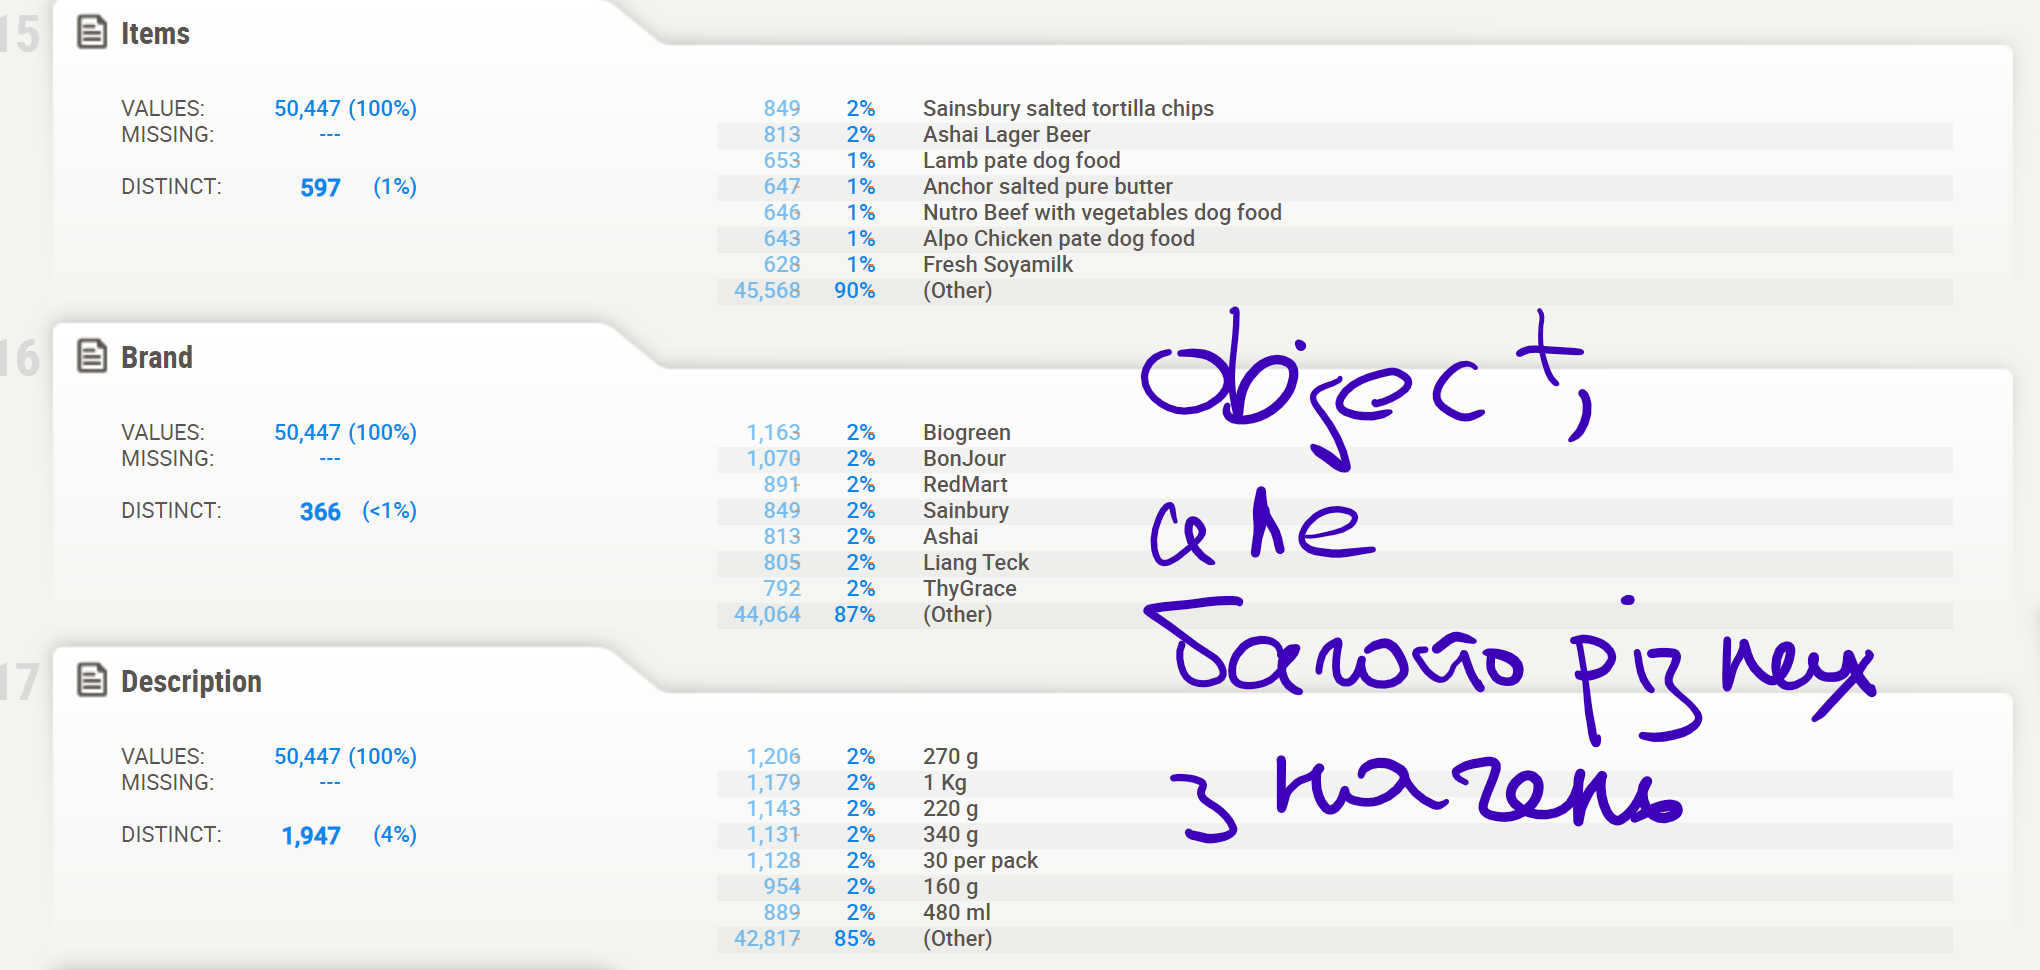

Наступним чином хотіла перетворити стовпчик Time y час, але виявилося, що в цього стовпчика уже тип datetime.time

In [15]:
#Time2 = [f'{t[:2]}:{t[4:6]}' for t in df.Time]

TypeError: 'datetime.time' object is not subscriptable

In [19]:
df.Time[:1]

0    10:08:03.260000
Name: Time, dtype: object

Оскільки у початкових даних 1 покупець може зустрічатися не один раз, то зробимо ще таблицю саме з даними покупців. Роблю це до переведення у тип Categorical, тому що тоді код простіший. Цей код не враховує не унікальних значень, але поки залишимо його.

In [61]:
clients = df.groupby('Membership ID').agg({'Year' : min,
                                           'Month': min,
                                           'Mobile Number': min,
                                           'Loyalty Card Points': max,
                                           'Age': max,
                                           'Gender': max,
                                           'Country': max,
                                           'City': max,
                             })
col_list_client = ['First year', 'First Month', 'Mobile Number', 'Loyalty Card Points','Age', 'Gender', 'Country', 'City']
clients.columns = col_list_client

In [62]:
for col in ["Year", "Month", "Gender", "City", "Country", "Category", "Sub_Category", "Payment Mode"]:
    df[col] =  pd.Categorical(df[col])

Пропущених значень нема, що показує репорт sweet_viz i наступний результат.

In [9]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

2. Валідація

Є обрахунки в таблиці, далі перевіримо їх.

In [10]:
Validation1 = df.Price*df.QTY*(1-df.DISC) == df.Amount

In [11]:
Validation1.groupby(Validation1).size()

True    50447
dtype: int64

Стовпчик Amount(вартість по продукту) узгоджений з даними.

In [12]:
Validation2 = abs(df.groupby('Receipt Number').Amount.sum() - df.groupby('Receipt Number')['Net Bill Amount'].mean()) > 0.02

In [13]:
Validation2.value_counts()

False    10230
True      2818
dtype: int64

In [14]:
Validation2.groupby(Validation2).size() #alternative way to show result

False    10230
True      2818
dtype: int64

In [15]:
 Validation2[Validation2]

Receipt Number
GIJ00003    True
GIJ00004    True
GIJ00014    True
GIJ00029    True
GIJ00033    True
            ... 
GSW01498    True
GSW01516    True
GSW01518    True
GSW01521    True
GSW01530    True
Length: 2818, dtype: bool

In [16]:
#alternative way to check if calculations match 
Validation21 = np.isclose(df.groupby('Receipt Number').Amount.sum(), df.groupby('Receipt Number')['Net Bill Amount'].mean() )

In [17]:
np.count_nonzero( Validation21 == False)

2823

Бачимо, що є значення стовпчика Net Bill Amount, які не узгоджені з даними. 
Далі дивимося на скільки великими є розбіжності. Хоч у більшості до кількох доларів, є і по 25-50 доларів різниці. А з точки зору відсотків, то є відхилення до 100%, що значимо. 

На цьому етапі варто уточнити як рахували Net Bill Amount, чи ця помилка не нашкодить тим, хто теж працює з цими даними і чи правильні дані по Amount i Receipt Number (тобто це наші обрахунки не правильні чи ті, які вже були).
Є сенс припустити, що вхідні дані Amount i Receipt Number коректні і далі для досліджень використовувати пораховані з них значення Net Bill Amount_manual.

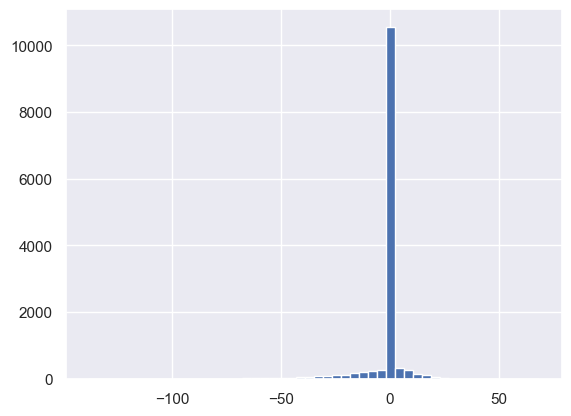

In [18]:
(df.groupby('Receipt Number').Amount.sum() - df.groupby('Receipt Number')['Net Bill Amount'].mean()).hist(bins=50);

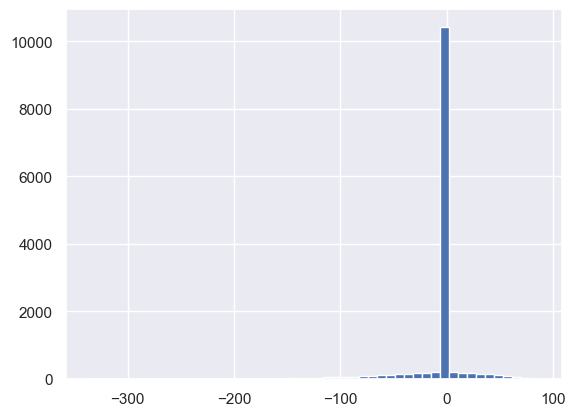

In [19]:
#percent of deviation
((df.groupby('Receipt Number').Amount.sum() - df.groupby('Receipt Number')['Net Bill Amount'].mean())*100/(df.groupby('Receipt Number').Amount.sum())).hist(bins=50);

Далі зведемо в таблицю результати перевірки узгодженості стовпчиків Net Bill Amount i Gross Bill Amount.

In [20]:
Receipt_calculation_check = pd.DataFrame(
    {
        "Amount_manual": df.groupby('Receipt Number').Amount.sum(),
        "Net Bill Amount": df.groupby('Receipt Number')['Net Bill Amount'].mean(),
        "Diff_Amount" : df.groupby('Receipt Number').Amount.sum() - df.groupby('Receipt Number')['Net Bill Amount'].mean(),
        "GST": df.groupby('Receipt Number')['GST'].mean(),
        "Gross Bill Amount manual": df.groupby('Receipt Number')['Net Bill Amount'].mean()*
                                        (1+df.groupby('Receipt Number')['GST'].mean()),
        "Gross Bill Amount": df.groupby('Receipt Number')['Gross Bill Amount'].mean(),
        "Close_Gross" : np.isclose(df.groupby('Receipt Number')['Net Bill Amount'].mean()*
                                   (1+df.groupby('Receipt Number')['GST'].mean()),  
                                   df.groupby('Receipt Number')['Gross Bill Amount'].mean()) 
    }
)

In [21]:
Receipt_calculation_check.Close_Gross.value_counts()

True    13048
Name: Close_Gross, dtype: int64

Тут перевірила чи Gross Bill Amount узгоджена із Net Bill Amount(наявним у таблиці) і отримала, що так. Отже, ці значення не будуть узгоджені із розрахунками Net Bill Amount_manual. Тому порахую Gross Bill Amount_manual.

In [22]:
Receipt_calculation_check

Amount_manual  Net Bill Amount   Diff_Amount   GST  \
Receipt Number                                                       
GIJ00001              12.1128          12.1128  0.000000e+00  0.10   
GIJ00002              22.9680          22.9680  0.000000e+00  0.10   
GIJ00003              30.7692          38.3526 -7.583400e+00  0.10   
GIJ00004              24.2452          21.1974  3.047800e+00  0.10   
GIJ00005               6.1275           6.1275  0.000000e+00  0.10   
...                       ...              ...           ...   ...   
GSW01531              21.1848          21.1848  0.000000e+00  0.07   
GSW01532               9.4090           9.4090  0.000000e+00  0.07   
GSW01533              74.1664          74.1664  1.421085e-14  0.07   
GSW01534              10.5536          10.5536  0.000000e+00  0.07   
GSW01535              14.0184          14.0184  0.000000e+00  0.07   

                Gross Bill Amount manual  Gross Bill Amount  Close_Gross  
Receipt Number                                                            
GIJ00001                       13.324080          13.324080         True  
GIJ00002                       25.264800          25.264800         True  
GIJ00003                       42.187860          42.187860         True  
GIJ00004                       23.317140          23.317140         True  
GIJ00005                        6.740250           6.740250         True  
...                                  ...                ...          ...  
GSW01531                       22.667736          22.667736         True  
GSW01532                       10.067630          10.067630         True  
GSW01533                       79.358048          79.358048         True  
GSW01534                       11.292352          11.292352         True  
GSW01535                       14.999688          14.999688         True  

[13048 rows x 7 columns]

Внесемо пораховані значення Amount_manual(manual) i Gross Bill Amount manual у загальну таблицю.

In [23]:
df1 = sqldf(    '''
SELECT *
FROM df AS t1
LEFT JOIN Receipt_calculation_check AS t2
ON t1.[Receipt Number] = t2.[Receipt Number];   
''')

In [24]:
df1.head()

Receipt Number                        Date  Year Month             Time  \
0       GIJ00001  2016-01-02 00:00:00.000000  2016     1  10:08:03.260000   
1       GIJ00002  2016-01-02 00:00:00.000000  2016     1  15:46:50.832000   
2       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   
3       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   
4       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   

   Mobile Number Membership ID  Loyalty Card Points  Age  Gender  ...  \
0     9793548581     MIDID0001                    1   36    Male  ...   
1     9938441276     MIDID0002                    2   54    Male  ...   
2     9976742552     MIDID0003                    1   16  Female  ...   
3     9976742552     MIDID0003                    1   16  Female  ...   
4     9976742552     MIDID0003                    2   16  Female  ...   

  Operating Cost Product Cost Receipt Number Amount_manual Net Bill Amount  \
0         1.8540      8.65200       GIJ00001       12.1128         12.1128   
1         3.4800     16.98240       GIJ00002       22.9680         22.9680   
2         1.9965      9.35693       GIJ00003       30.7692         38.3526   
3         0.5280      2.65760       GIJ00003       30.7692         38.3526   
4         0.6615      3.21930       GIJ00003       30.7692         38.3526   

  Diff_Amount  GST  Gross Bill Amount manual  Gross Bill Amount  Close_Gross  
0      0.0000  0.1                  13.32408           13.32408            1  
1      0.0000  0.1                  25.26480           25.26480            1  
2     -7.5834  0.1                  42.18786           42.18786            1  
3     -7.5834  0.1                  42.18786           42.18786            1  
4     -7.5834  0.1                  42.18786           42.18786            1  

[5 rows x 40 columns]

In [63]:
df['Net Bill Amount_manual'] = df1['Amount_manual']
df['Gross Bill Amount_manual'] = df1['Gross Bill Amount manual']

Перевіримо чи правильно пораховані відсоткові значення і якщо є відхилення, то чи вони значні.

In [26]:
np.count_nonzero(np.isclose(df.Amount*df['% Profit Margin'], df['Profit Margin']) == False)

50447

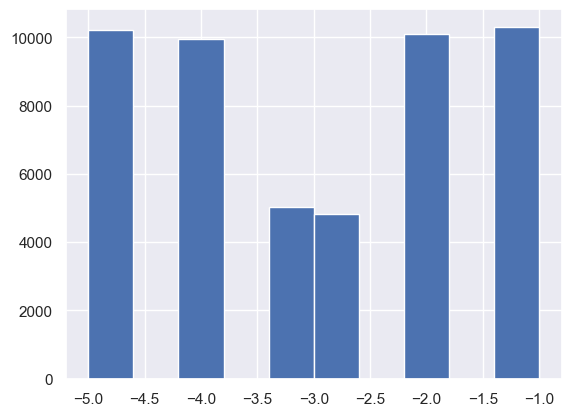

In [27]:
((df.Amount*df['% Profit Margin'] - df['Profit Margin'])*100/df['Profit Margin']).hist(); #percent of diviation

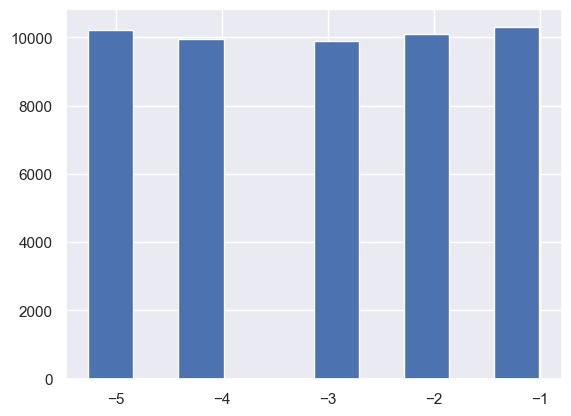

In [28]:
((df.Amount*df['% Operating Cost'] - df['Operating Cost'])*100/(df.Amount*df['% Operating Cost'])).hist(); #percent of diviation

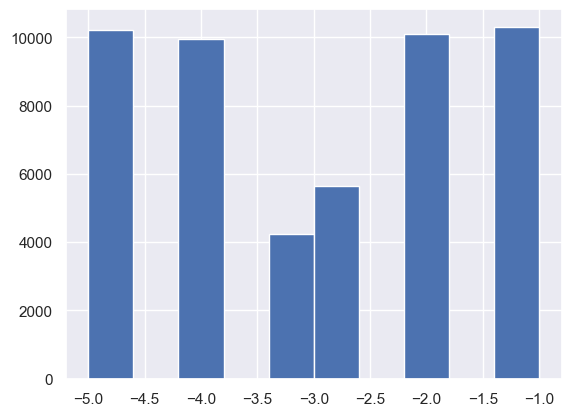

In [29]:
(((df.Amount*df['% Product Cost'] - df['Product Cost'])*100)/(df['Product Cost'])).hist(); #percent of diviation

Бачимо, що похибка в даних до 5%, не багато, тому залишимо стовпчики, які є. Хоч є сенс уточнити як їх рахували і чому неточно і вже тоді вибирати.

3. Огляд даних

Опишемо стовпчики, які маємо і де це має сенс (які є не є унікальними для покупця). На діаграмі sweet_viz маємо розподіли по стовпчикам.

In [84]:
#new report with validated columns
report = sv.analyze(df)
report.show_html('sweet_report_clear.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report_clear.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Звернемо увагу, що 1 рядочок - 1 покупка 1го товару, у одного покупця може бути кілька покупок, що бачимо нижче.

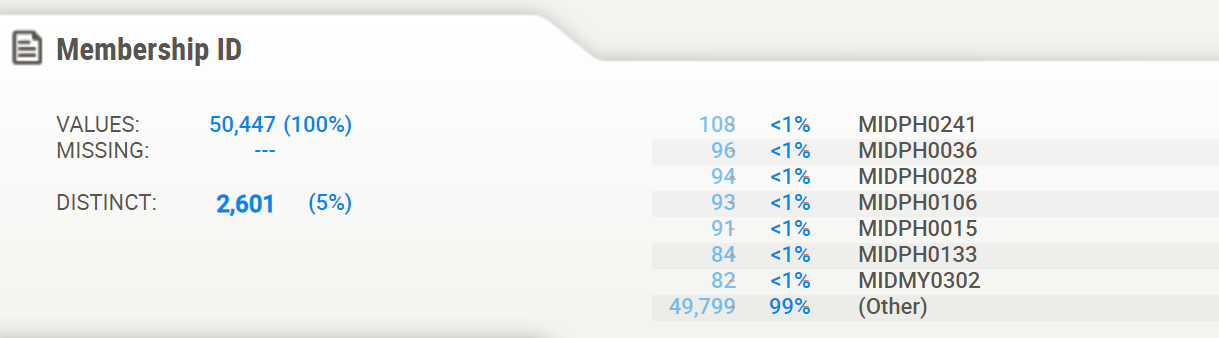

Відразу є питання, чи зібрані тут всі покупки за певний час у зазначених магазинах чи вибрані певним чином. Оскільки нема в кого уточнити спосіб і час збору даних, зробимо певні припущення. 
На гістограмі не видно пропущених періодів, тому припустимо, що тут всі покупки за певний час у зазначених магазинах.

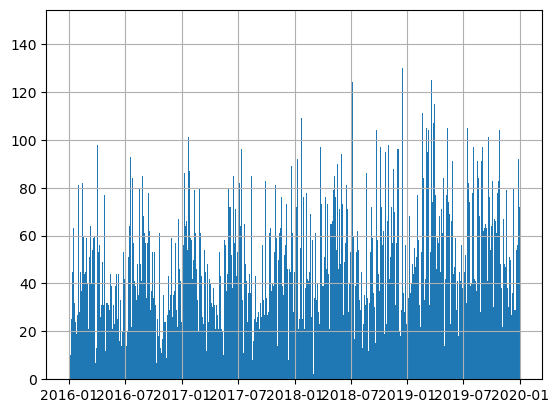

In [58]:
df.Date.hist(bins = 1000);

Почнемо з огляду даних про час транзакцій.

Оскільки мінімальна дата 2016-01-01, а остання - 2019-12-31, то дані повністю за 2016, 2017, 2018, 2019 роки і порівняння по рокам можна проводити.

In [57]:
df.Date.describe(datetime_is_numeric=True)

count                            50447
mean     2018-03-01 09:42:27.410153216
min                2016-01-01 00:00:00
25%                2017-03-14 00:00:00
50%                2018-04-02 00:00:00
75%                2019-03-05 00:00:00
max                2019-12-31 00:00:00
Name: Date, dtype: object

Бачимо, що кількість покупок(Receipt number) збільшується з кожним роком. 
Зважаючи на Uncertainty coefficient Поки не видно, що з роками була зміна активності у певній країні чи місті, чи початок\завершення роботи з певним банком чи видом оплат, зміна продажів певної категорії товарів чи змінені\впроваджені певні знижки чи розподіл доходів.
Uncertainty coefficient = 1 для % Operating cost , тому що усі значення % Operating cost однакові.

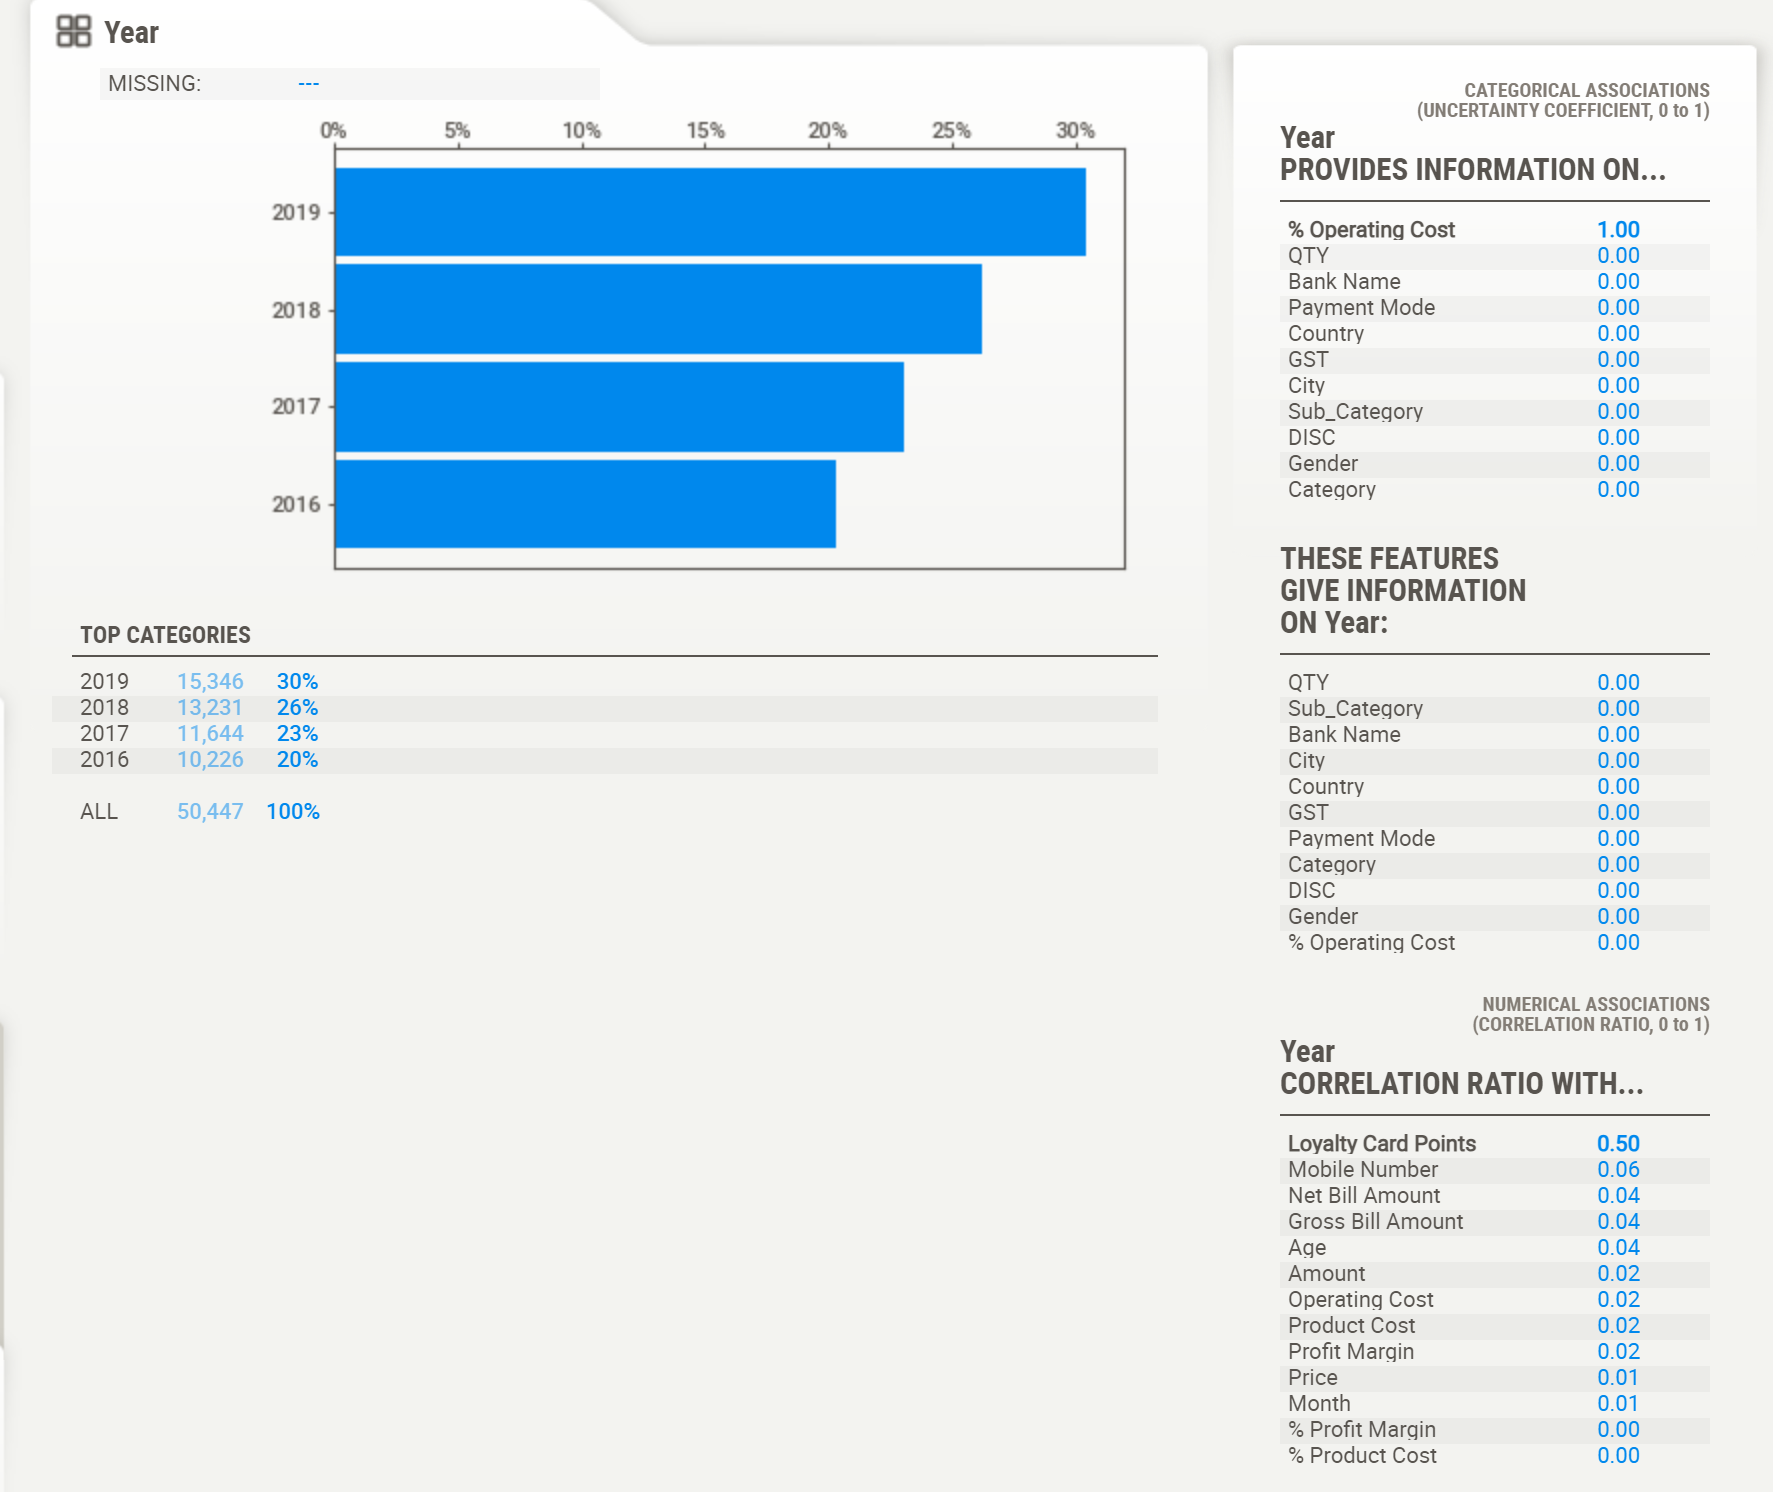

Щомісяця маємо схожу кількість покупок, коливання range - 1.1% від всіх покупок. Гістограма з такими викидами через налаштування бінів. Поки про якусь сезонність не можемо говорити. Нижче правильна Гістограма розподілу по місяцям.

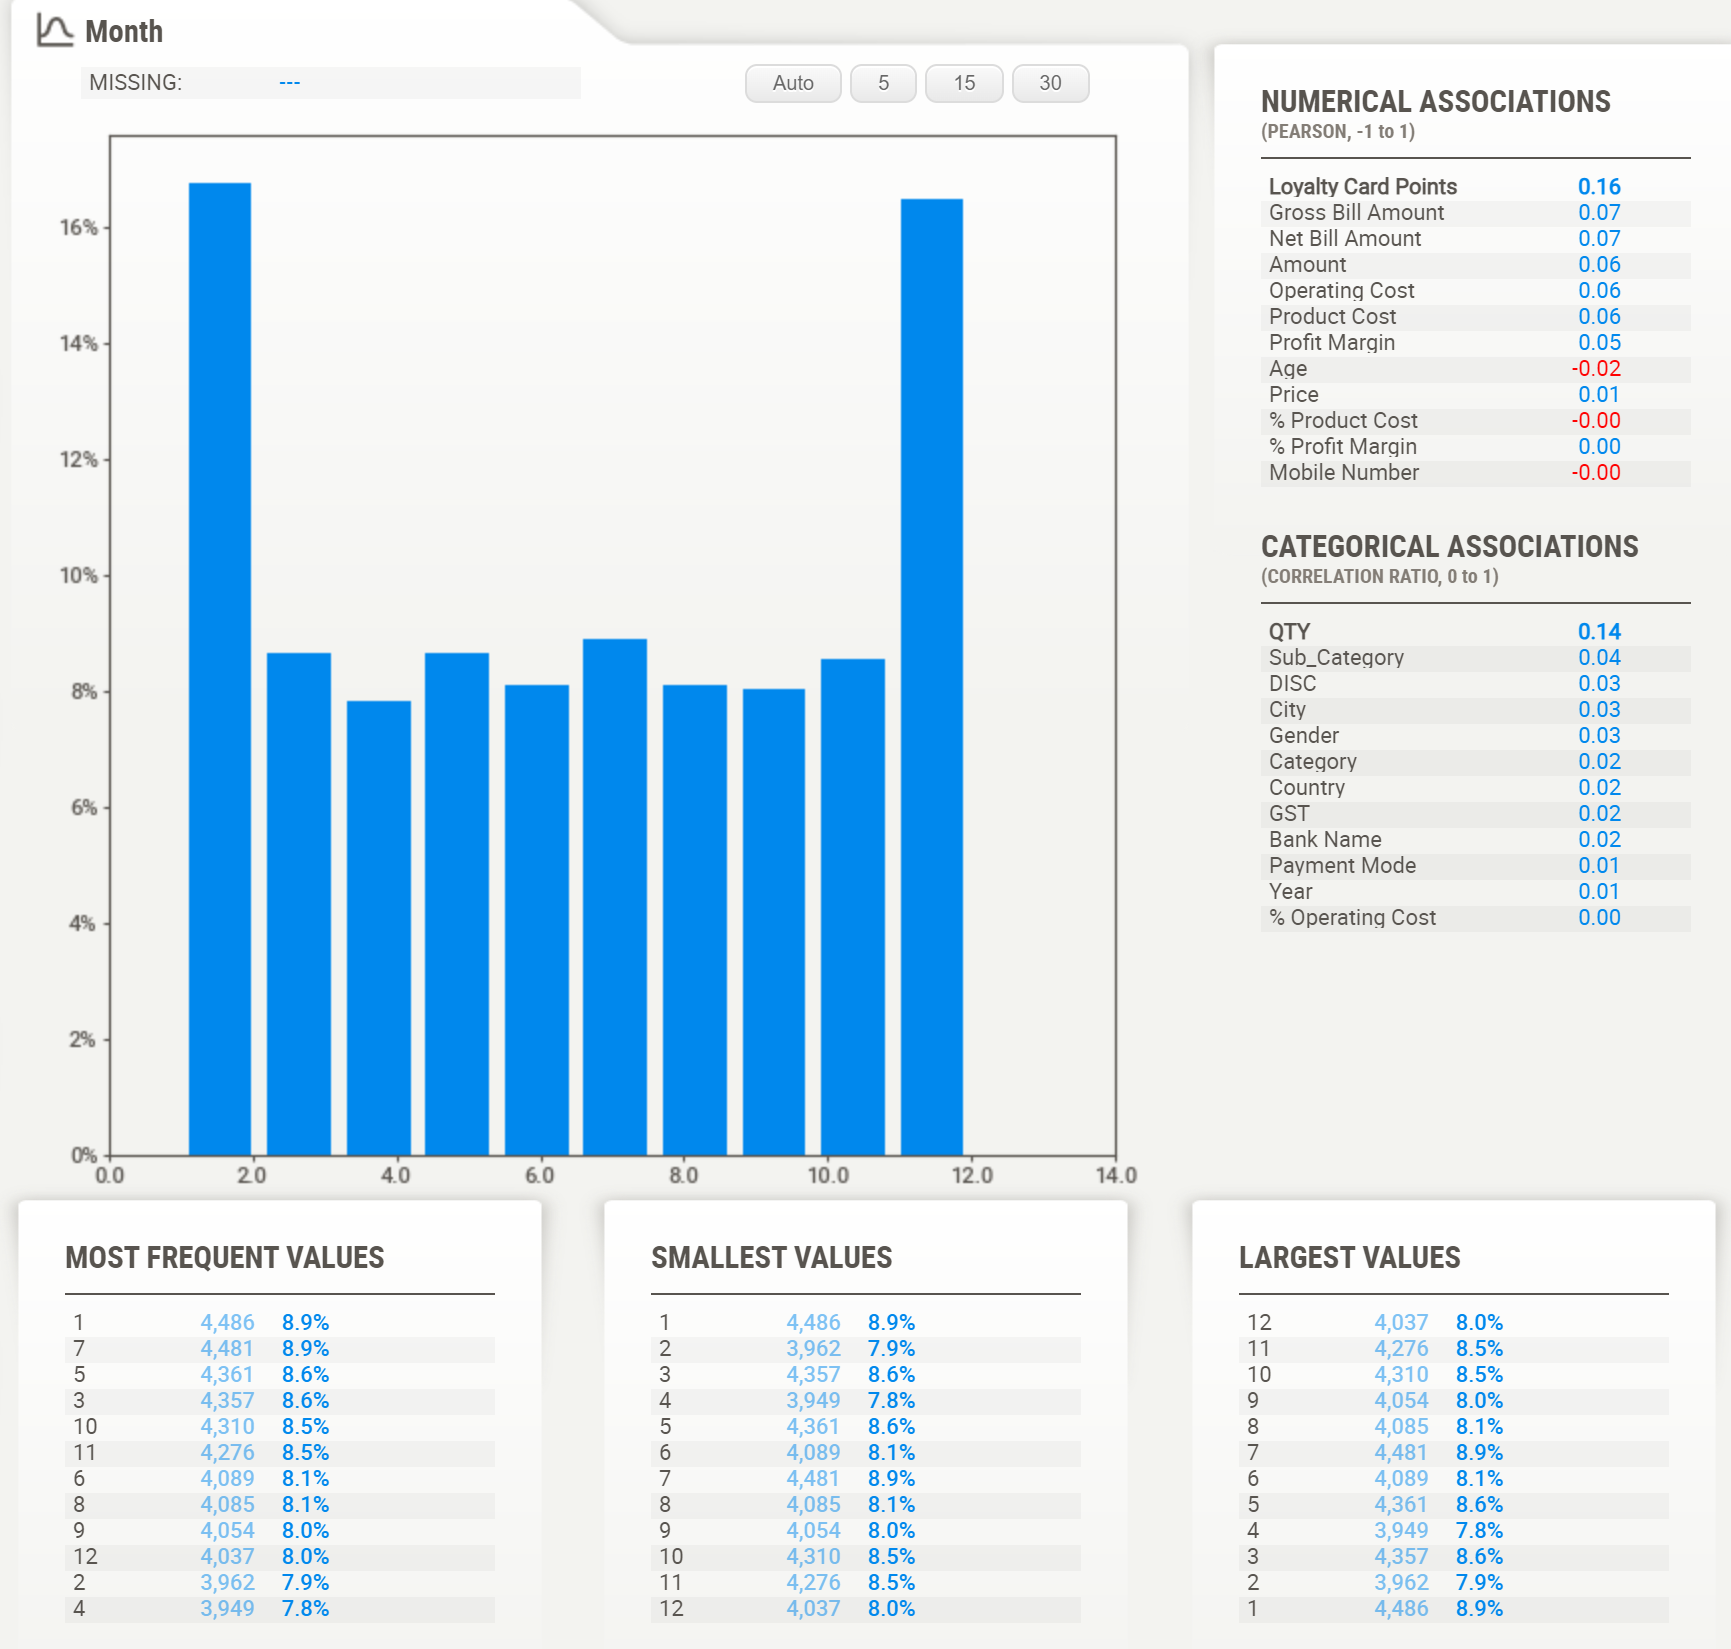

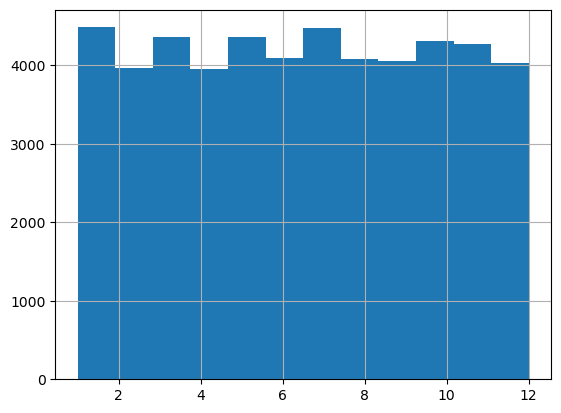

In [9]:
df.Month.hist(bins = 12);

Подивимося також чи є більш чи менш популярні години для покупок.
bins=12, тому що магазин працює з 10 до 22, 12 годин.

Видно піки між 13-14 і 19-20 год, але не значні.

In [141]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [142]:
df.Hour.describe()

count    50447.000000
mean        15.542232
std          3.456671
min         10.000000
25%         13.000000
50%         16.000000
75%         19.000000
max         21.000000
Name: Hour, dtype: float64

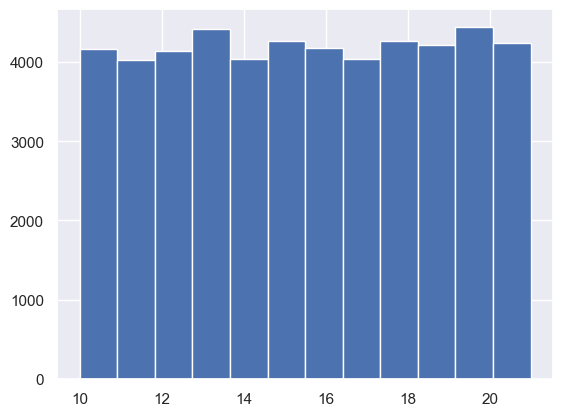

In [37]:
df.Hour.hist(bins=12);

Тепер розглянемо інформацію про покупців.

Четвертина покупок зроблені молоддю у віці 15-23 років, далі відносно рівномірно розподілені покупки між людьми до 57 років.

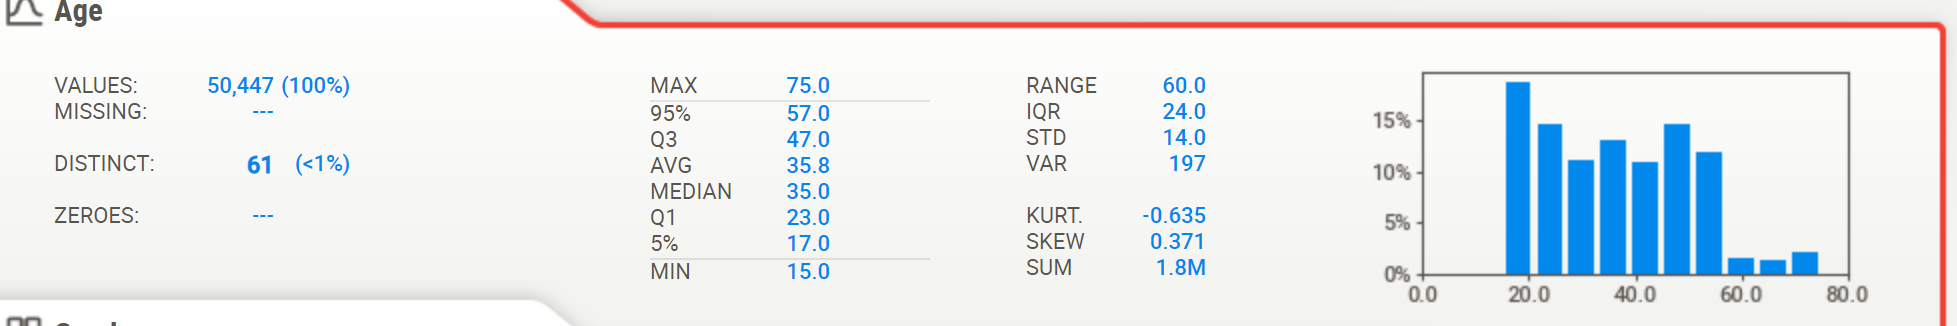

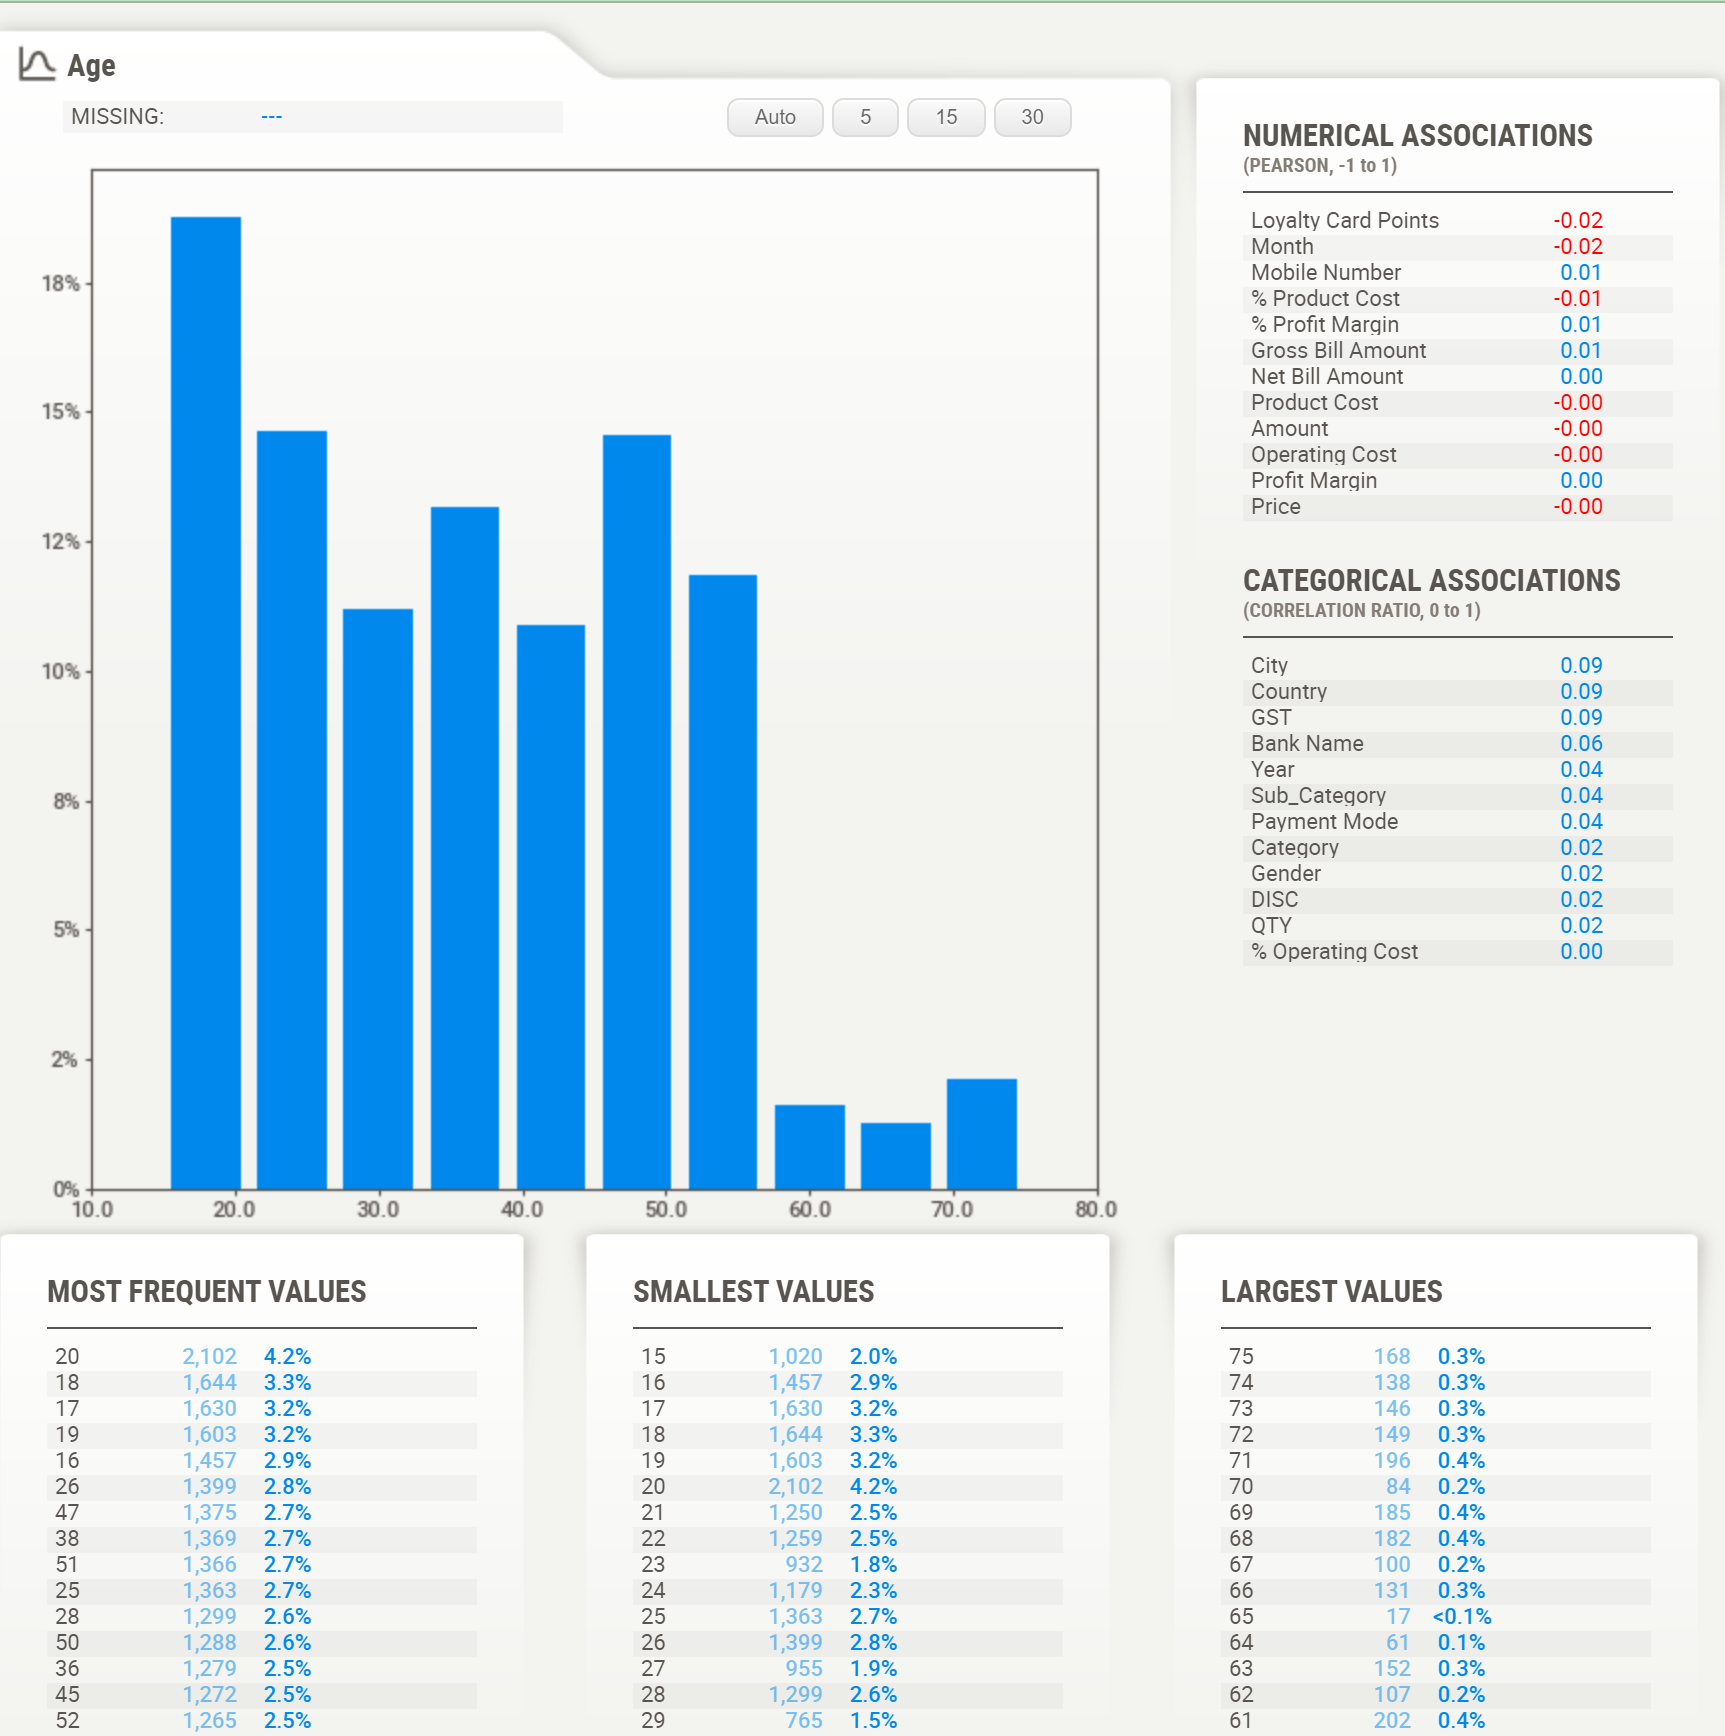

Унікальні покупці в цьому магазині мають такий розподіл віку i він доволі схожий із розподілом віку по покупкам. Тому поки не можемо сказати, що є вік в якому роблять забагато чи замало покупок.

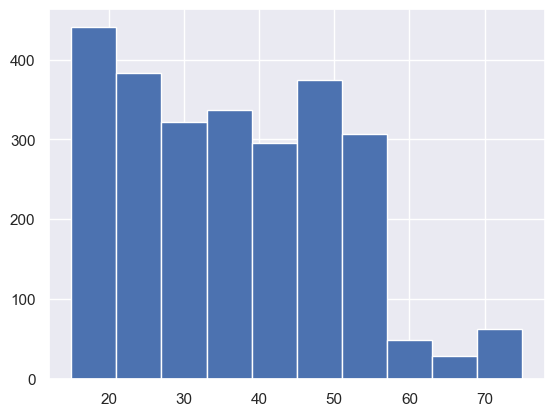

In [47]:
clients.Age.hist();

Переважна кількість покупок зроблена жінками, але поки не видно зв'язок статі покупця і тим що та на яку суму вони купляють.

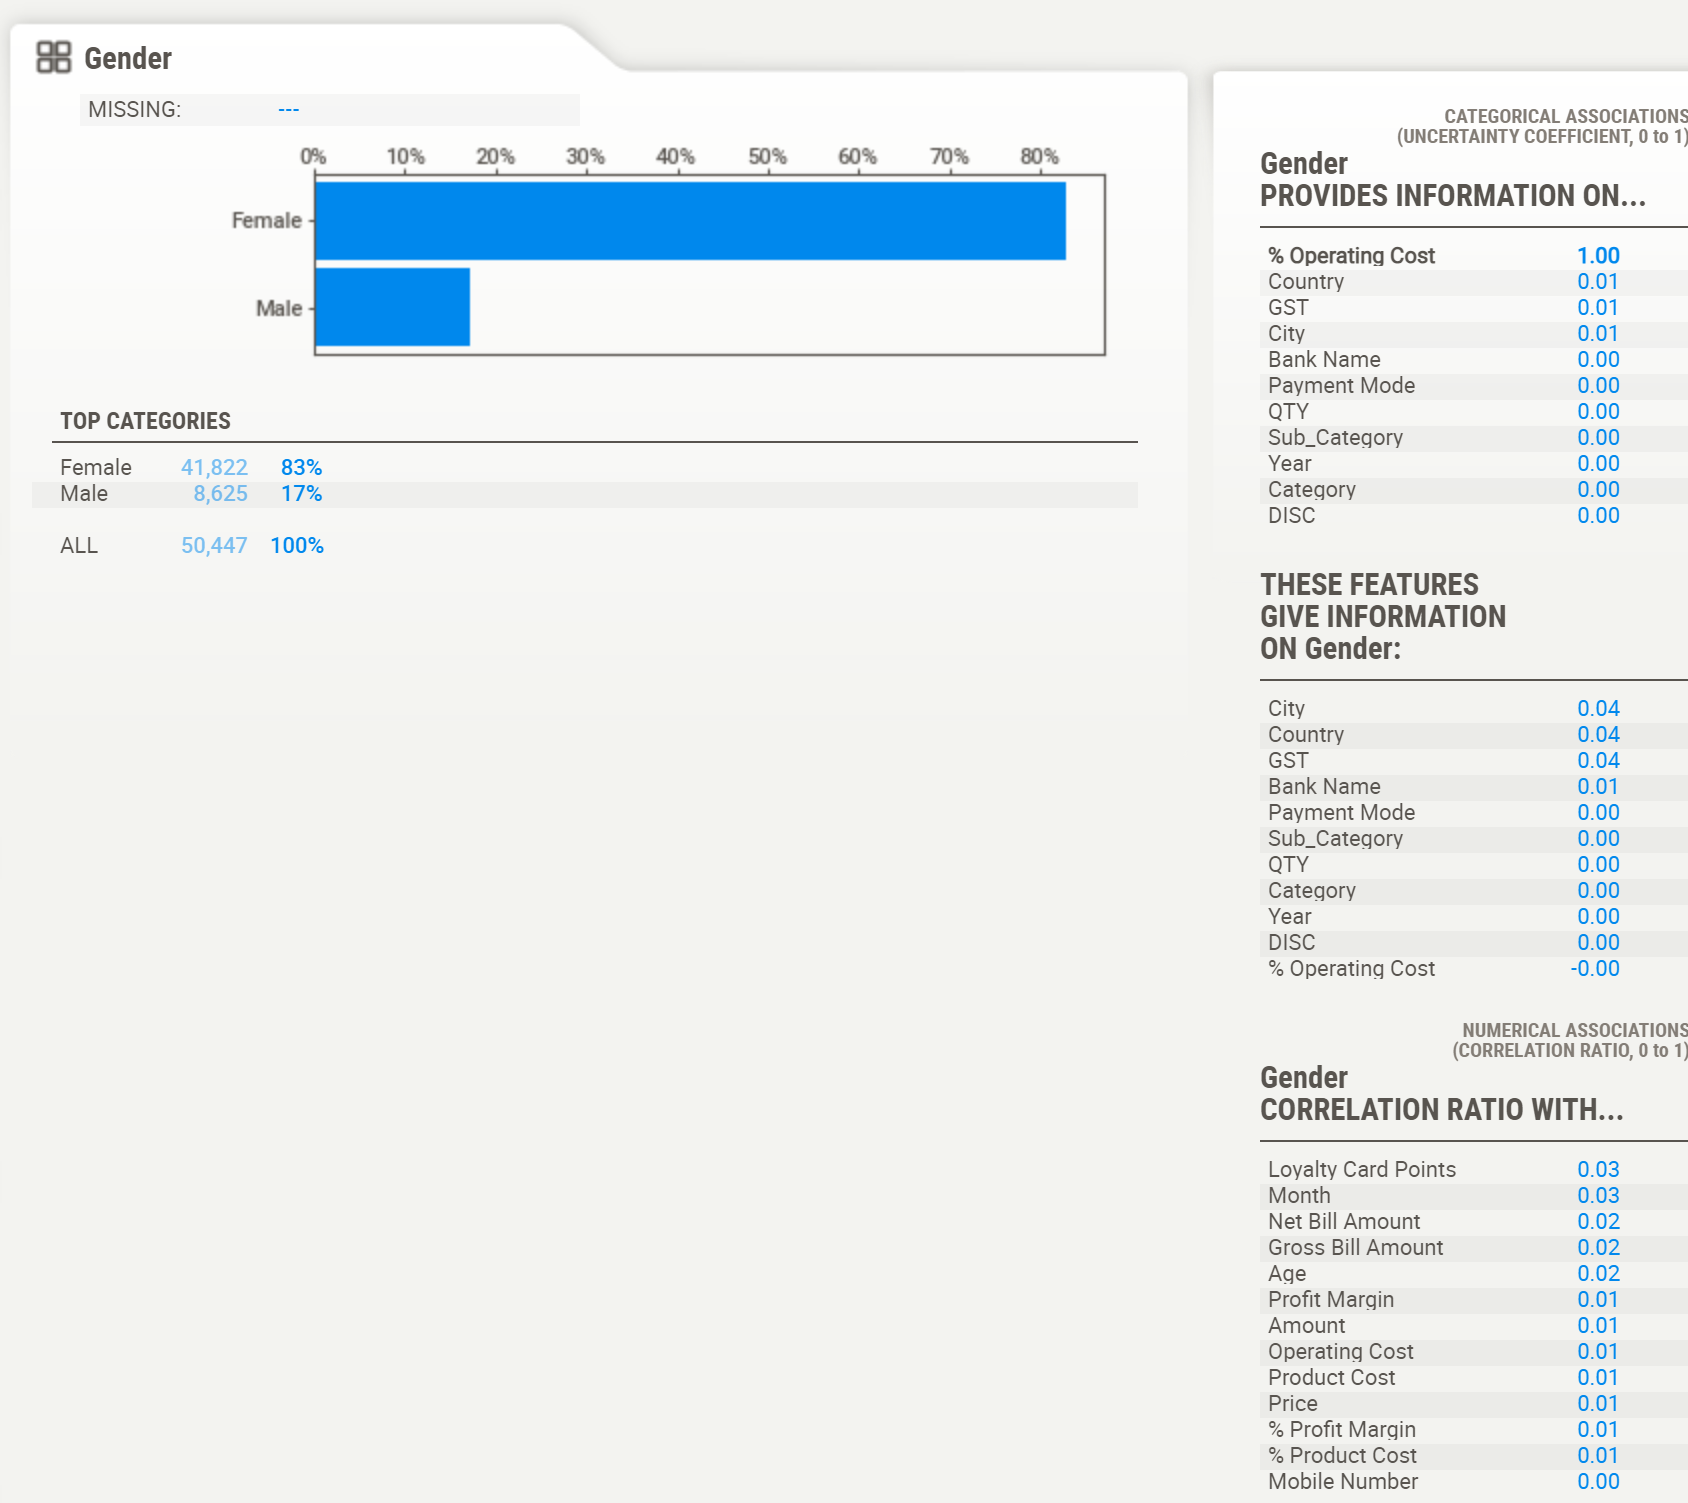

Унікальні покупці в цьому магазині мають такий розподіл по статі i він доволі схожий із розподілом покупок по статі. Тому поки не можемо сказати, що є стать, яка робить забагато чи замало покупок.

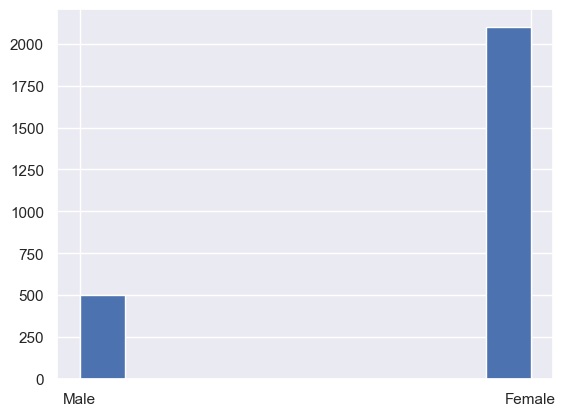

In [49]:
clients.Gender.hist();

Щодо програми лояльності, то 99% покупок зроблено її учасниками (zeroes = 1%)(зауважуємо, що не факт ще, що 99 покупців - учасники програми лояльності. І природньо, що зменшується кількість покупок при збільшенні кількості балів)
Також поки не видно зв'язків із кількістю балів програми та покупцями і тим що та на яку суму вони купляють.
Один з потенційних інтересів - знайти такий зв'язок для більш кастомної програми і для розуміння вигідності цієї програми, для цього можна було б порахувати суму балів за весь час до моменту покупки чи за 'життя' покупця. Порахувати суму балів за весь час до моменту покупки можна додавши бали перед кожним їх 'обнуленням'- використання покупцем. 
Наразі не будемо проводити більш детальний аналіз балів програми лояльності, адже немає інформації як саме ця програма організована.

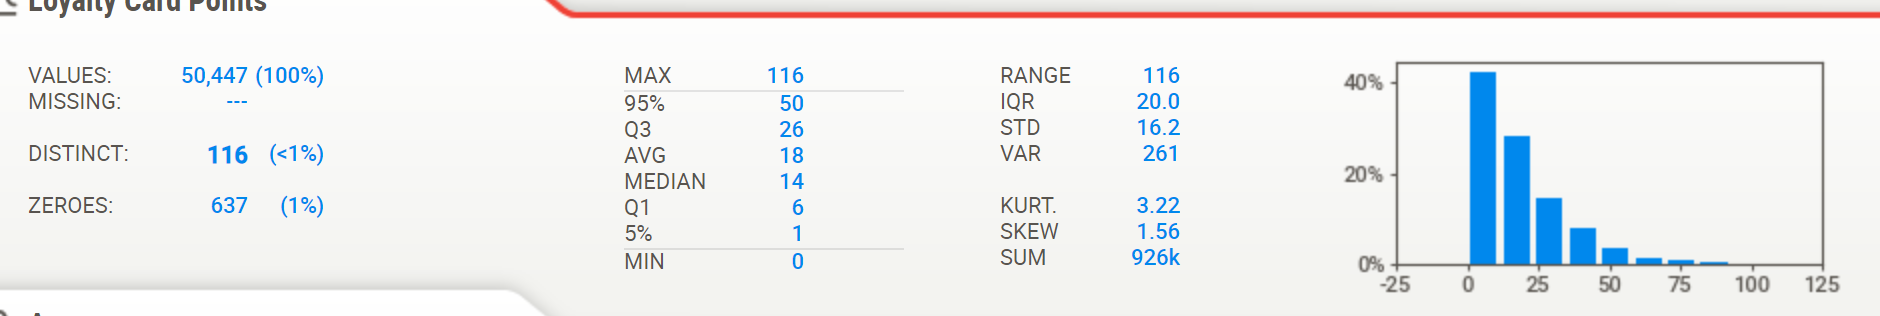

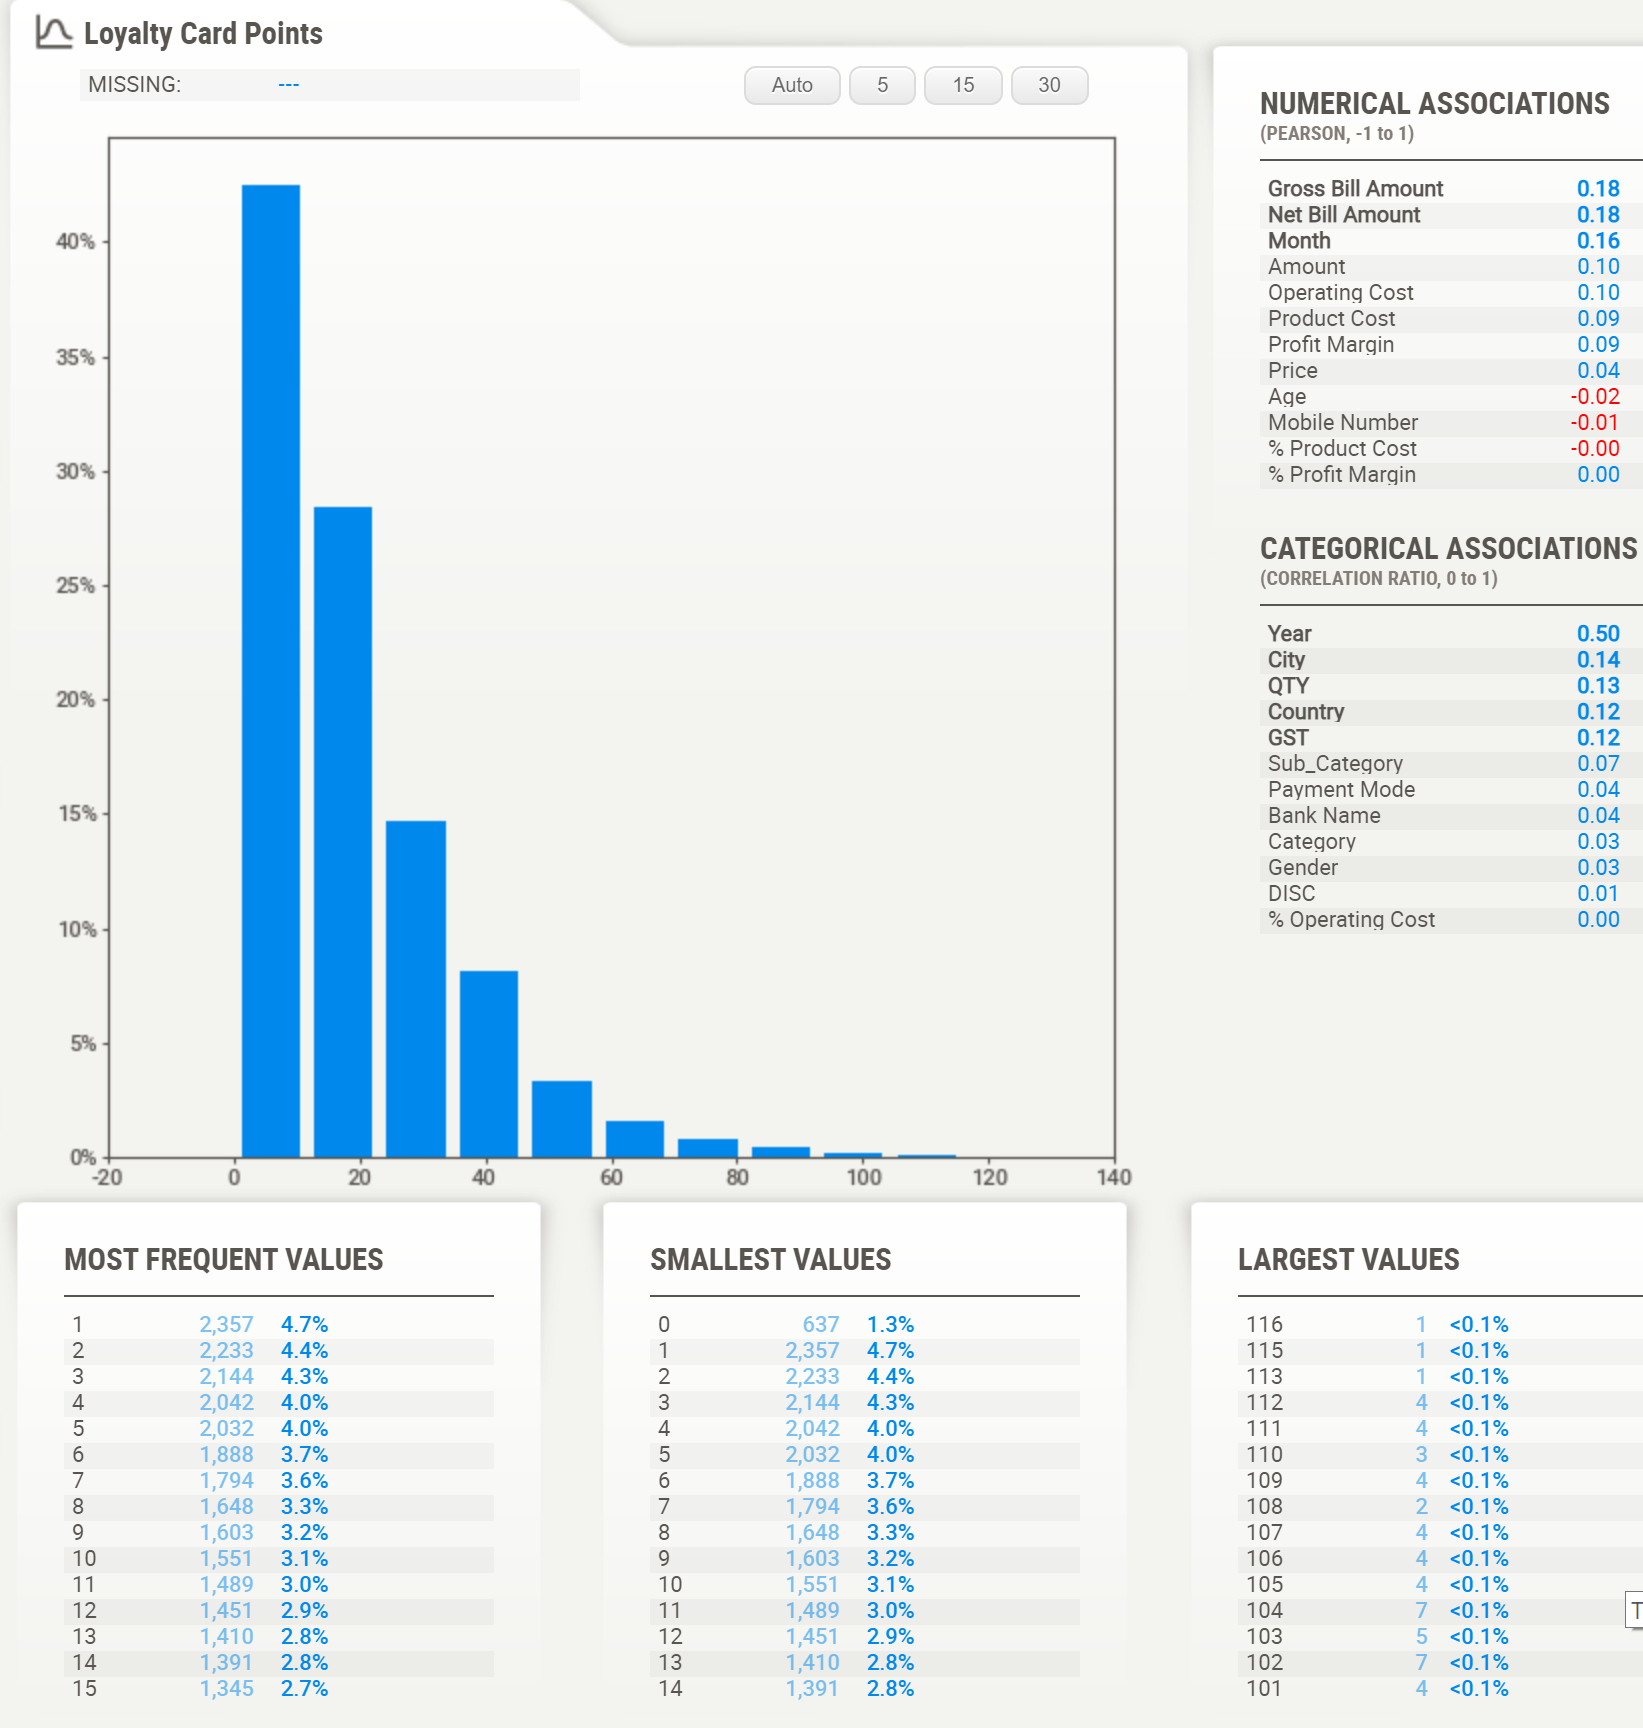

Mаксимальна кількість балів так розподілена, клієнти, які максимум мали 0 балів, а такі є.

In [54]:
clients['Loyalty Card Points'].min()

0

In [58]:
# Calculate the percentage of zeros (0)
percentage_of_zeros = (clients['Loyalty Card Points'].value_counts()[0] / len(clients['Loyalty Card Points'])) * 100
print(f"Percent of clients in Loyalty problem: {100 - percentage_of_zeros:.2f}%")

Percent of clients in Loyalty problem: 98.62%


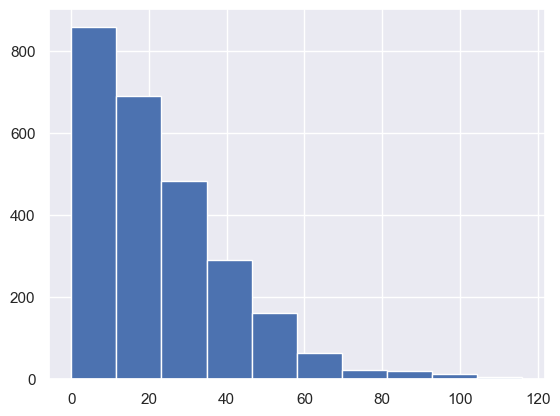

In [52]:
clients['Loyalty Card Points'].hist();

Далі розглянемо дані про локацію магазинів.

Маємо дані по 4 країнам і 5 містам з таким розподілом, покупок у Singapore значно бідльше, ніж в інших країнах, у містах Woodland i Jakarta покупок значно менше, ніж в інших містах. 
Також, бачимо, що податок GST різний між країнами, але однаковий у країні.
Окремо можна дослідити яка загальна кількість покупок і клієнтів по містам і країнам, поки не видно зв'язків між параметрами покупців, тим що та на яку суму вони купляють, чи між розміром чеку і країною чи містом.

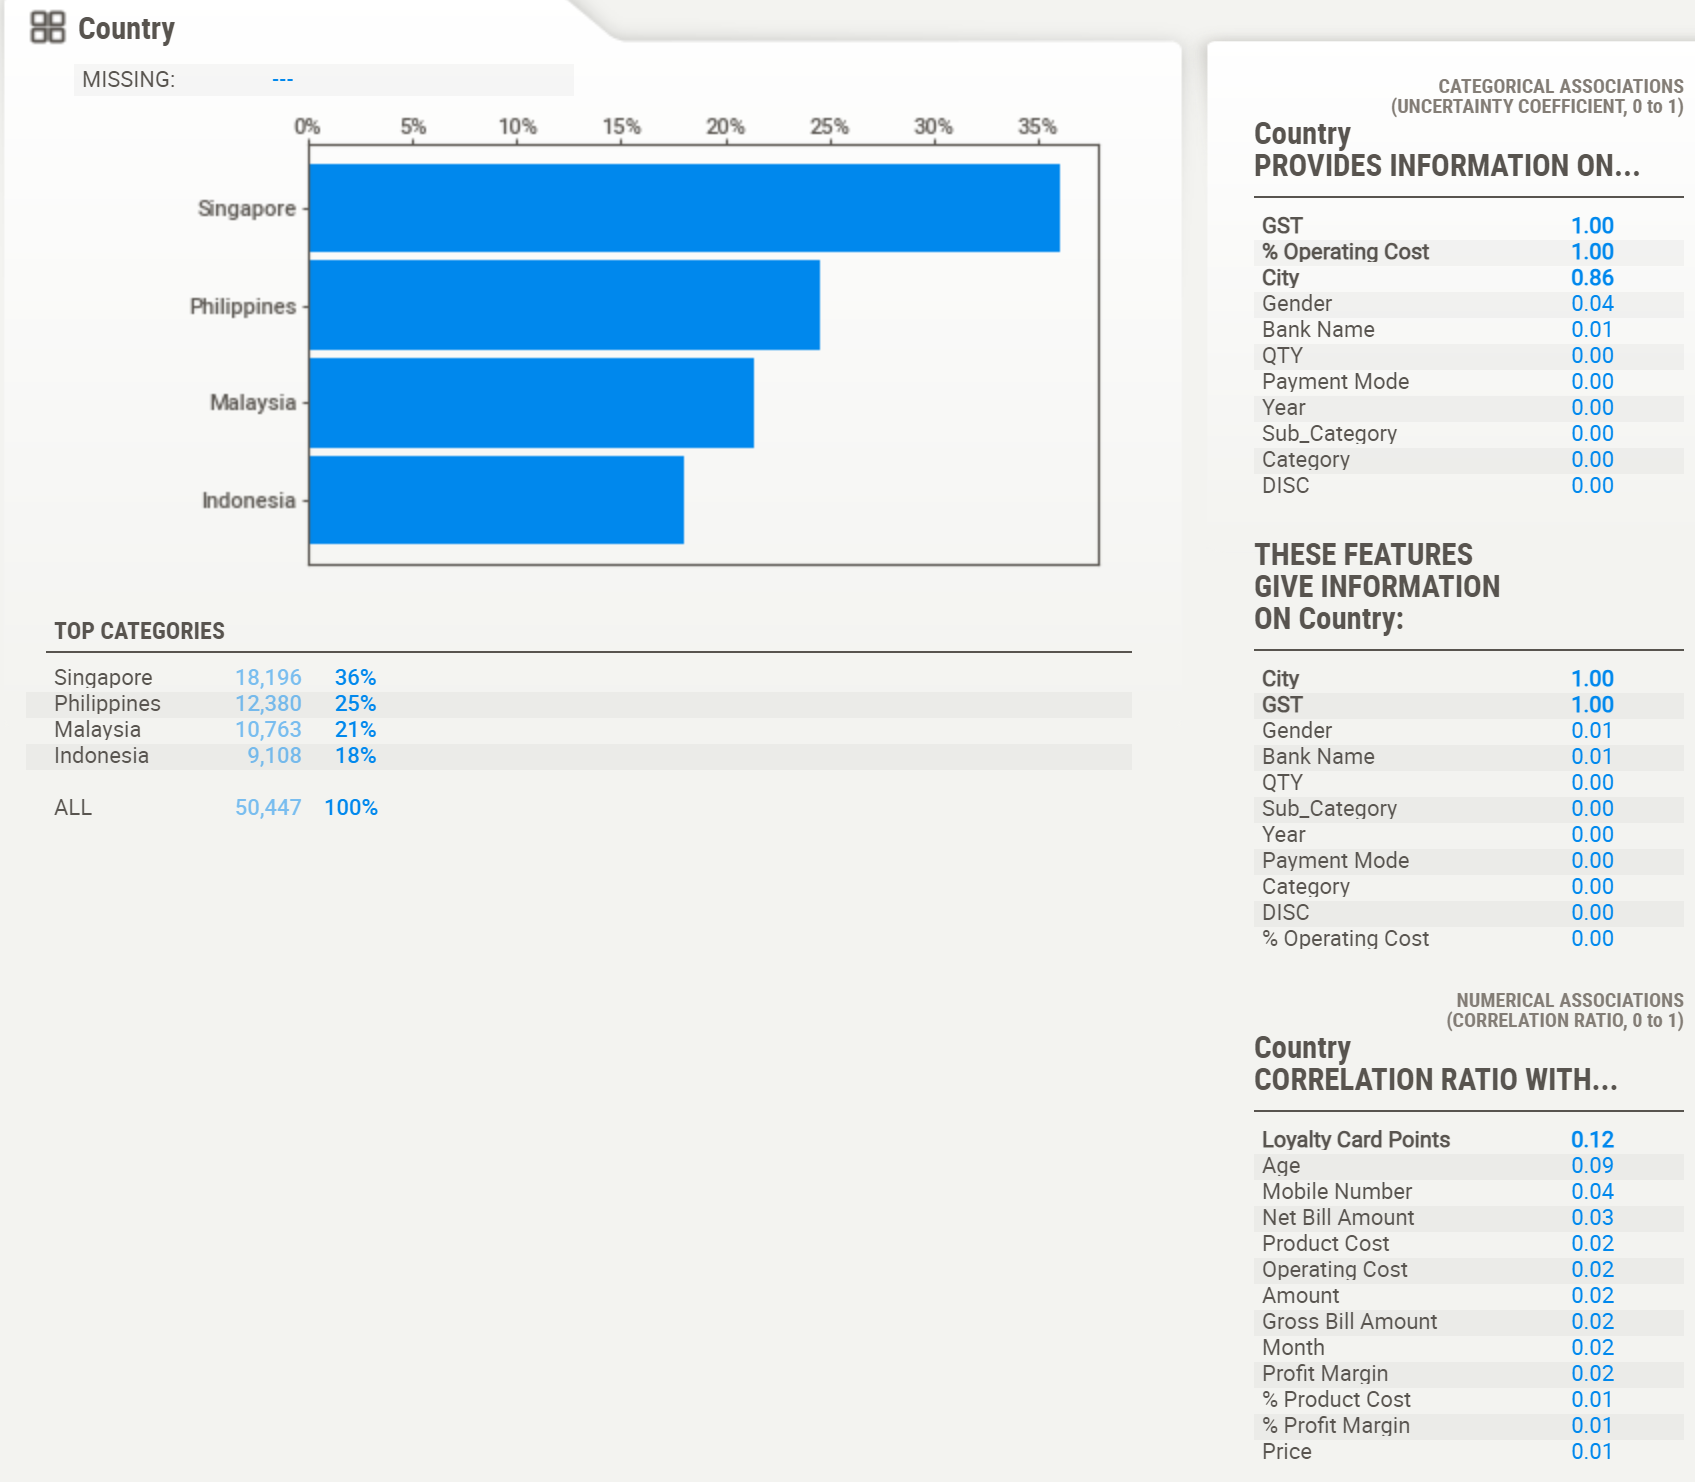

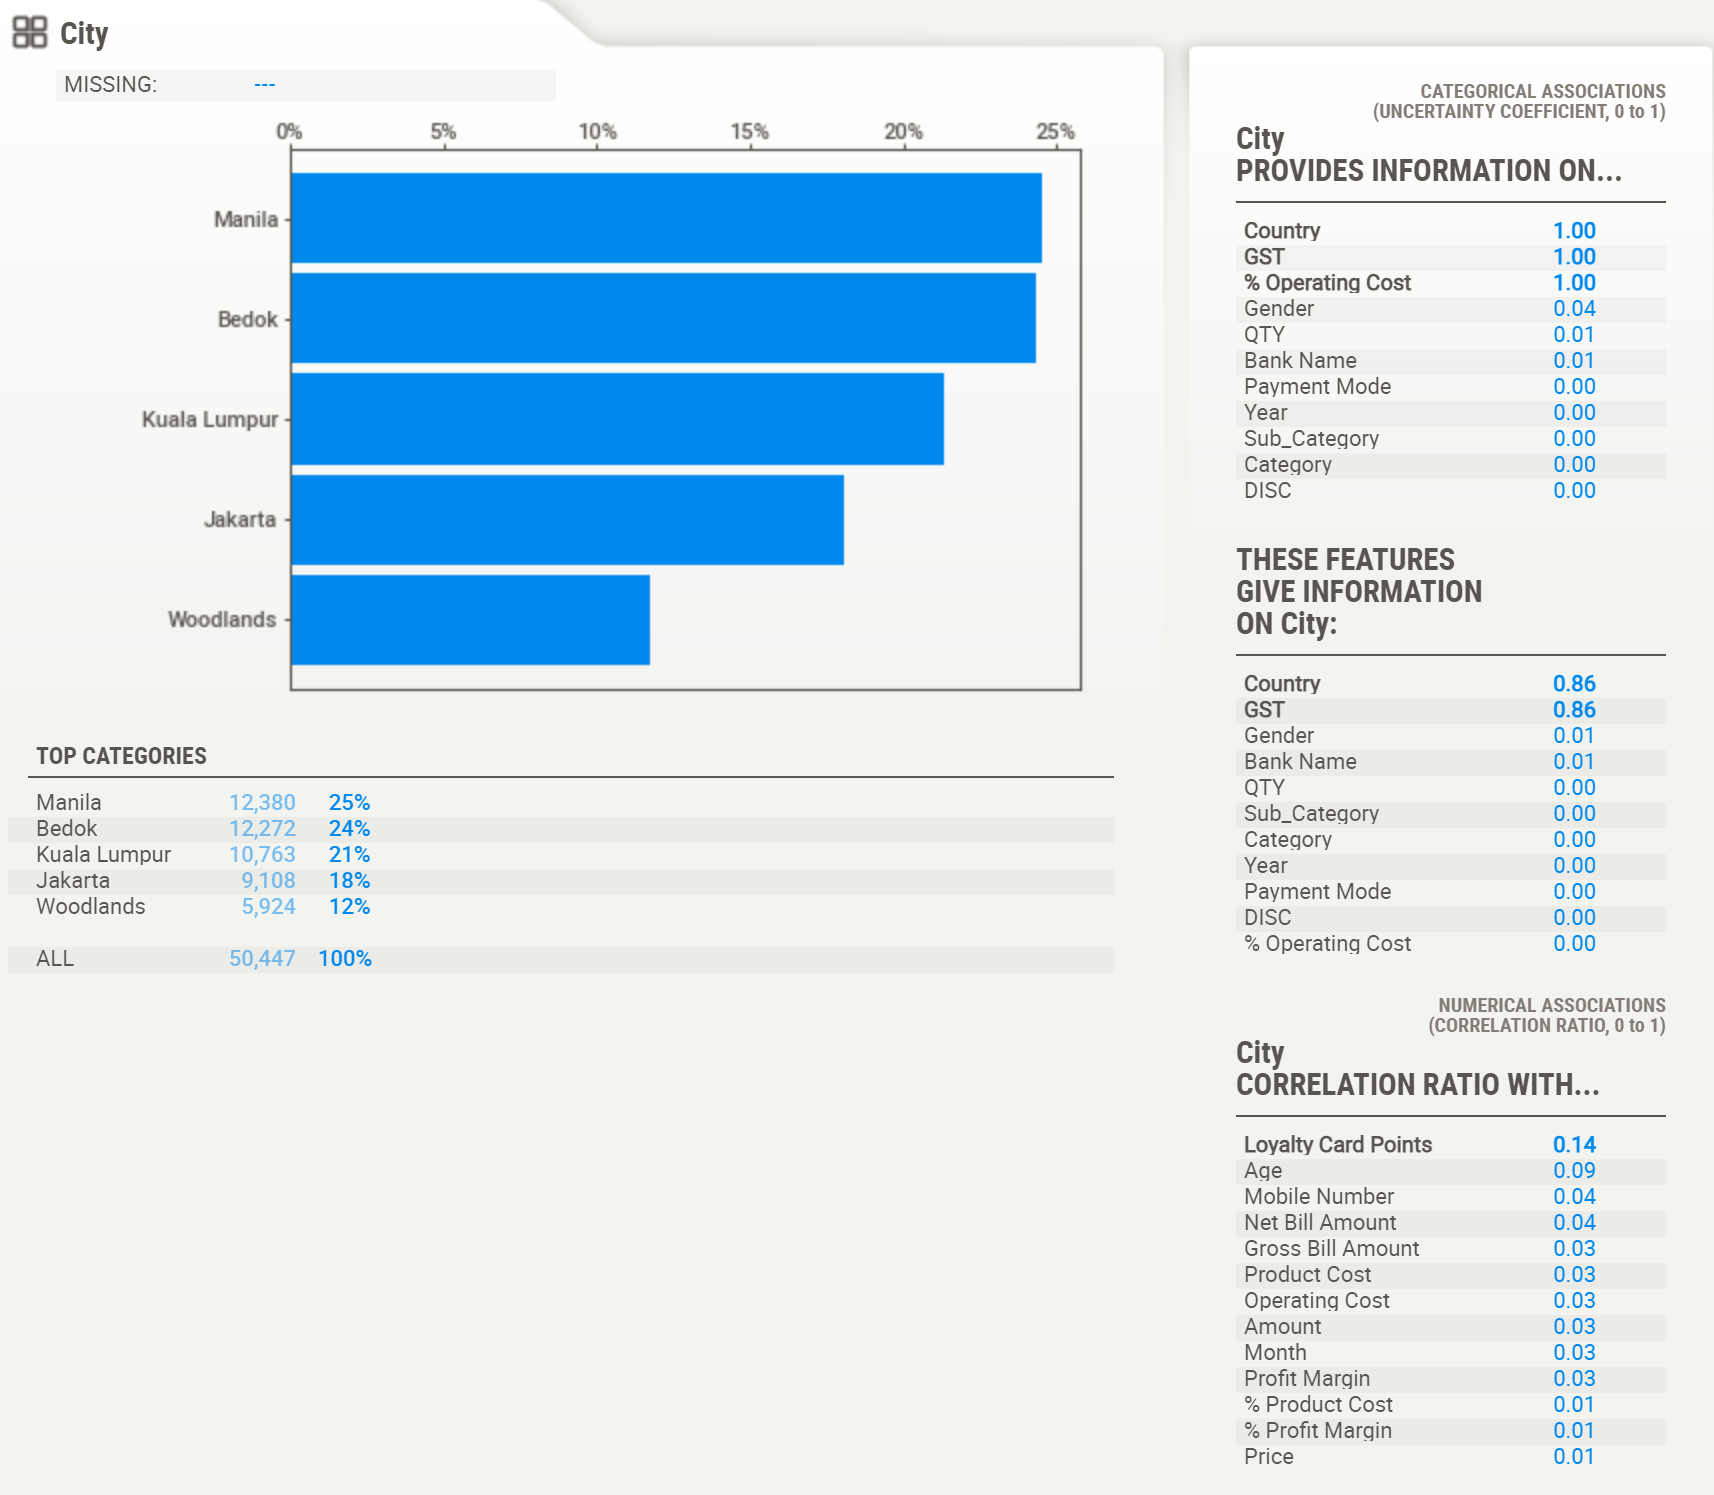

Тепер подивимося розподіл клієнтів по містам і країнам, і тут порядок та різниці інші, ніж у покупках. Тому можна перевірити у яких країнах і містах покупці роблять значно більше чи менше покупок, ніж в інших. 

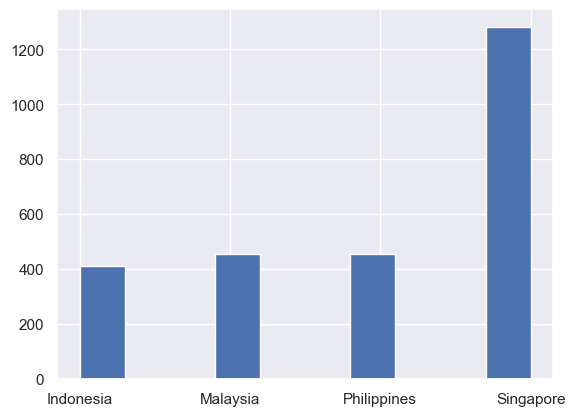

In [66]:
clients.Country.hist();

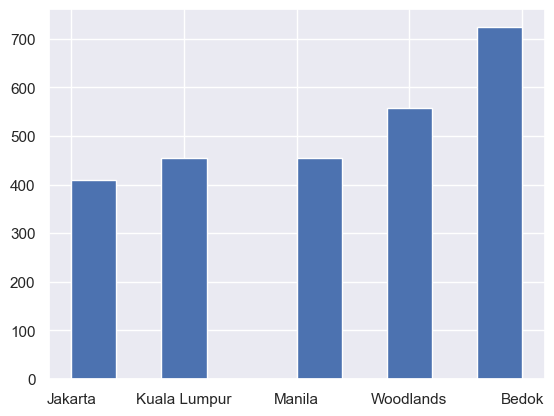

In [67]:
clients.City.hist();

Наступною розбирем інформацію про продукти.

Всього є 16 категорій товарів, найчастіше зустрічаються Bakery and Breakfast i Frozen. Мінімальна частота категорій - 2 відсотка, значить, що у 50ти покупках будуть всі категорії товарів, хоч по 1му разу.
Окремо можна дослідити скільки покупців купляють кожну категорію і скільки коштів кожна категорія приносить. 
Є незначний зв'язок категорії з ціною і відсотком прибутку, а от із країною чи статтю\віком покупця не видно.

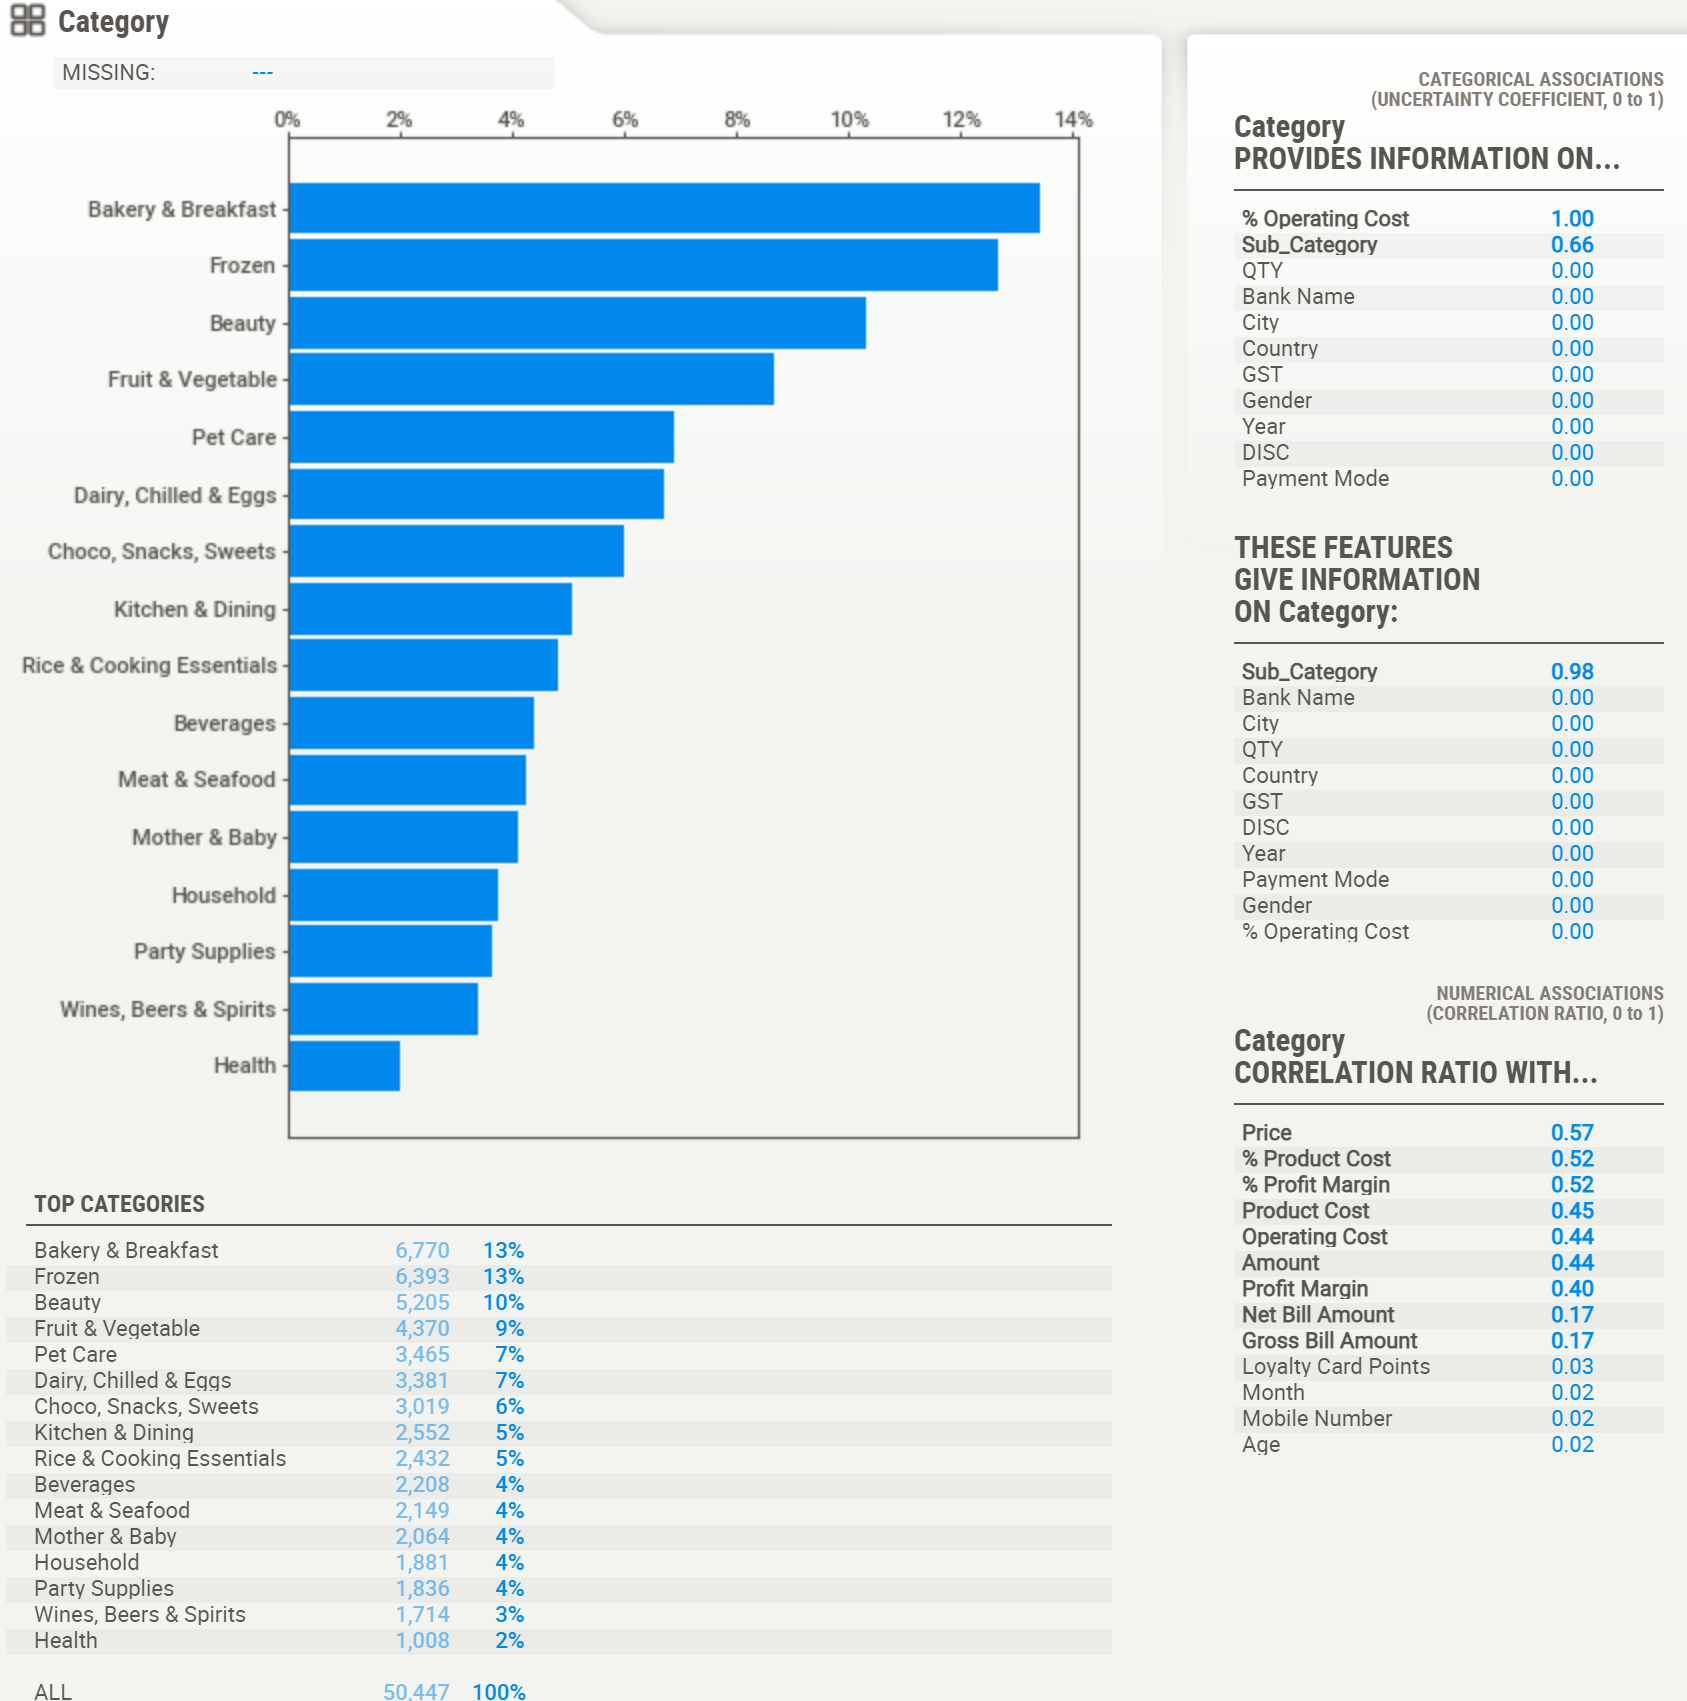

Всього є 75 підкатегорій, цікаво, що найпопулярніші підкатегорії не відносяться до найпопулярніших категорій.
Додатково можна подивитися скільки підкатегорій у кожній категорії, якщо у популярних категоріях підкатегорій більше, ніж в інших, то зрозуміло, чому так 'розмилися'їх кількості.

Є значний зв'язок підкатегорії з ціною, відсотком і числовим значенням(тут менший зв'язок) прибутку і певний зв'язок із собівартістю продуктів, і із країною чи статтю\віком покупця зв'язок не видно.
Далі можна дослідити чи є не достатньо прибуткові підкатегорії.

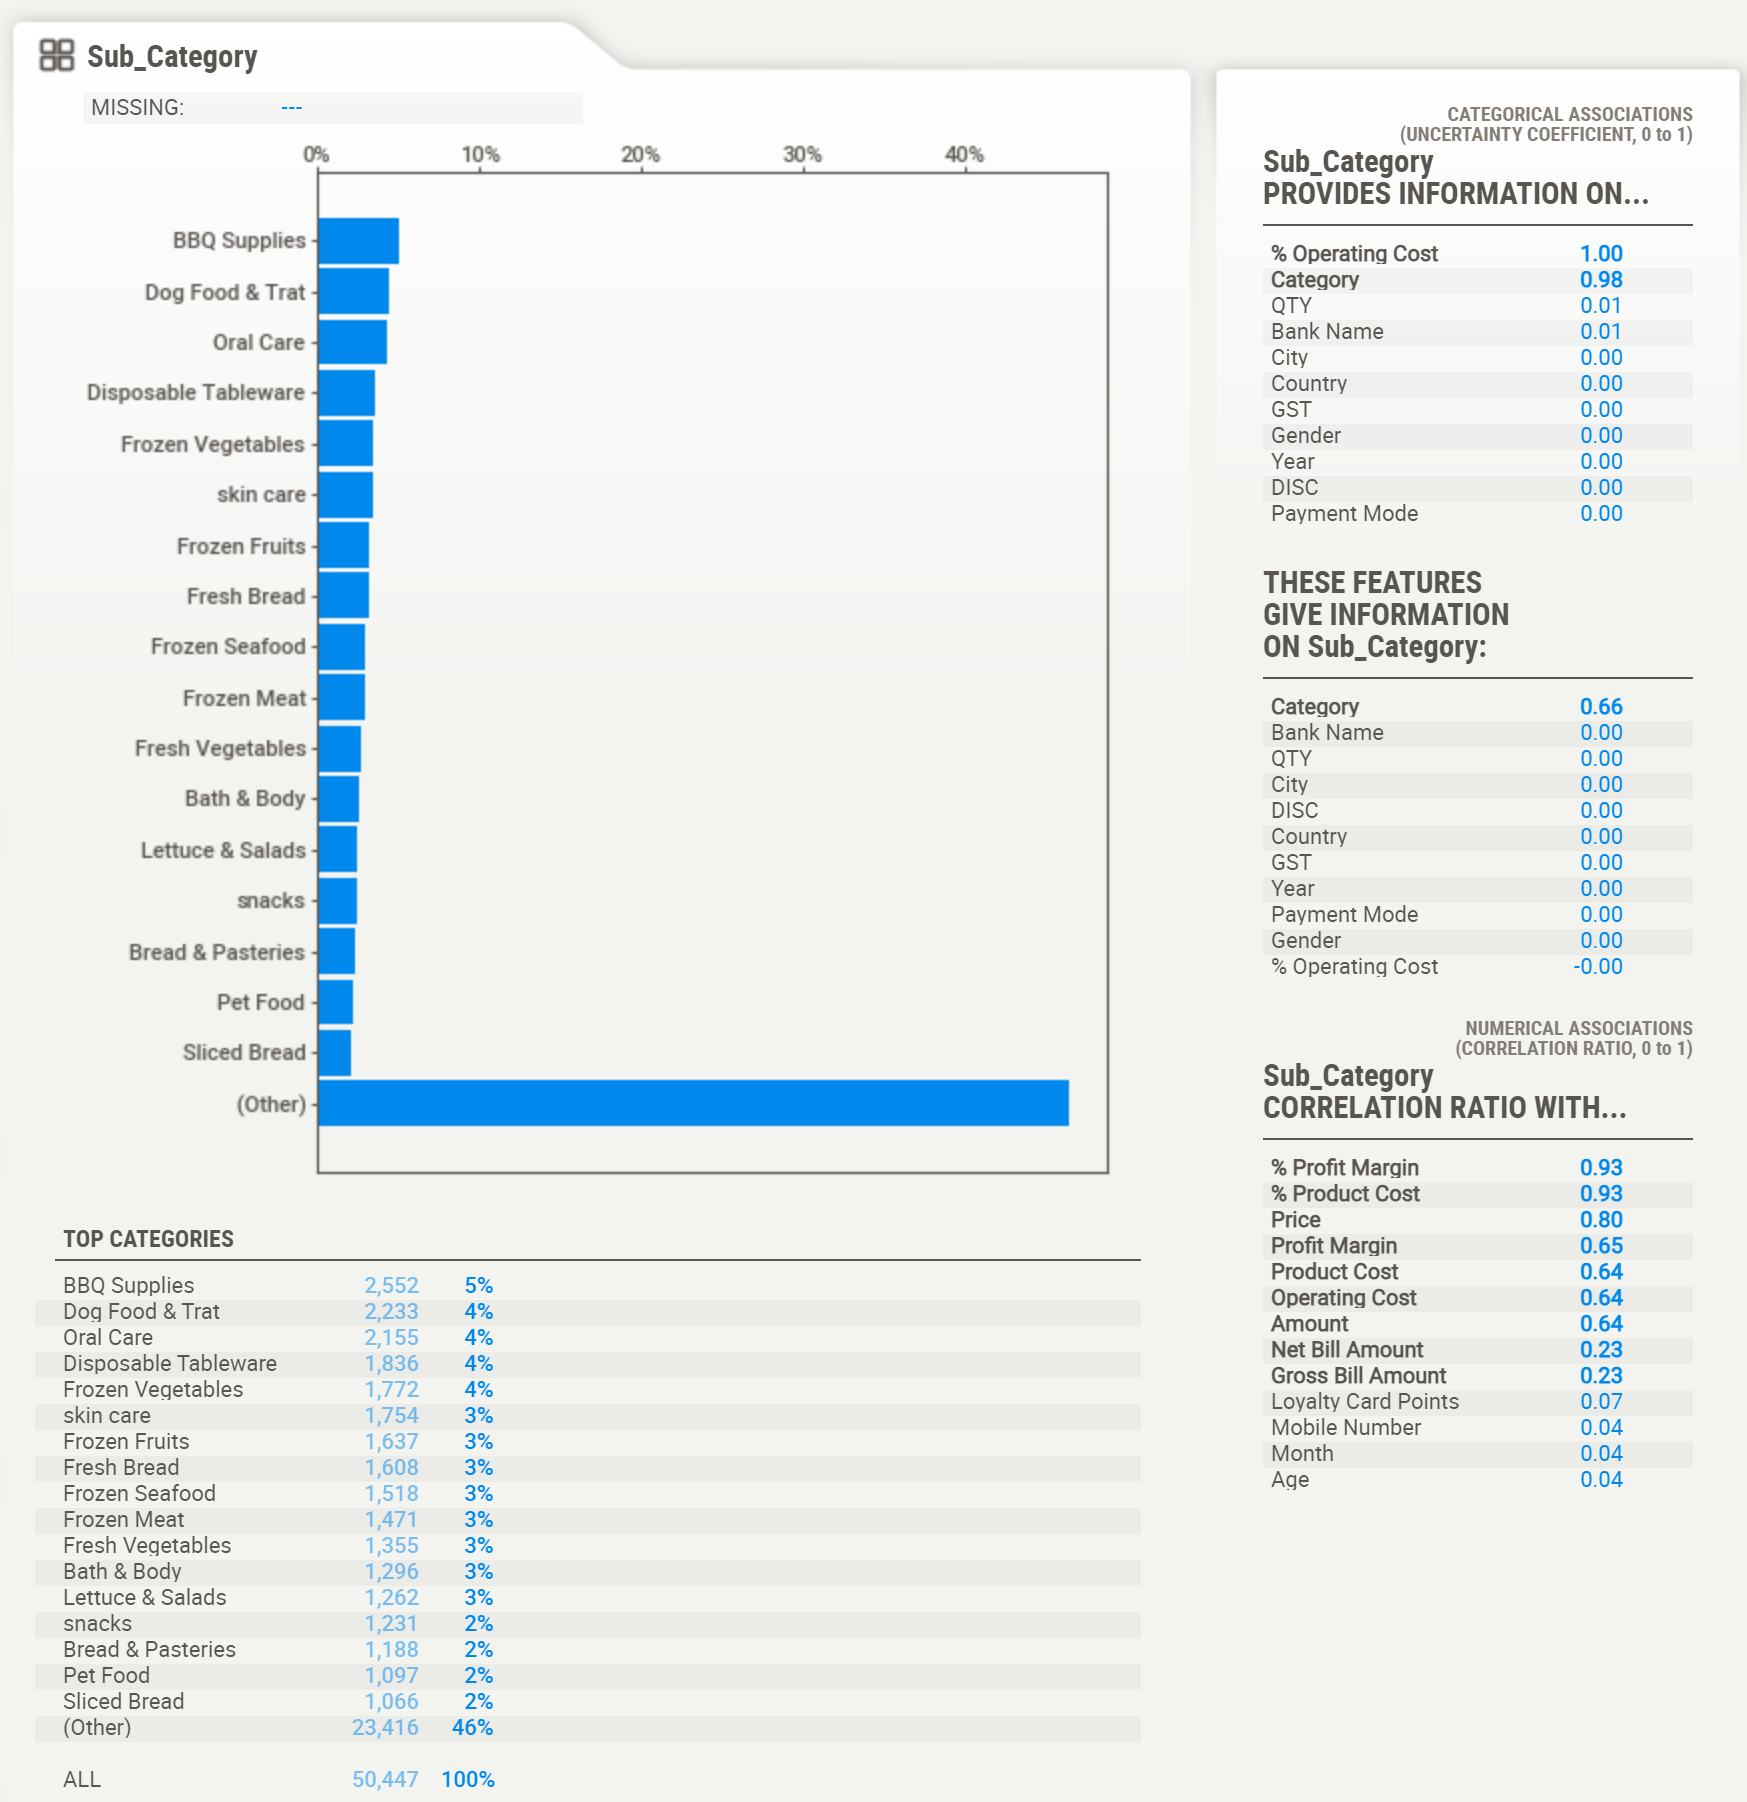

Маємо справу з не дорогими продуктами, більшість до 10 (Q3= 9.5) і максимум до 40.
Є зв'язки ціни з фінансовими показниками, але неочевидних зв'язків нема.

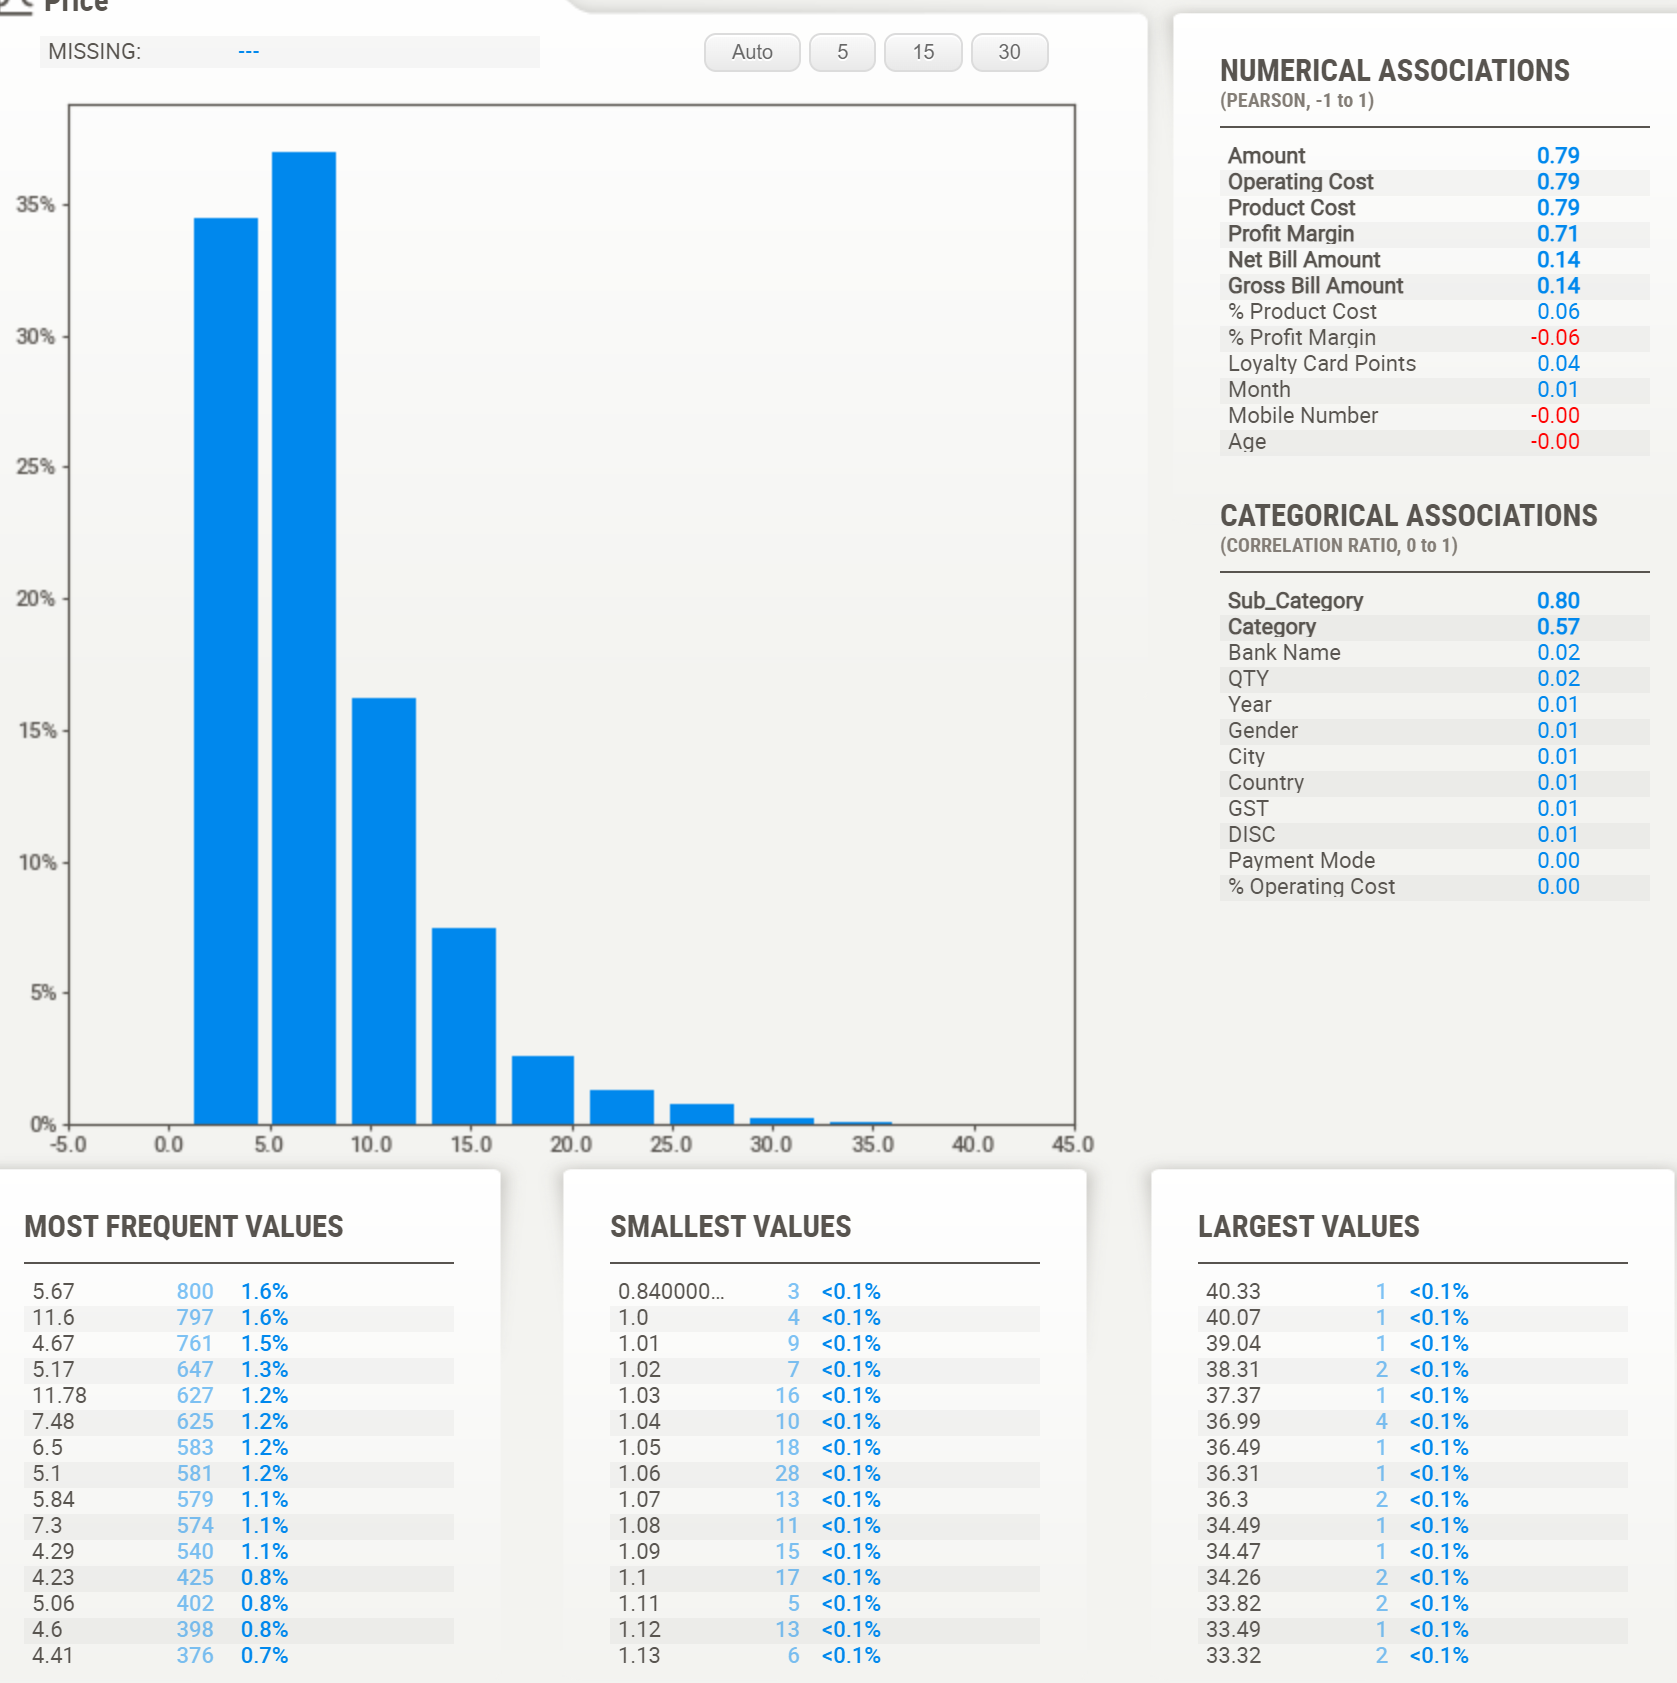

Зазвичай купують 1-2 одиниці товару, максимум 9.

Є сенс подивитися які товари переважно купують по 2, щоб зробити акцію чи інше пакування.

Складається враження, що у цьому магазині купують лише невеликі об'єми дешевих товарів і не роблять великі покупки 'на тиждень', а більше схоже на спонтанні покупки. Хоч є ще сенс подивитися розміри пакувань товарів у колонці Description, але це ж видно на розподілі Amount за 1 товар, де в чеку 1 продукт зазвичай до 30, а загальна сума чеку у більшості до 100$.

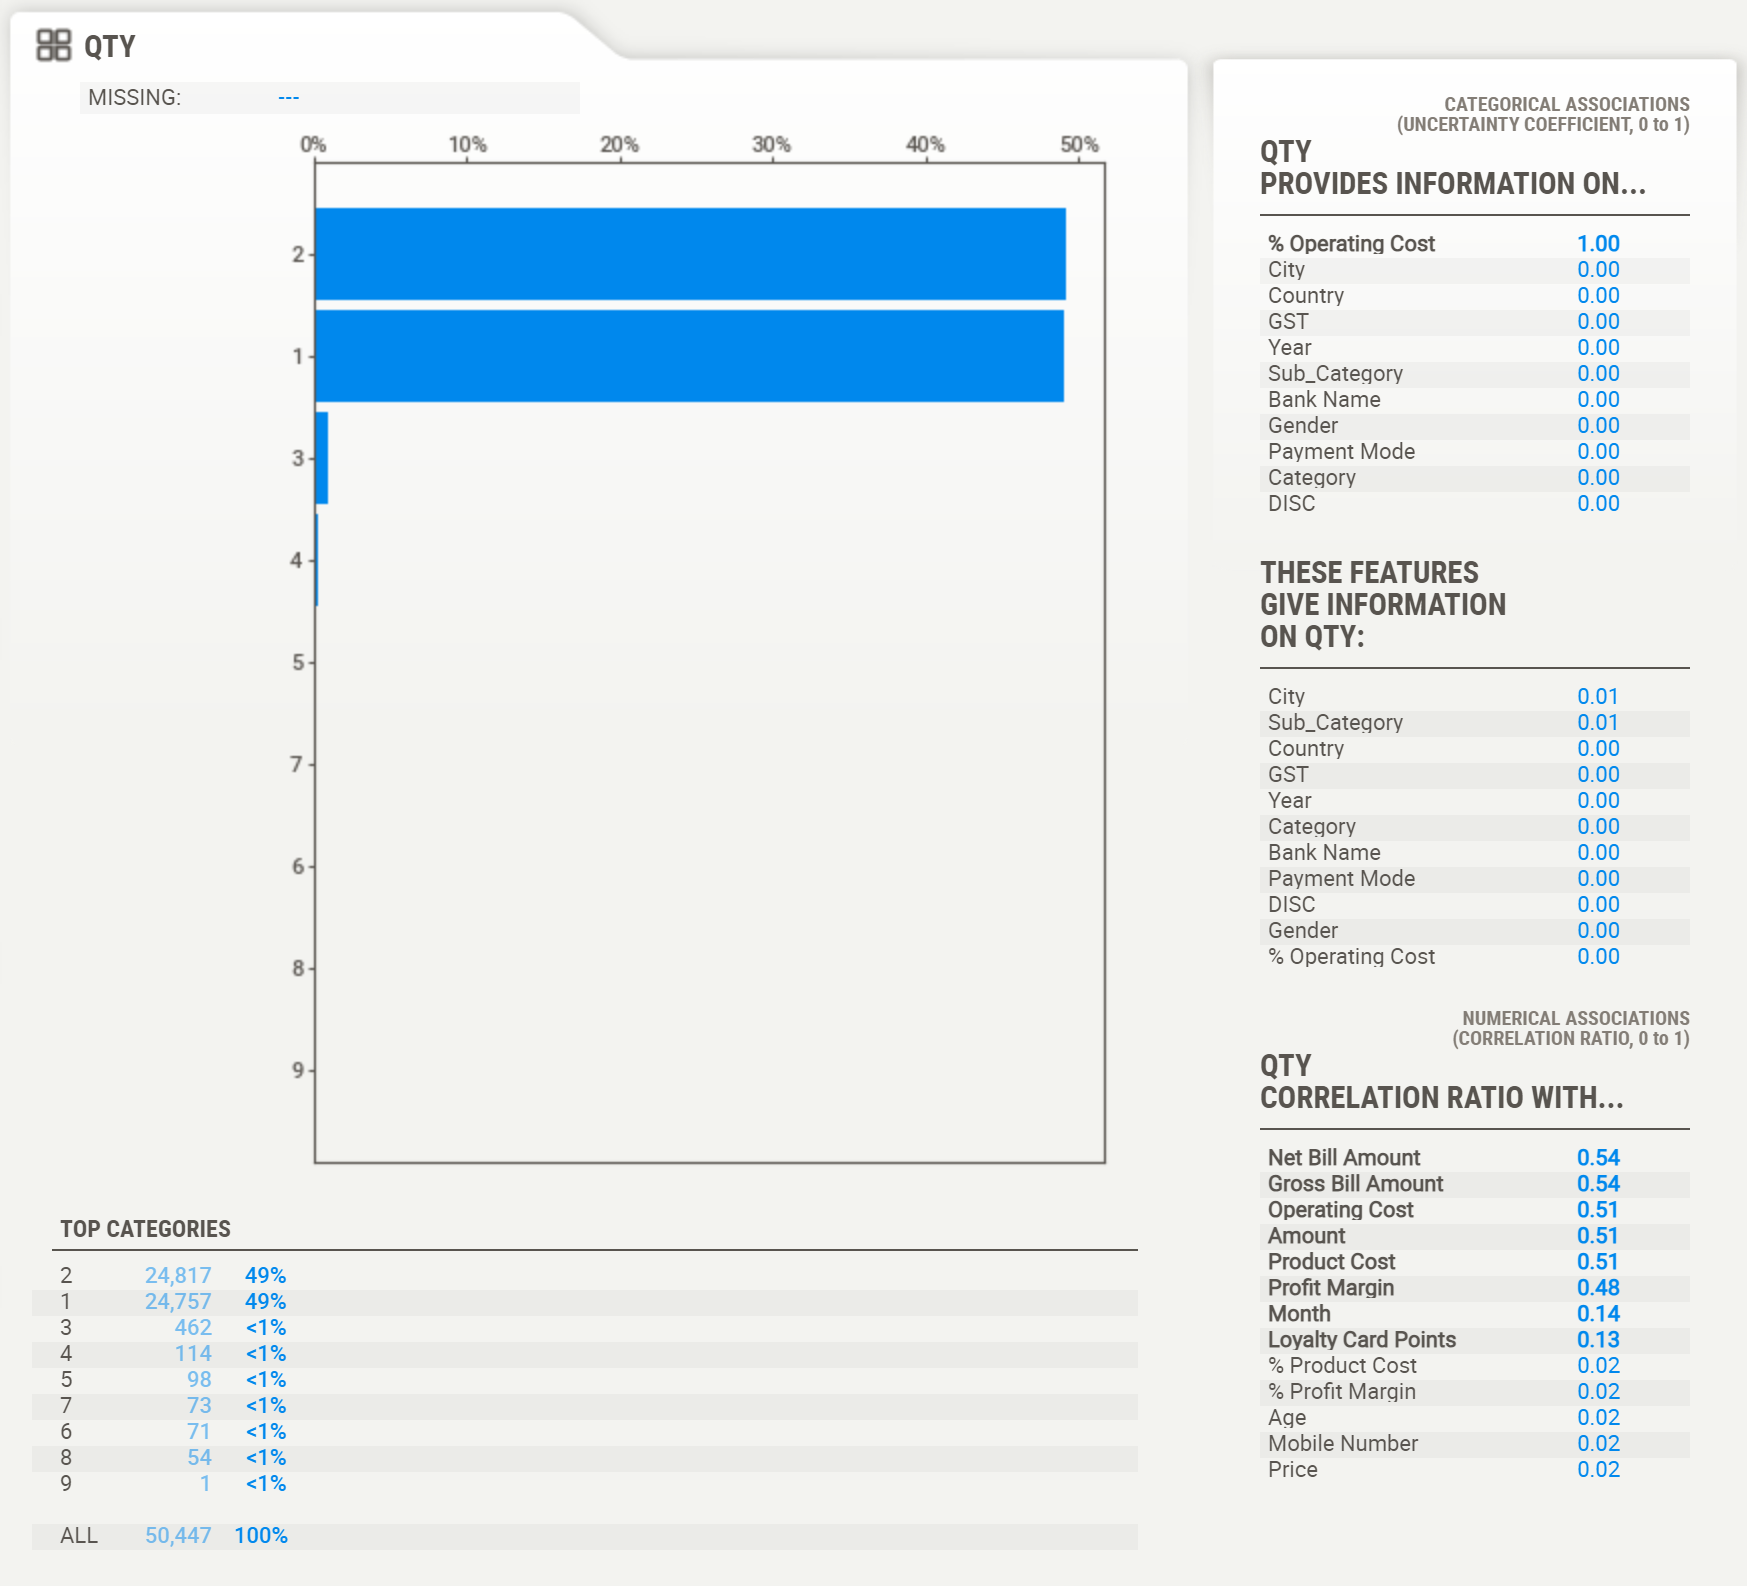

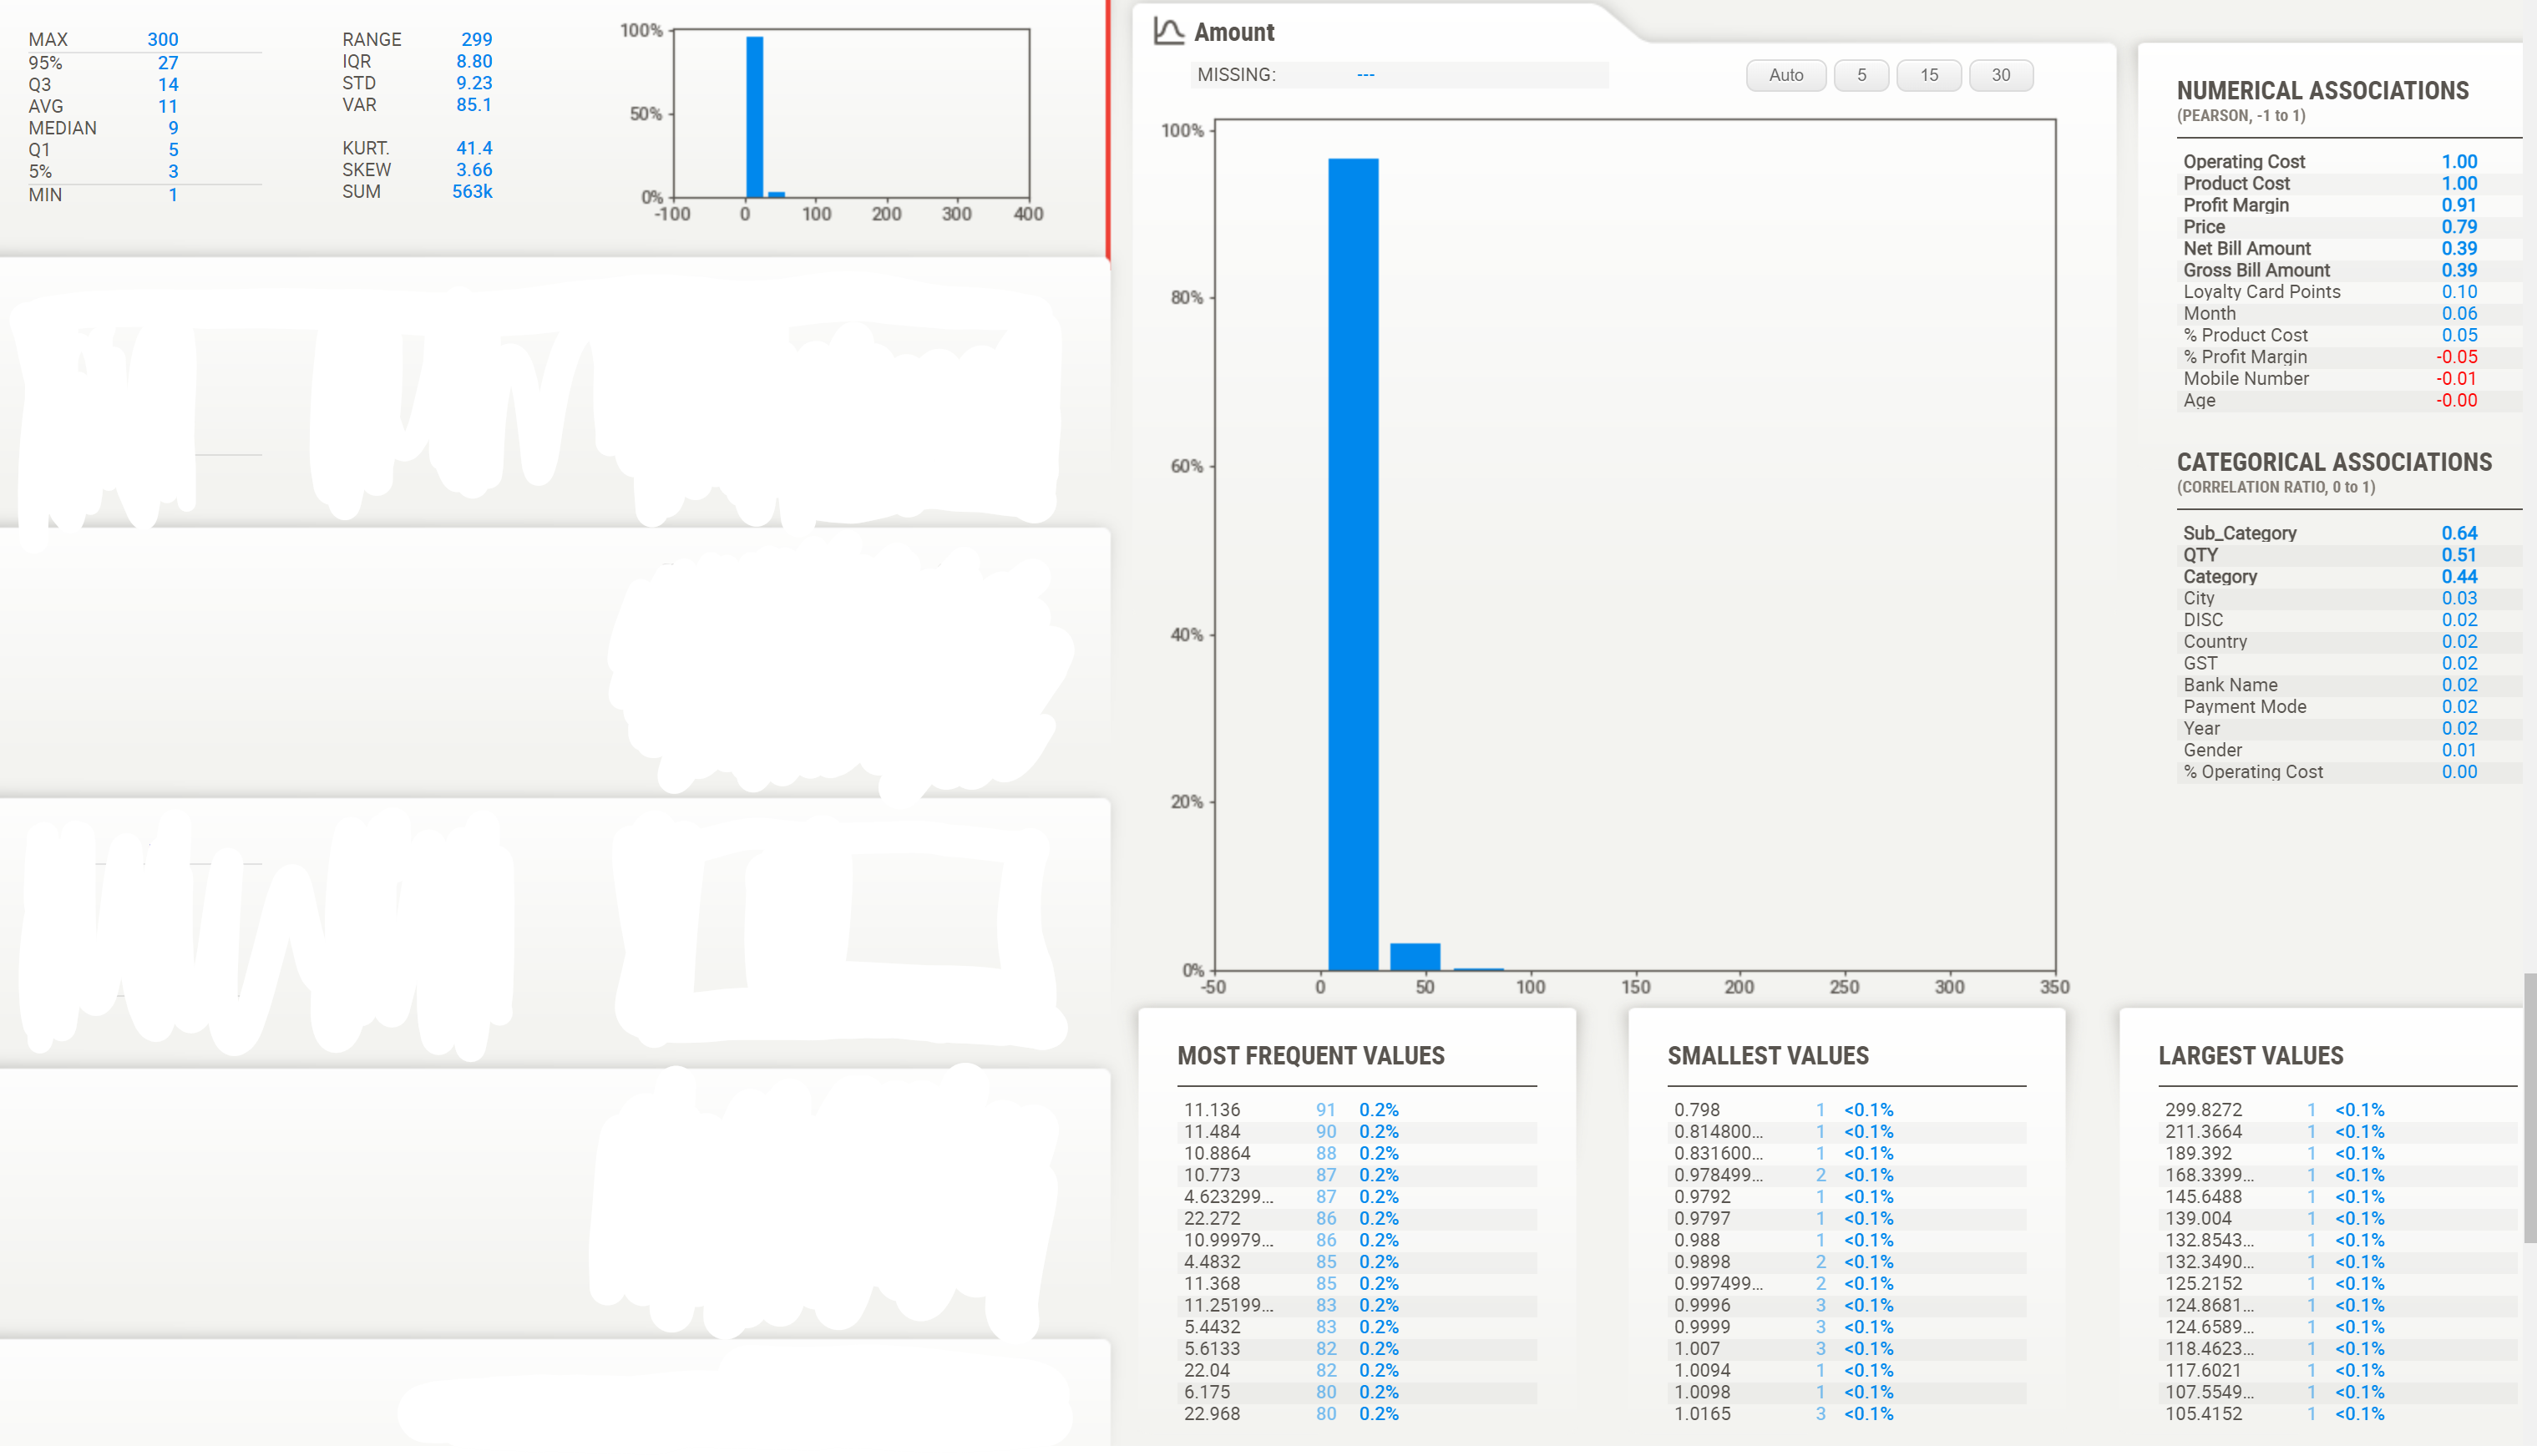

Оглянемо деталі транзакцій.

Транзакції переважно до 100 дол + податки.

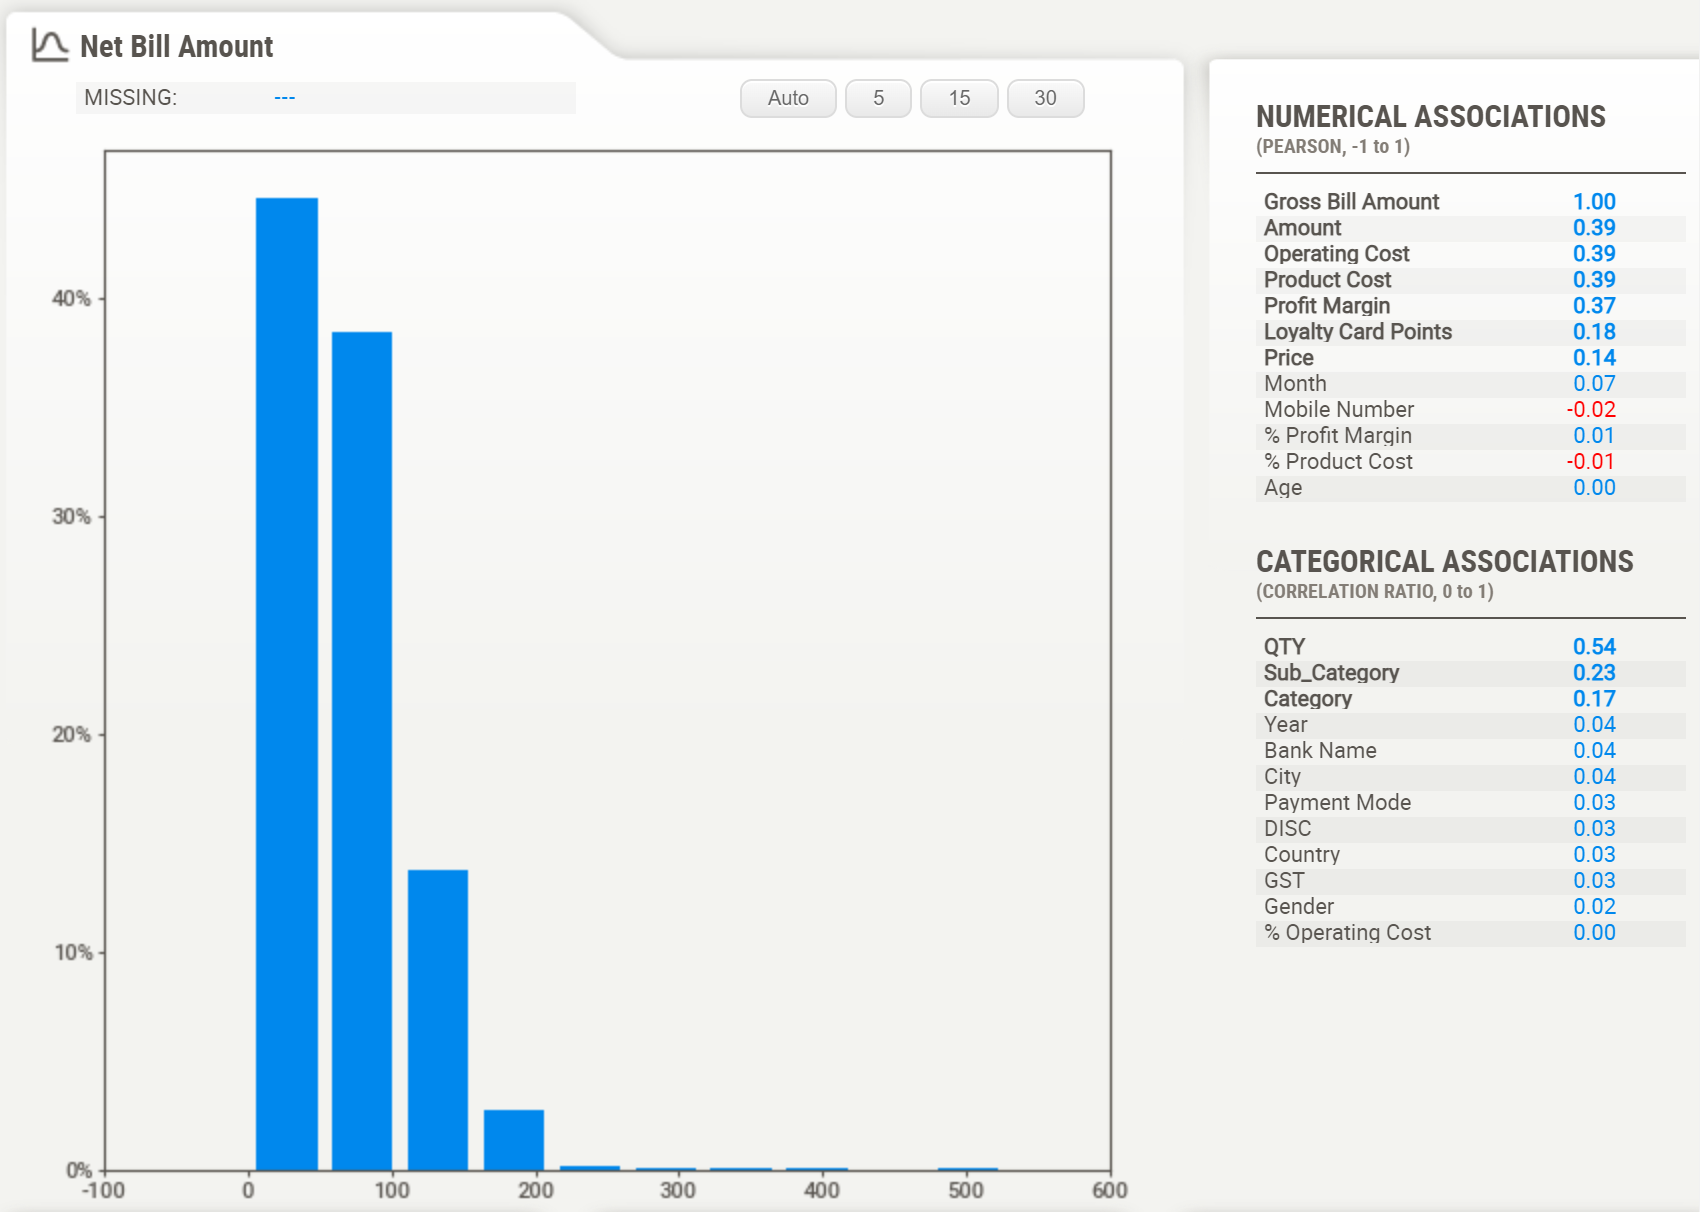

Всього є 5 можливих знижок 1-5%, які розподілені рівномірно, і є знижка для кожної покупки. 
Схоже, що знижки розподіляють випадковим чином серед покупками.
Можна це ще перевірити подивившись чи в 1го покупця однакова знижка чи його розмір знижки зростає з часом.
Оскільки для кожного покупця у цих даних є Membership ID, то є питання, чи всі покупці магазинів у програмі лояльності чи у нас є дані лише про покупки клієнтів у системі лояльності.

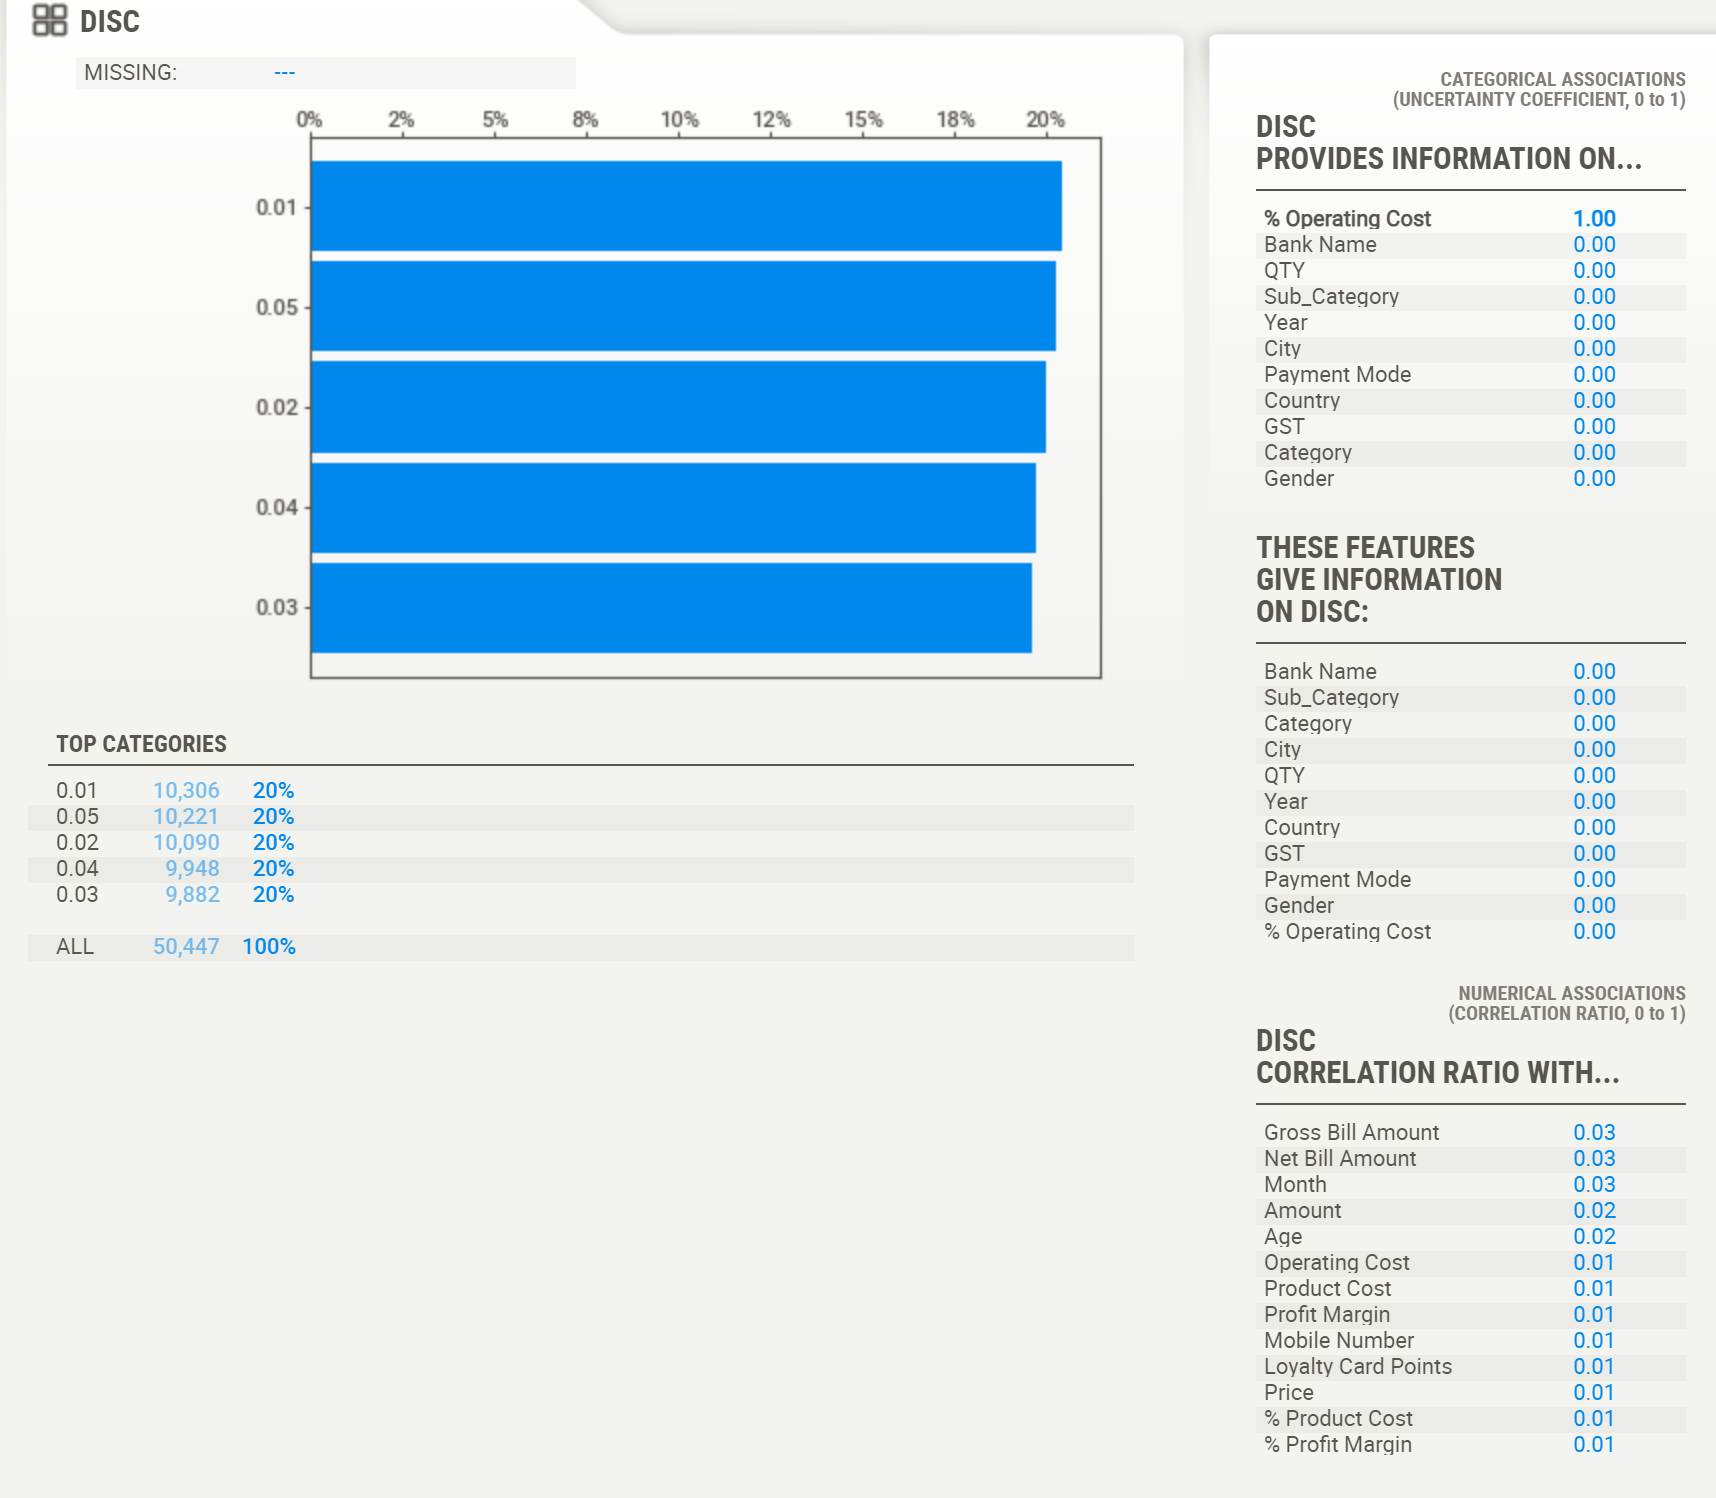

Є 4 різні податкові % у залежності від країни.

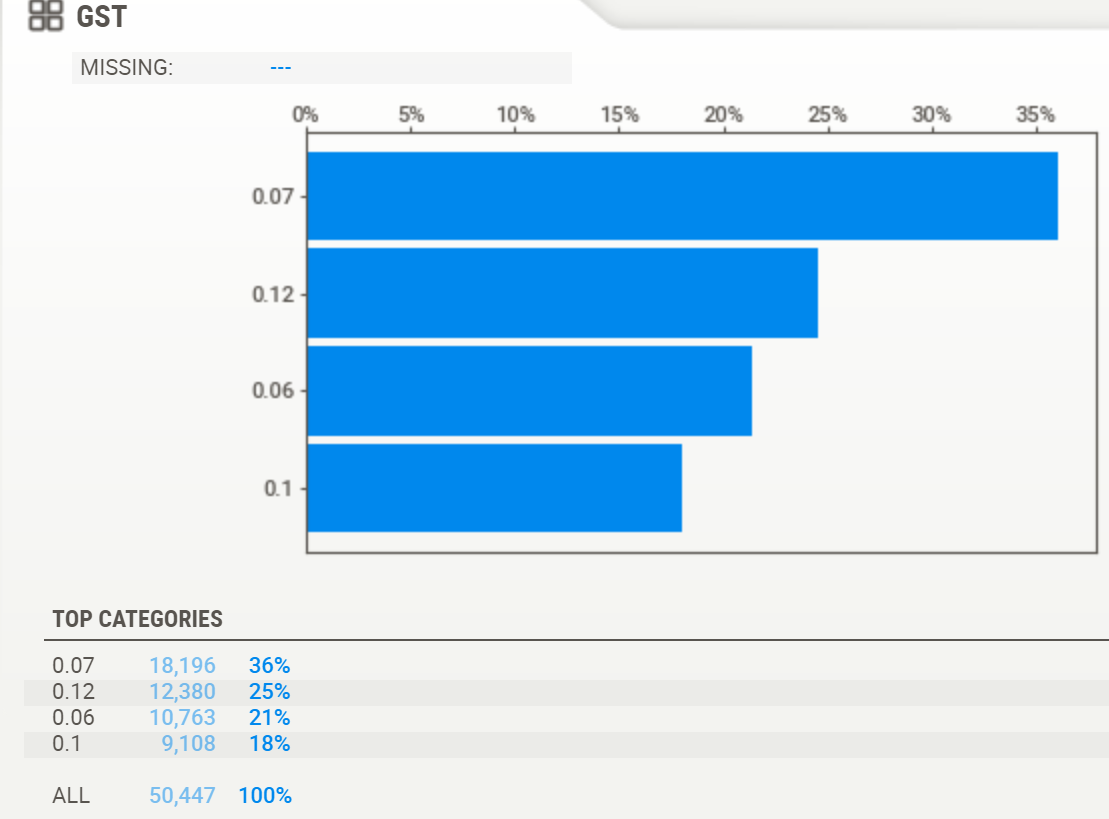

Способи оплати однаково часто використовуються серед усіх покупців. 
І поки не видно, щоб певна категорія покупців була схильна до певного способу оплати.

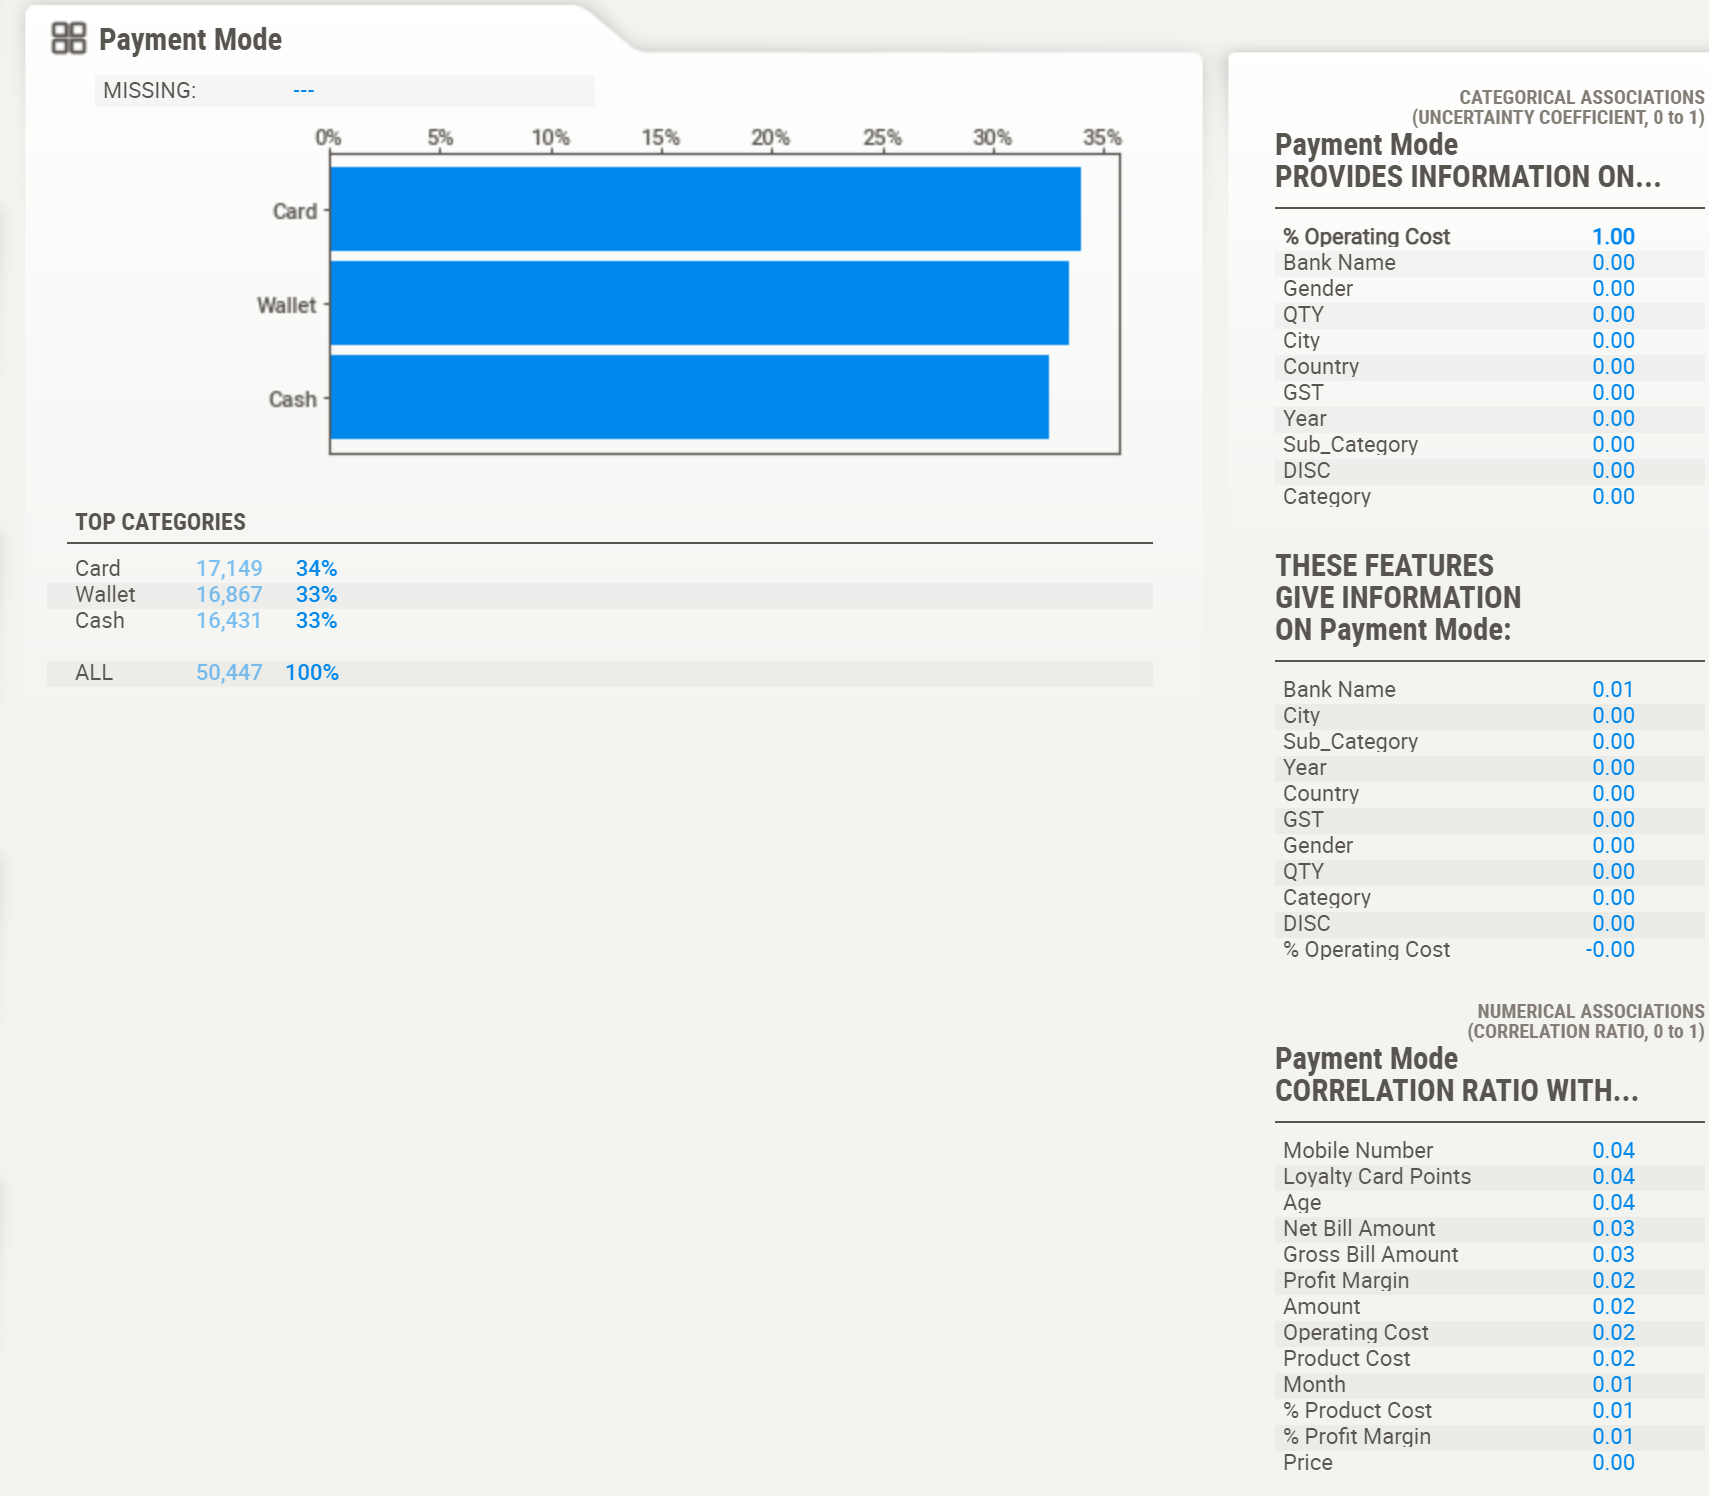

Всього є 14 банків, але використовують активно 5, майже рівномірно.
Дивно, що тут Cash <1%, а в попередній колонці Cash >30%. Варто уточнити, що мали на увазі, коли збирали ці дані.

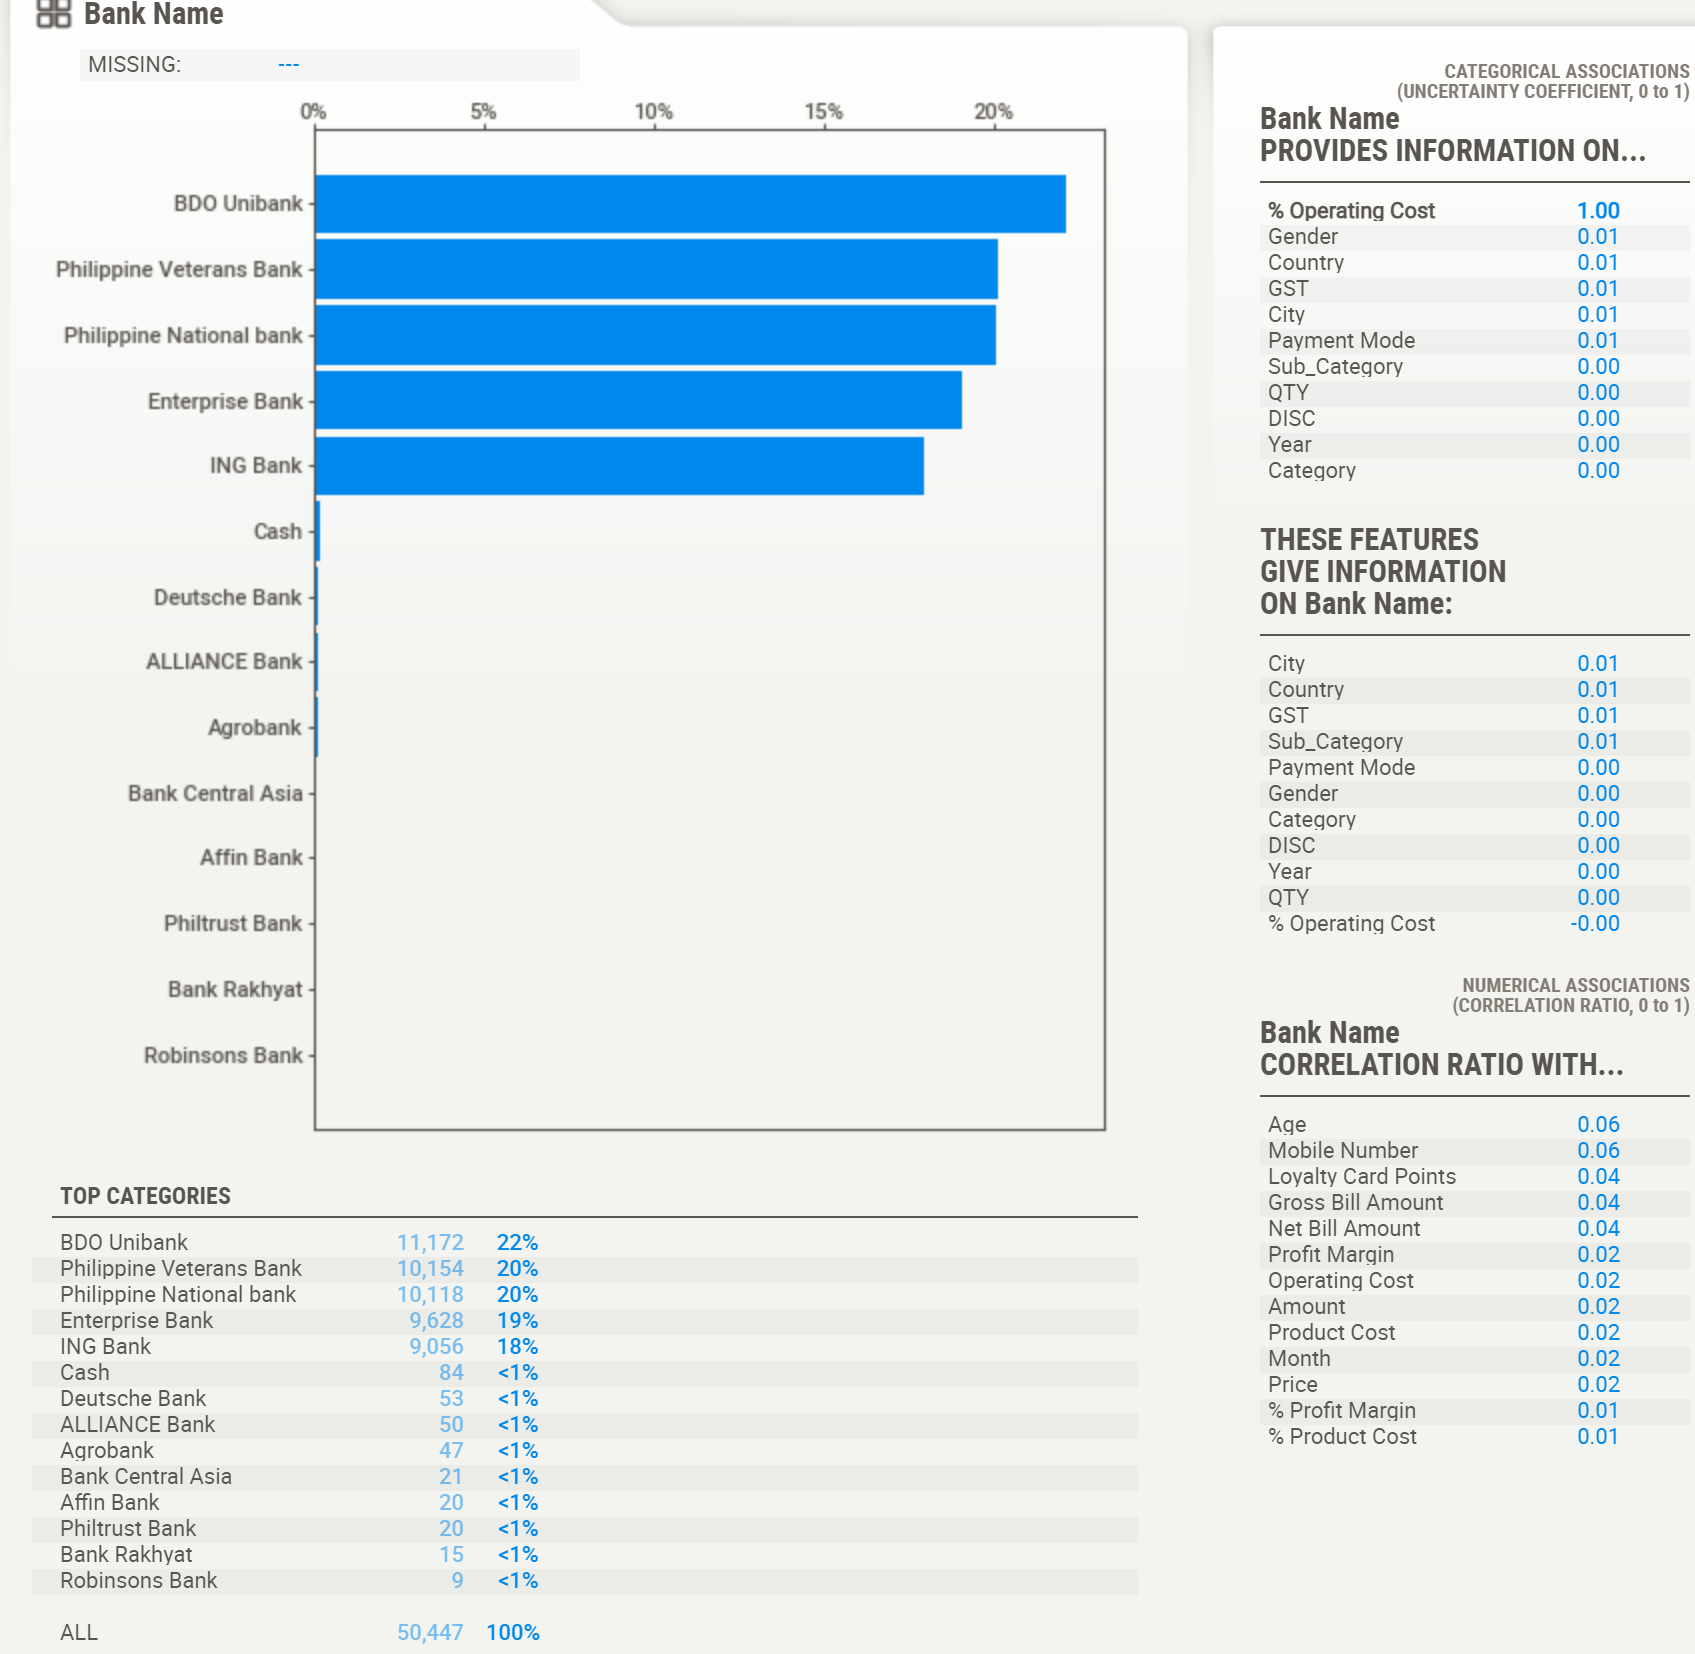

Завершимо огляд фінансовими метриками.

Відсоток прибутку від продажу від 5 до 15%, в середньому 10.6% +- 2.9%, хоч найпопулярніше значення близько 15%. 
П'ята частина покупок дає прибуток 14-15%.

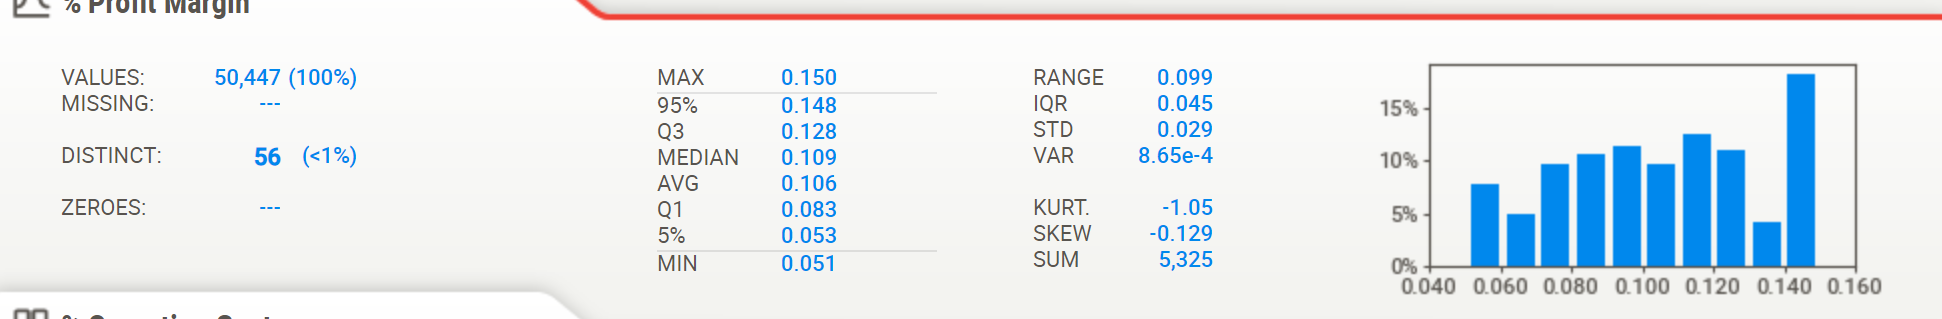

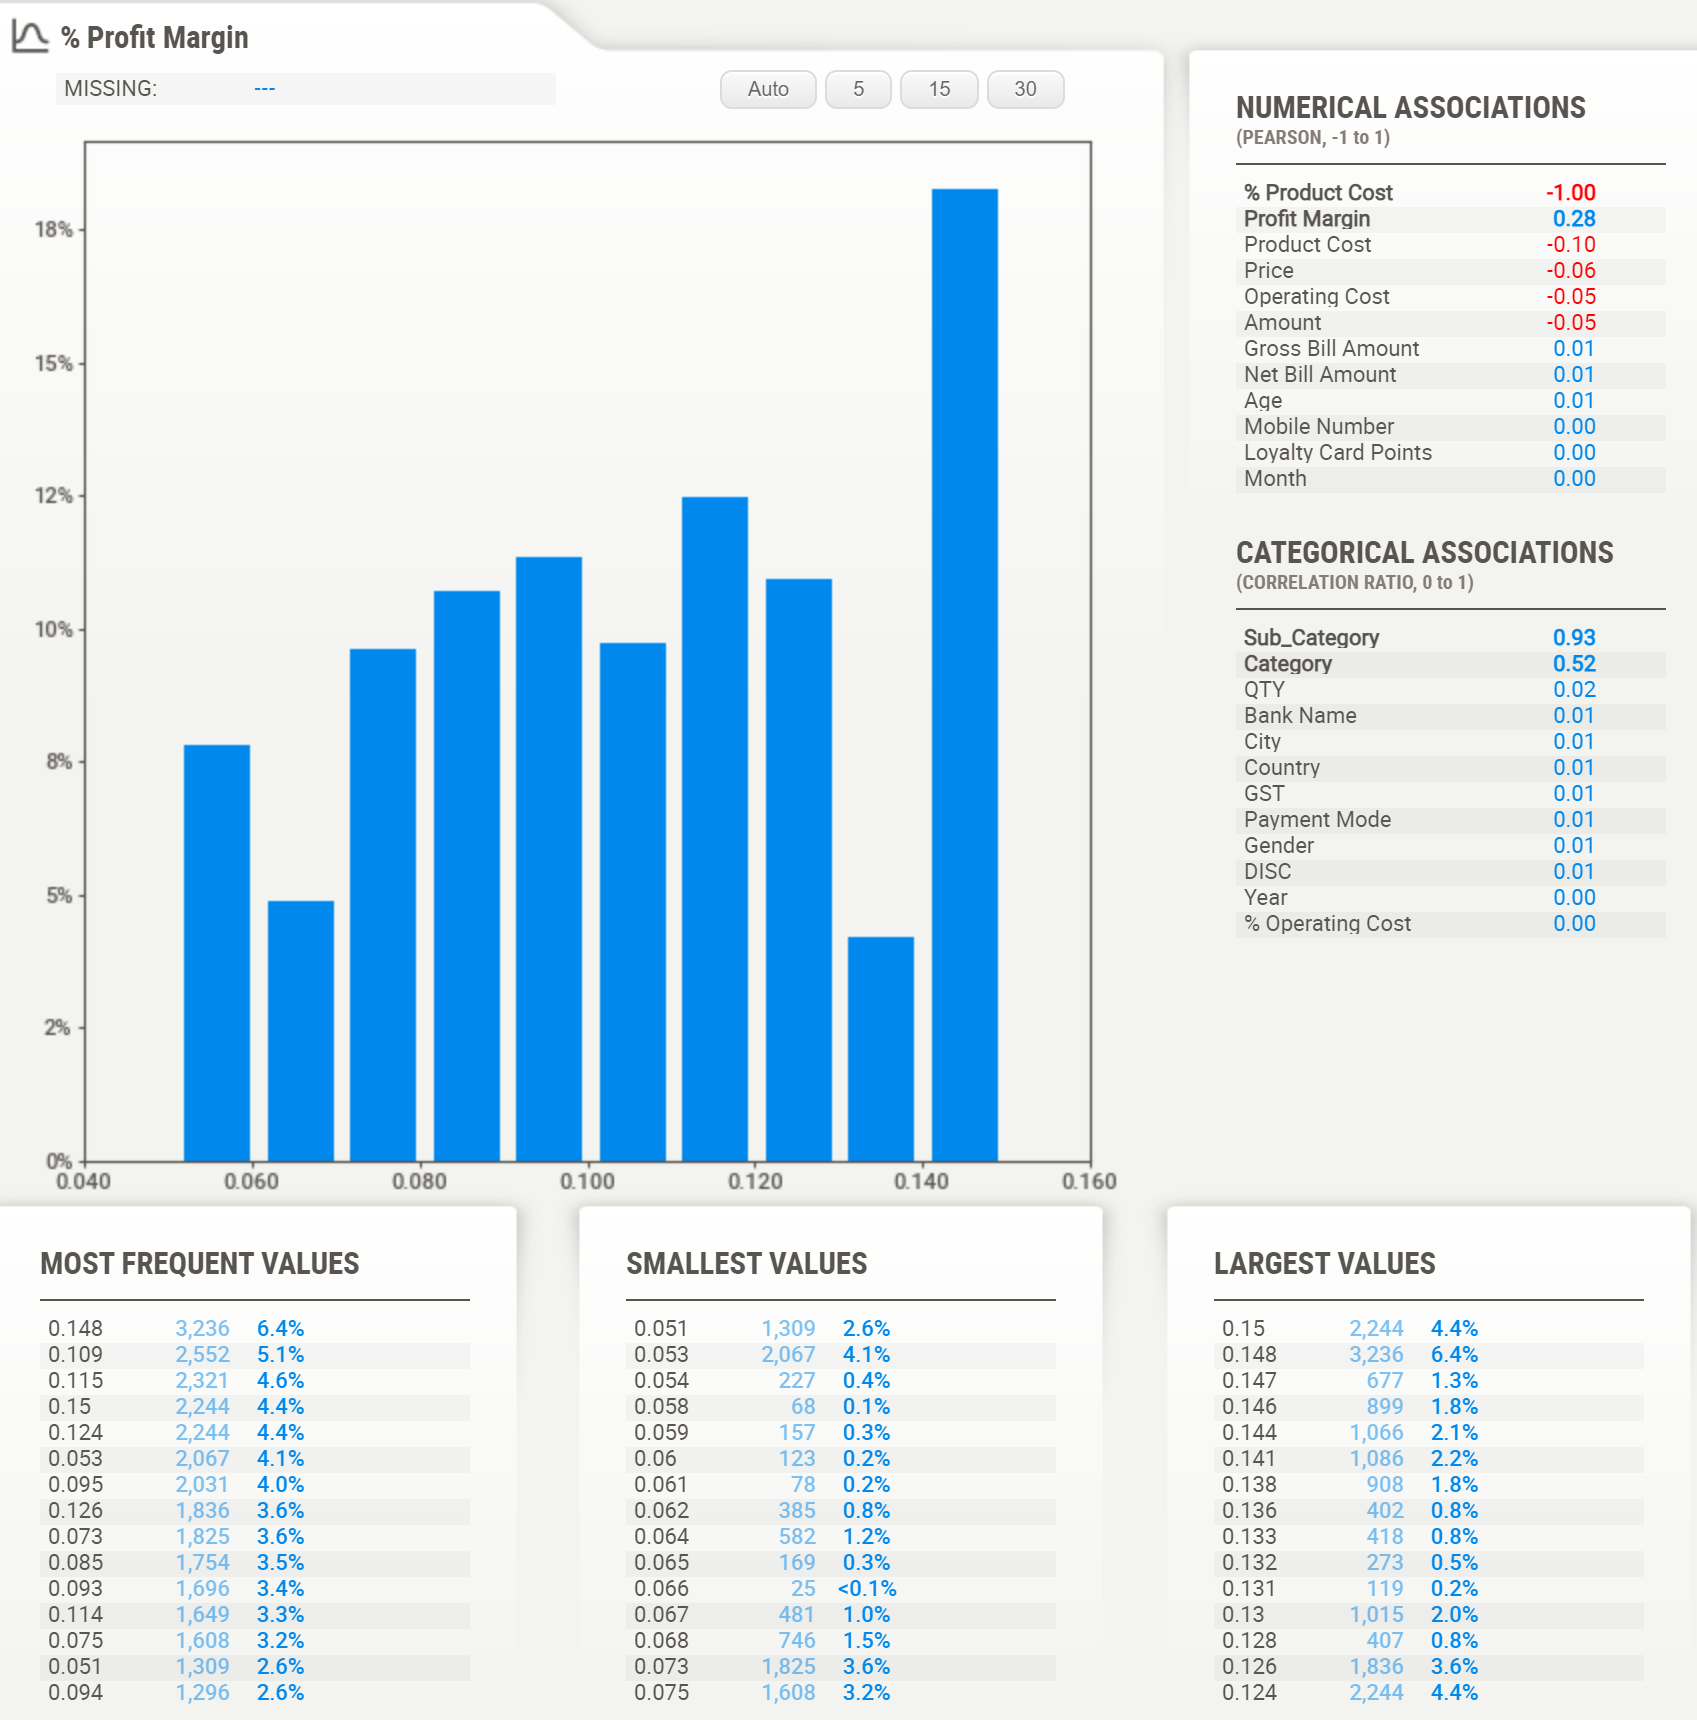

Operating cost завжди 15%, % Product Cost 70-80%, їх нема сенсу оглядати додатково, адже вони пов'язані з % Profit Margin.

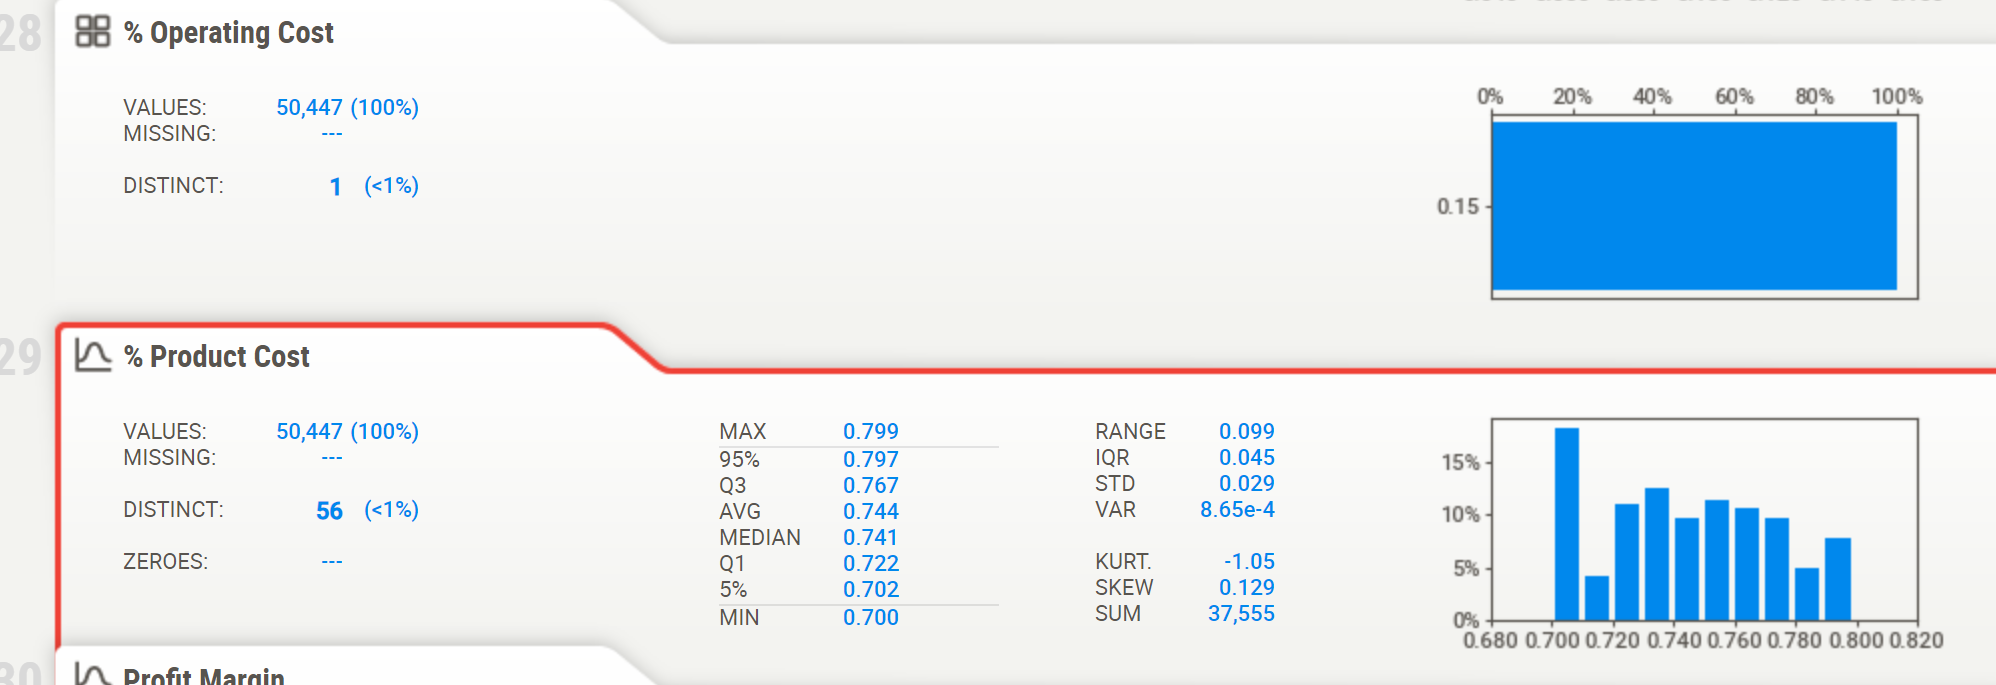

Із одної покупки продукту магазин зазвичай отримує прибуток до 3 дол і на операційні витрати до 4дол, а собівартість товарів до 21дол

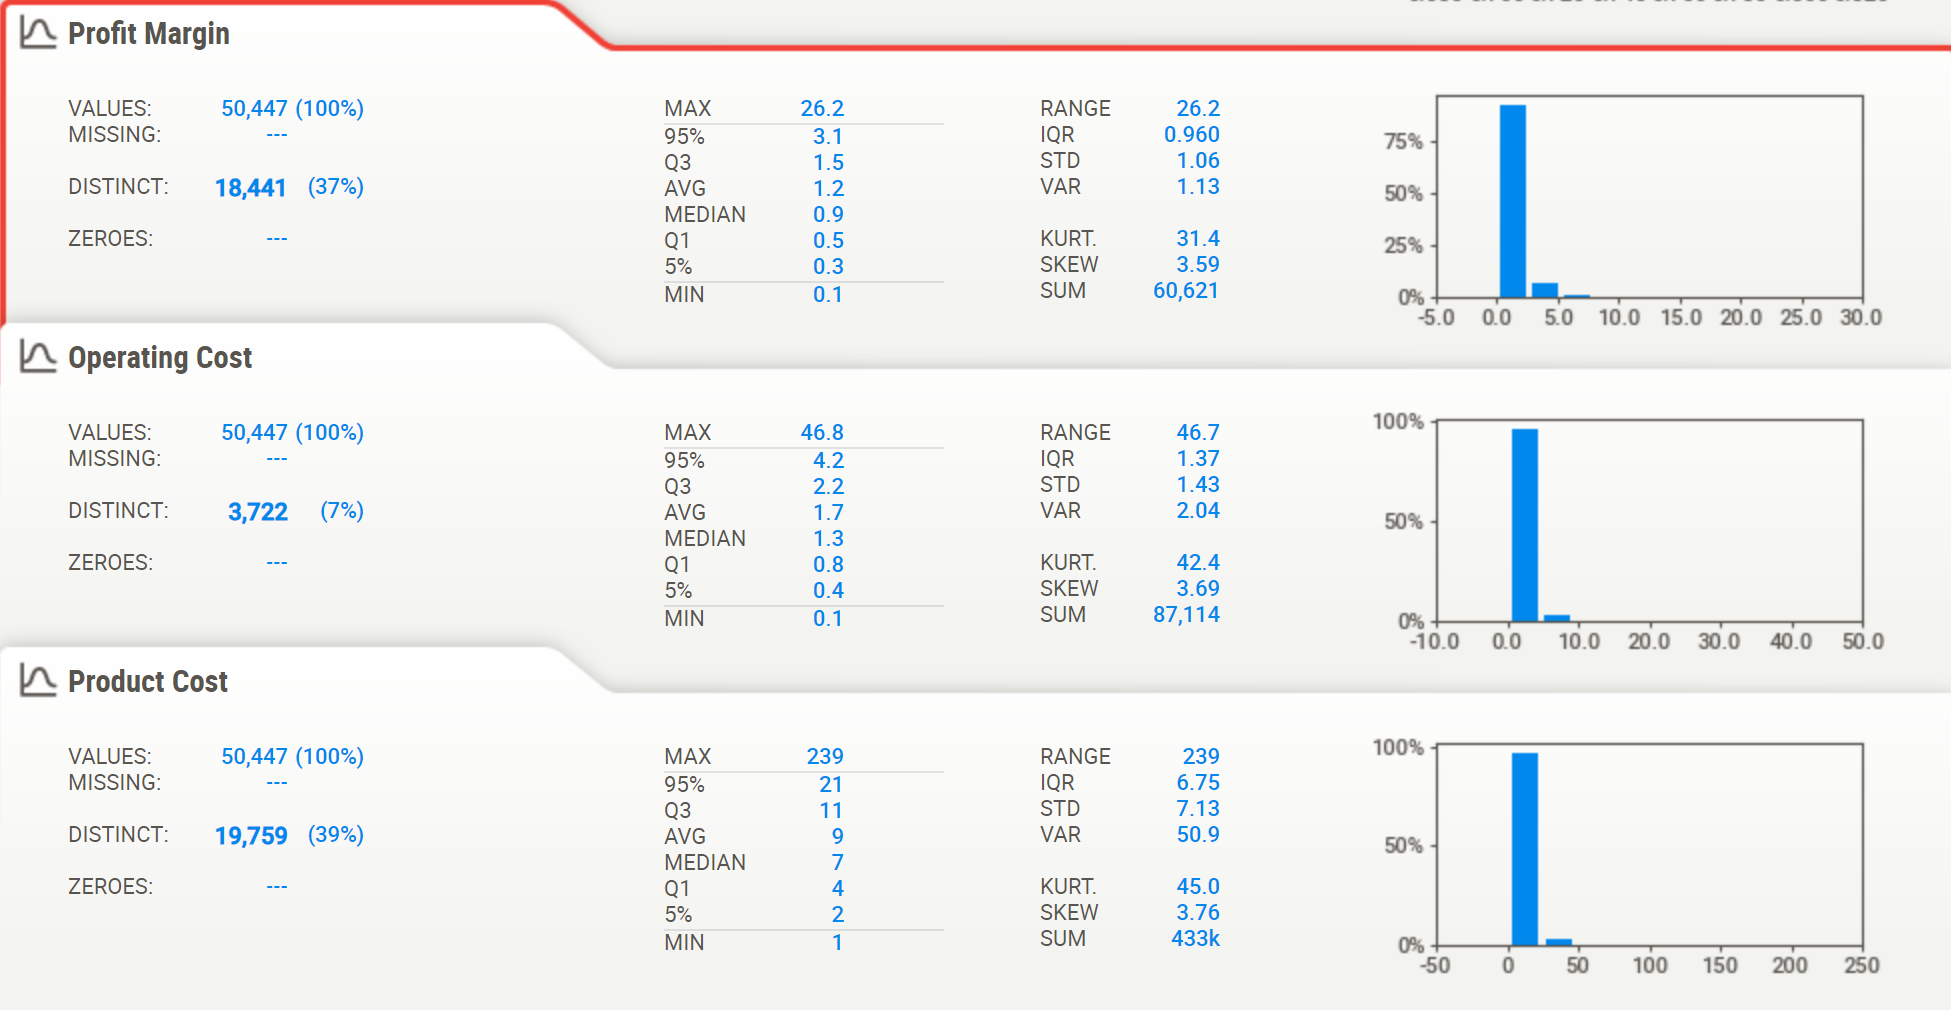

4. Перейдемо до дослідження даних.
Почну із сегментації клієнтів для ефективного розуміння різних груп клієнтів і роботи з ними.
Цікавить, скільки нових чи постійних клієнтів, як часто вони здійснюють покупки і які в них середні чеки, улюблені товари.

RFM analysis

In [73]:
now =  dt.datetime(2020,1,1)

In [77]:
rfm = df.groupby('Membership ID').agg({'Date' : lambda day : (now - day.max()).days,
                               'Receipt Number': lambda num : len(num),
                               'Amount': lambda Amount : Amount.sum()
                             })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list

In [78]:
rfm.head()

Recency  Frequency  Monetary
Membership ID                              
MIDID0001            8         38  507.4700
MIDID0002           51         30  401.5492
MIDID0003          231         31  246.2139
MIDID0004           59         50  510.4336
MIDID0005          101         27  360.4450

In [79]:
with pd.option_context("display.precision", 0):
    display(rfm.describe())

Recency  Frequency  Monetary
count     2601       2601      2601
mean       317         19       217
std        331         15       177
min          1          1         1
25%         72          8        75
50%        196         17       182
75%        441         28       309
max       1461        108      1136

In [80]:
rfm["R"] = pd.qcut(rfm["Recency"],3,labels=[3,2,1])
rfm["F"] = pd.qcut(rfm["Frequency"],3,labels=[1,2,3])
rfm["M"] = pd.qcut(rfm["Monetary"],3,labels=[1,2,3])
rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)

In [81]:
display(rfm.head())

Recency  Frequency  Monetary  R  F  M RFM_Score
Membership ID                                                 
MIDID0001            8         38  507.4700  3  3  3       333
MIDID0002           51         30  401.5492  3  3  3       333
MIDID0003          231         31  246.2139  2  3  2       232
MIDID0004           59         50  510.4336  3  3  3       333
MIDID0005          101         27  360.4450  3  3  3       333

Визначимо відповідність між кодами сегментів клієнтів, представленими у вигляді регулярних виразів, та описовими мітками, які надають інформацію про поведінку чи характеристики клієнтів, пов'язаних з цими кодами. 

In [93]:
seg_map = {
    r'11': 'Hibernating', #давно і рідко
    r'12': 'At Risk', #давно і не рідко
    r'13': 'Can\'t Loose', #давно але часто
    r'22': 'Need Attention', #не давно і не рідко
    r'23': 'Loyal Customers', #не давно і часто
    r'21': 'Promising', #не давно але рідко
    r'31': 'New Customers', #останнім часом але рідко
    r'32': 'Potential Loyalists', #останнім часом і не часто
    r'33': 'Champions' #останнім часом і часто
}

In [94]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

Recency  Frequency  Monetary  R  F  M RFM_Score  \
Membership ID                                                    
MIDID0001            8         38  507.4700  3  3  3       333   
MIDID0002           51         30  401.5492  3  3  3       333   
MIDID0003          231         31  246.2139  2  3  2       232   
MIDID0004           59         50  510.4336  3  3  3       333   
MIDID0005          101         27  360.4450  3  3  3       333   

                       Segment  
Membership ID                   
MIDID0001            Champions  
MIDID0002            Champions  
MIDID0003      Loyal Customers  
MIDID0004            Champions  
MIDID0005            Champions

Додамо Сегмент покупця до загальних таблиць.

In [143]:
df2 = sqldf(    '''
SELECT *
FROM df AS t1
LEFT JOIN rfm AS t2
ON t1.[Membership ID] = t2.[Membership ID];   
''')


In [144]:
df2.drop(['R','F', 'M'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Receipt Number            50447 non-null  object 
 1   Date                      50447 non-null  object 
 2   Year                      50447 non-null  object 
 3   Month                     50447 non-null  object 
 4   Time                      50447 non-null  object 
 5   Mobile Number             50447 non-null  int64  
 6   Membership ID             50447 non-null  object 
 7   Loyalty Card Points       50447 non-null  int64  
 8   Age                       50447 non-null  int64  
 9   Gender                    50447 non-null  object 
 10  City                      50447 non-null  object 
 11  Country                   50447 non-null  object 
 12  Category                  50447 non-null  object 
 13  Sub_Category              50447 non-null  object 
 14  Items 

In [106]:
clients = sqldf(    '''
SELECT *
FROM clients AS t1
LEFT JOIN rfm AS t2
ON t1.[Membership ID] = t2.[Membership ID];   
''')

In [107]:
clients

Membership ID  First year  First Month  Mobile Number  \
0        MIDID0001        2016            1     9793548581   
1        MIDID0002        2016            1     9938441276   
2        MIDID0003        2016            1     9976742552   
3        MIDID0004        2016            1     9800896004   
4        MIDID0005        2016            1     9873085193   
...            ...         ...          ...            ...   
2596     MIDSG1278        2019            2     9884495683   
2597     MIDSG1279        2019            4     9798891389   
2598     MIDSG1280        2019            4     9890296090   
2599     MIDSG1281        2019           12     9996556681   
2600     MIDSG1282        2019           12     9968042049   

      Loyalty Card Points  Age  Gender    Country       City Membership ID  \
0                      54   36    Male  Indonesia    Jakarta     MIDID0001   
1                      42   54    Male  Indonesia    Jakarta     MIDID0002   
2                      26   16  Female  Indonesia    Jakarta     MIDID0003   
3                      53   20  Female  Indonesia    Jakarta     MIDID0004   
4                      36   49    Male  Indonesia    Jakarta     MIDID0005   
...                   ...  ...     ...        ...        ...           ...   
2596                    4   48  Female  Singapore  Woodlands     MIDSG1278   
2597                    1   46  Female  Singapore  Woodlands     MIDSG1279   
2598                    3   40  Female  Singapore  Woodlands     MIDSG1280   
2599                    6   47  Female  Singapore  Woodlands     MIDSG1281   
2600                    9   30  Female  Singapore  Woodlands     MIDSG1282   

      Recency  Frequency  Monetary  R  F  M RFM_Score          Segment  
0           8         38  507.4700  3  3  3       333        Champions  
1          51         30  401.5492  3  3  3       333        Champions  
2         231         31  246.2139  2  3  2       232  Loyal Customers  
3          59         50  510.4336  3  3  3       333        Champions  
4         101         27  360.4450  3  3  3       333        Champions  
...       ...        ...       ... .. .. ..       ...              ...  
2596      329          3   37.6200  2  1  1       211        Promising  
2597      250          2   14.4441  2  1  1       211        Promising  
2598      247          4   23.9978  2  1  1       211        Promising  
2599       30          7   59.6938  3  1  1       311    New Customers  
2600       24          7   86.9314  3  1  1       311    New Customers  

[2601 rows x 18 columns]

Оглянемо характеристики сегментів.

In [112]:
Segment_properties = rfm.groupby('Segment').agg({
    'Recency': [lambda cl: cl.count(), lambda cl: cl.mean()],
    'Frequency': [lambda cl: cl.mean()],
    'Monetary': [lambda cl: cl.mean(), lambda cl: cl.sum()]
     })

# Rename the columns for clarity
Segment_properties.columns = ['Segment_size','Recency_mean','Frequency_mean','Monetary_mean', 'Total_Amount']

In [113]:
with pd.option_context("display.precision", 0):
    display(Segment_properties.sort_values('Monetary_mean'))

Segment_size  Recency_mean  Frequency_mean  \
Segment                                                           
Hibernating                   551           782               5   
Promising                     223           218               5   
New Customers                 121            54               6   
At Risk                       229           584              16   
Need Attention                330           213              17   
Potential Loyalists           285            48              18   
Can't Loose                    84           473              31   
Loyal Customers               317           190              34   
Champions                     461            47              39   

                     Monetary_mean  Total_Amount  
Segment                                           
Hibernating                     51         27919  
Promising                       59         13243  
New Customers                   70          8472  
At Risk                        184         42165  
Need Attention                 195         64251  
Potential Loyalists            198         56558  
Can't Loose                    342         28753  
Loyal Customers                377        119547  
Champions                      439        202482

Перевіримо зв'язок сегменту із параметрами клієнтів із метою побачити як ми можемо стимулювати покупців приходити у магазин частіше і купляти більше.

Почнемо із дослідження прибутковості кожного сегменту.

Нижче видно, що покупки на найбільші суми роблять сегменти Champions, Loyal Customers, далі сегмент Can't Loose, далі сегменти At Risk, Need attenion, Potential Loyalists, i покупки на найменші суми роблять роблять Hibernating, New Customers, Promising, які не такі уже і Promising. А от решта назв сегментів цілком доречні, згідно з порядком розміру сум покупок.

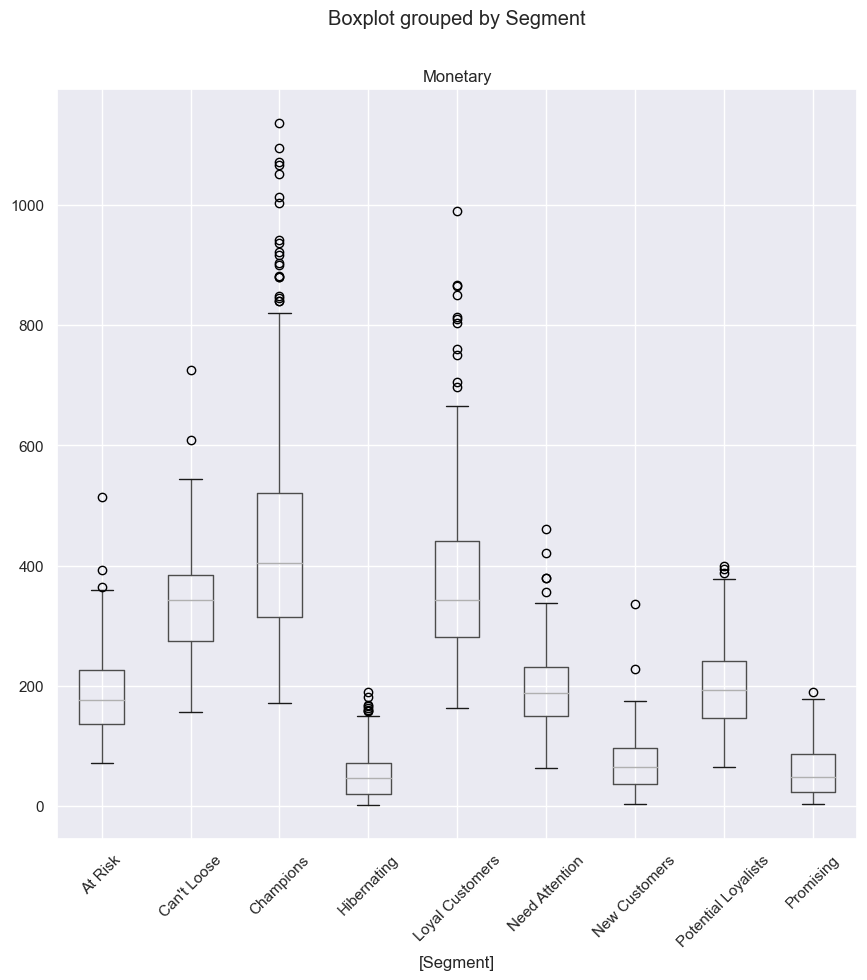

In [114]:
rfm[['Monetary','Segment']].boxplot(by='Segment', figsize=(10,10));
# Rotating x-axis labels for better readability
plt.xticks(rotation=45);


Спробую виявити особливості сегменту Can't Loose і, можливо, сегментів At Risk, Need attenion, Potential Loyalists, щоб стимулювати їх перейти в сегменти Champions чи Loyal Customers.

In [115]:
clients.head()

Membership ID  First year  First Month  Mobile Number  Loyalty Card Points  \
0     MIDID0001        2016            1     9793548581                   54   
1     MIDID0002        2016            1     9938441276                   42   
2     MIDID0003        2016            1     9976742552                   26   
3     MIDID0004        2016            1     9800896004                   53   
4     MIDID0005        2016            1     9873085193                   36   

   Age  Gender    Country     City Membership ID  Recency  Frequency  \
0   36    Male  Indonesia  Jakarta     MIDID0001        8         38   
1   54    Male  Indonesia  Jakarta     MIDID0002       51         30   
2   16  Female  Indonesia  Jakarta     MIDID0003      231         31   
3   20  Female  Indonesia  Jakarta     MIDID0004       59         50   
4   49    Male  Indonesia  Jakarta     MIDID0005      101         27   

   Monetary  R  F  M RFM_Score          Segment  
0  507.4700  3  3  3       333        Champions  
1  401.5492  3  3  3       333        Champions  
2  246.2139  2  3  2       232  Loyal Customers  
3  510.4336  3  3  3       333        Champions  
4  360.4450  3  3  3       333        Champions

In [146]:
df2.head()

Receipt Number                        Date  Year Month             Time  \
0       GIJ00001  2016-01-02 00:00:00.000000  2016     1  10:08:03.260000   
1       GIJ00002  2016-01-02 00:00:00.000000  2016     1  15:46:50.832000   
2       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   
3       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   
4       GIJ00003  2016-01-02 00:00:00.000000  2016     1  11:28:52.166000   

   Mobile Number Membership ID  Loyalty Card Points  Age  Gender  ...  \
0     9793548581     MIDID0001                    1   36    Male  ...   
1     9938441276     MIDID0002                    2   54    Male  ...   
2     9976742552     MIDID0003                    1   16  Female  ...   
3     9976742552     MIDID0003                    1   16  Female  ...   
4     9976742552     MIDID0003                    2   16  Female  ...   

  Product Cost Net Bill Amount_manual Gross Bill Amount_manual Hour  \
0      8.65200                12.1128                 13.32408   10   
1     16.98240                22.9680                 25.26480   15   
2      9.35693                30.7692                 42.18786   11   
3      2.65760                30.7692                 42.18786   11   
4      3.21930                30.7692                 42.18786   11   

  Membership ID Recency Frequency  Monetary  RFM_Score          Segment  
0     MIDID0001       8        38  507.4700        333        Champions  
1     MIDID0002      51        30  401.5492        333        Champions  
2     MIDID0003     231        31  246.2139        232  Loyal Customers  
3     MIDID0003     231        31  246.2139        232  Loyal Customers  
4     MIDID0003     231        31  246.2139        232  Loyal Customers  

[5 rows x 41 columns]

По віку усі сегменти мають схожий розподіл, то ж цей параметр не допоможе.

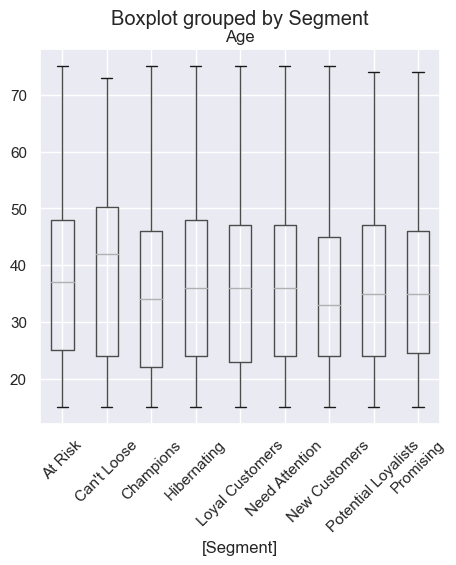

In [118]:
clients[['Age','Segment']].boxplot(by='Segment', figsize=(5,5));
# Rotating x-axis labels for better readability
plt.xticks(rotation=45);

Усі сегменти мають переважну кількість жінок, зокрема, сегменти, які нас цікавлять. 
То ж можна робити промо направлене на жінок, або ж навпаки, залучити більше чоловіків, якщо дохід від них більший.
Але видно далі, що в кожному сегменті дохід від статі не значно відрізняється.

In [122]:
# Calculate category-wise percentages and normalize
category_perc = clients.groupby('Segment')['Gender'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
category_perc

Segment  Gender  Percentage
0               At Risk  Female   82.969432
1               At Risk    Male   17.030568
2           Can't Loose  Female   80.952381
3           Can't Loose    Male   19.047619
4             Champions  Female   83.514100
5             Champions    Male   16.485900
6           Hibernating  Female   72.232305
7           Hibernating    Male   27.767695
8       Loyal Customers  Female   86.750789
9       Loyal Customers    Male   13.249211
10       Need Attention  Female   85.454545
11       Need Attention    Male   14.545455
12        New Customers  Female   80.165289
13        New Customers    Male   19.834711
14  Potential Loyalists  Female   84.561404
15  Potential Loyalists    Male   15.438596
16            Promising  Female   74.439462
17            Promising    Male   25.560538

In [123]:
Gender_Segment = category_perc.pivot_table(index = 'Segment', columns = 'Gender', values = 'Percentage', aggfunc ='sum')
Gender_Segment

Gender                  Female       Male
Segment                                  
At Risk              82.969432  17.030568
Can't Loose          80.952381  19.047619
Champions            83.514100  16.485900
Hibernating          72.232305  27.767695
Loyal Customers      86.750789  13.249211
Need Attention       85.454545  14.545455
New Customers        80.165289  19.834711
Potential Loyalists  84.561404  15.438596
Promising            74.439462  25.560538

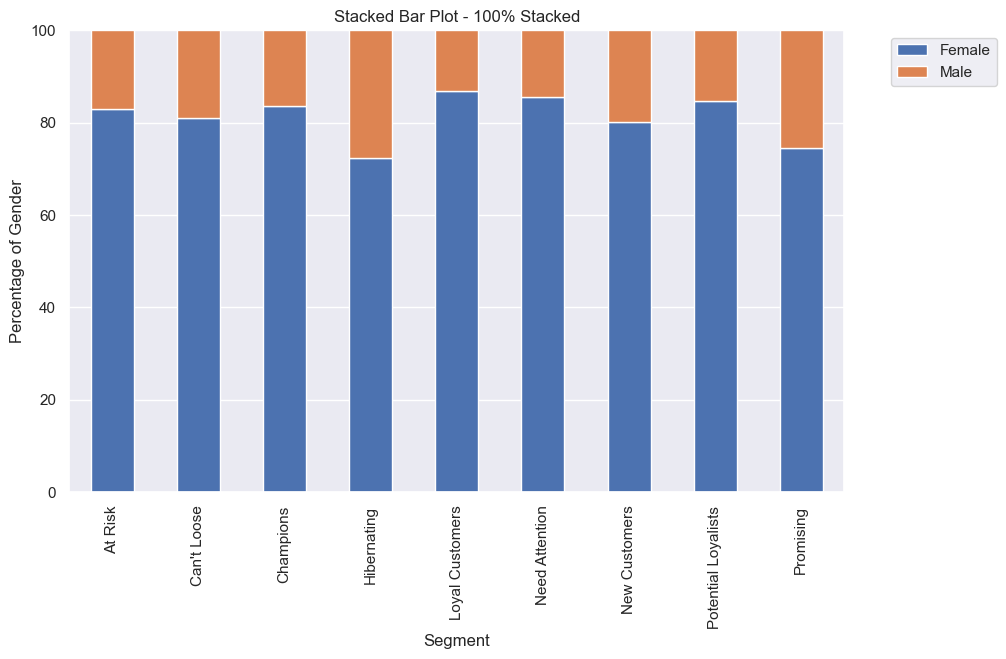

In [124]:
Gender_Segment.plot(kind='bar', stacked=True, figsize=(10,6))

# Set y-axis limit to 100%
plt.ylim(0, 100)

# Set plot title and labels
plt.title('Stacked Bar Plot - 100% Stacked')
plt.xlabel('Segment')
plt.ylabel('Percentage of Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show();

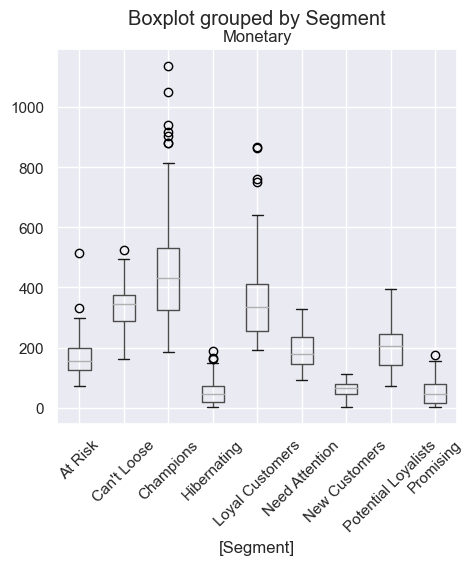

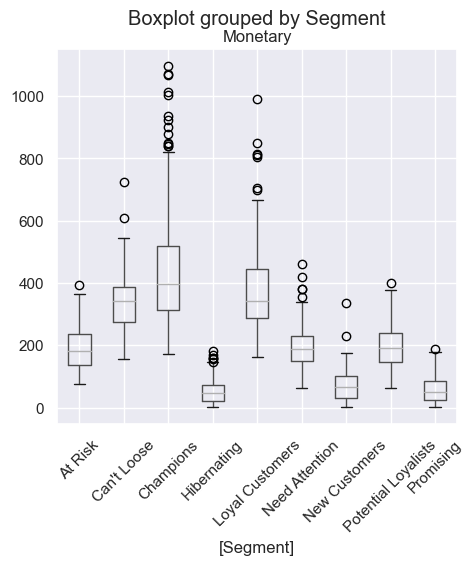

In [129]:
clients[clients.Gender == 'Male'][['Monetary','Segment']].boxplot(by='Segment', figsize=(5,5))
plt.xticks(rotation=45)
clients[clients.Gender == 'Female'][['Monetary','Segment']].boxplot(by='Segment', figsize=(5,5))
;
# Rotating x-axis labels for better readability
plt.xticks(rotation=45);

О котрій годині зазвичай приходять клієнти з сегменту Can't Loose, і сегментів At Risk, Need attenion, Potential Loyalists?

In [147]:
Segment_Hour = df2.pivot_table(index = 'Hour', columns = 'Segment', values = 'Receipt Number', aggfunc ='count')
Segment_Hour

Segment  At Risk  Can't Loose  Champions  Hibernating  Loyal Customers  \
Hour                                                                     
10           314          286       1423          188              861   
11           302          168       1445          201              828   
12           273          211       1518          234              860   
13           377          263       1582          220              928   
14           319          195       1383          237              942   
15           298          154       1580          255              869   
16           259          268       1463          185              889   
17           274          128       1442          269              956   
18           327          201       1531          261              945   
19           249          230       1567          177              925   
20           329          229       1614          232              975   
21           315          259       1436          204              907   

Segment  Need Attention  New Customers  Potential Loyalists  Promising  
Hour                                                                    
10                  484             44                  513         58  
11                  464             68                  468         78  
12                  478             65                  378        122  
13                  421             56                  469        102  
14                  457             27                  384         99  
15                  481             73                  428        127  
16                  515             58                  458         89  
17                  513             66                  289         99  
18                  424             50                  406        122  
19                  535             84                  373         75  
20                  452             40                  483         92  
21                  516            106                  382        116

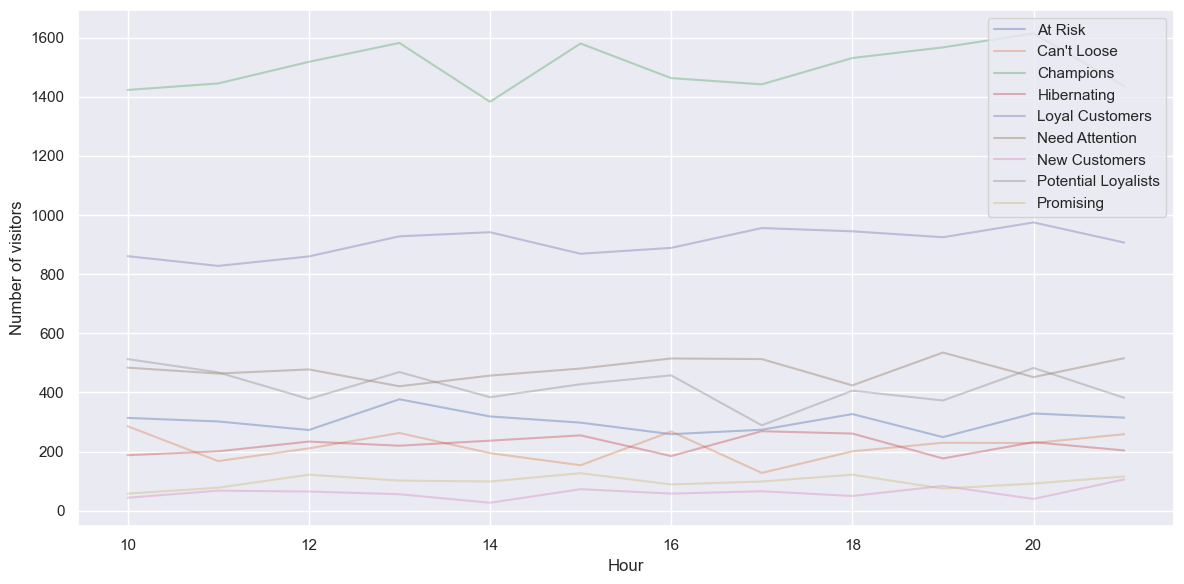

In [159]:
plt.figure(figsize = (12,6))
for col in Segment_Hour.columns:
    plt.plot(Segment_Hour[col], alpha = 0.4, label = col)
plt.xlabel('Hour') 
plt.ylabel('Number of visitors') 
plt.legend()
plt.tight_layout()
#plt.style.use('seaborn-v0_8-whitegrid')
plt.show();

Видно, що пікові години сегменту Can't Loose - 10, 13, 16, 21 і усі крім 13, не є піковими для решти клієнтів. Тому є сенс у ці години зробити промо,в ідеалі цікаве саме для цих клієнтів.

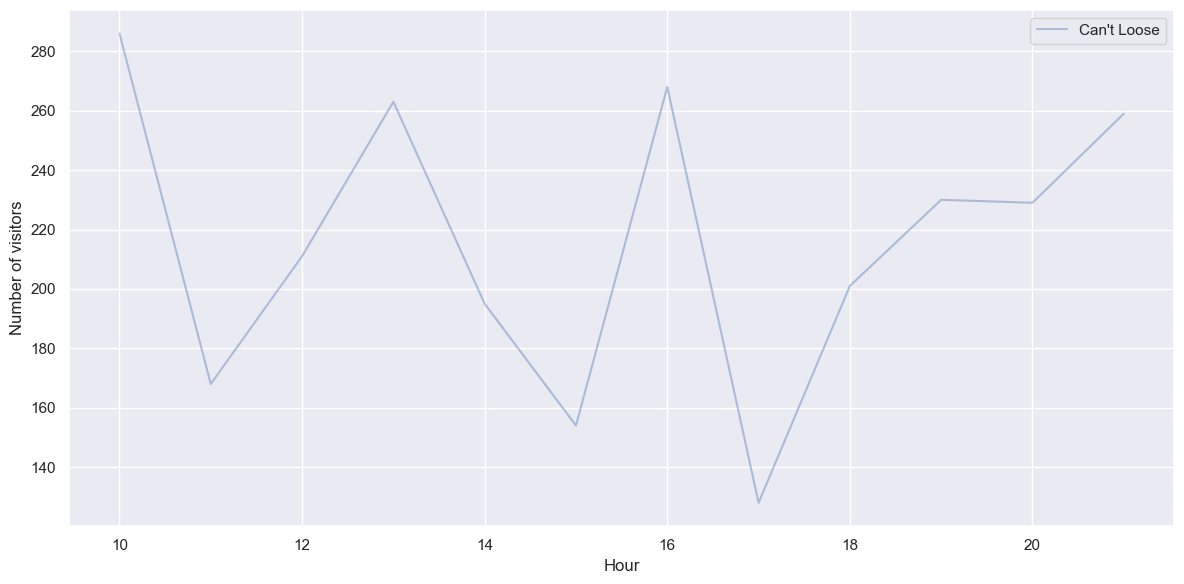

In [160]:
plt.figure(figsize = (12,6))
plt.plot(Segment_Hour['Can\'t Loose'], alpha = 0.4, label = 'Can\'t Loose')
plt.xlabel('Hour') 
plt.ylabel('Number of visitors') 
plt.legend()
plt.tight_layout()
plt.show();

Які продукти найбільше цікавлять сегмент Can/'t Loose?
Із цікавого - Frozen, Bakery and Breakfast, BBQ.
Інтерес до Bakery and Breakfast якраз співпадає з активністю о 10-11, а Інтерес до Frozen співпадає з активністю о 21-22 (пам'ятаємо, що в цьому магазині купують продукти 'на зараз', а не на тиждень).
Отже, можна зробити цікаві пропозиції на ці продукти в цей час для активності менш активних клієнтів.

In [186]:
df2[df2.Segment == 'Can\'t Loose'].groupby('Category')['Segment'].value_counts().rename('Number of purchases').reset_index().sort_values('Number of purchases', ascending=False)

Category      Segment  Number of purchases
5                      Frozen  Can't Loose                  379
0          Bakery & Breakfast  Can't Loose                  344
1                      Beauty  Can't Loose                  252
6           Fruit & Vegetable  Can't Loose                  240
13                   Pet Care  Can't Loose                  194
3       Choco, Snacks, Sweets  Can't Loose                  152
9            Kitchen & Dining  Can't Loose                  144
4       Dairy, Chilled & Eggs  Can't Loose                  140
14  Rice & Cooking Essentials  Can't Loose                  122
2                   Beverages  Can't Loose                  120
11              Mother & Baby  Can't Loose                  119
10             Meat & Seafood  Can't Loose                   94
15     Wines, Beers & Spirits  Can't Loose                   80
12             Party Supplies  Can't Loose                   79
8                   Household  Can't Loose                   78
7                      Health  Can't Loose                   55

In [187]:
df2[df2.Segment == 'Can\'t Loose'].groupby('Category')['Sub_Category'].value_counts().rename('Number of purchases').reset_index().sort_values('Number of purchases', ascending=False)

Category               Sub_Category  Number of purchases
50        Kitchen & Dining               BBQ Supplies                  144
62                Pet Care            Dog Food & Trat                  123
27                  Frozen          Frozen Vegetables                  111
6                   Beauty                  Oral Care                   99
7                   Beauty                  skin care                   92
..                     ...                        ...                  ...
48               Household           Kitchen Supplies                    2
75  Wines, Beers & Spirits  Champagne & Spakling Wine                    1
49               Household                    Laundry                    1
65                Pet Care            Litter & Toilet                    1
76  Wines, Beers & Spirits                   Red Wine                    1

[77 rows x 3 columns]

Чи BBQ Supplies сезонний продукт по містам чи є сенс зробити йому промо?
Сезонності не видно, тому в будь-який час буде доцільне промо.

In [212]:
#City_Date_g = df2[df2.Sub_Category == 'BBQ Supplies'].groupby(['Year', 'Month', 'City']).value_counts('').rename('Number of purchases').reset_index()

In [207]:
#City_Date_g['Year_month'] = City_Date_g['Year'] + "_" + City_Date_g['Month']

In [213]:
#City_Date_g

Year Month          City  Number of purchases
0    2016     1         Bedok                   26
1    2016     1       Jakarta                    5
2    2016     1  Kuala Lumpur                    3
3    2016     1        Manila                   15
4    2016     1     Woodlands                    3
..    ...   ...           ...                  ...
233  2019     9         Bedok                   24
234  2019     9       Jakarta                   14
235  2019     9  Kuala Lumpur                   10
236  2019     9        Manila                   16
237  2019     9     Woodlands                    5

[238 rows x 4 columns]

In [214]:
City_Date = City_Date_g.pivot_table(index = 'Month', columns = 'City', values = 'Number of purchases', aggfunc ='sum')
City_Date.columns.to_list()

Index(['Bedok', 'Jakarta', 'Kuala Lumpur', 'Manila', 'Woodlands'], dtype='object', name='City')

In [216]:
#cities = City_Date.columns.to_list()

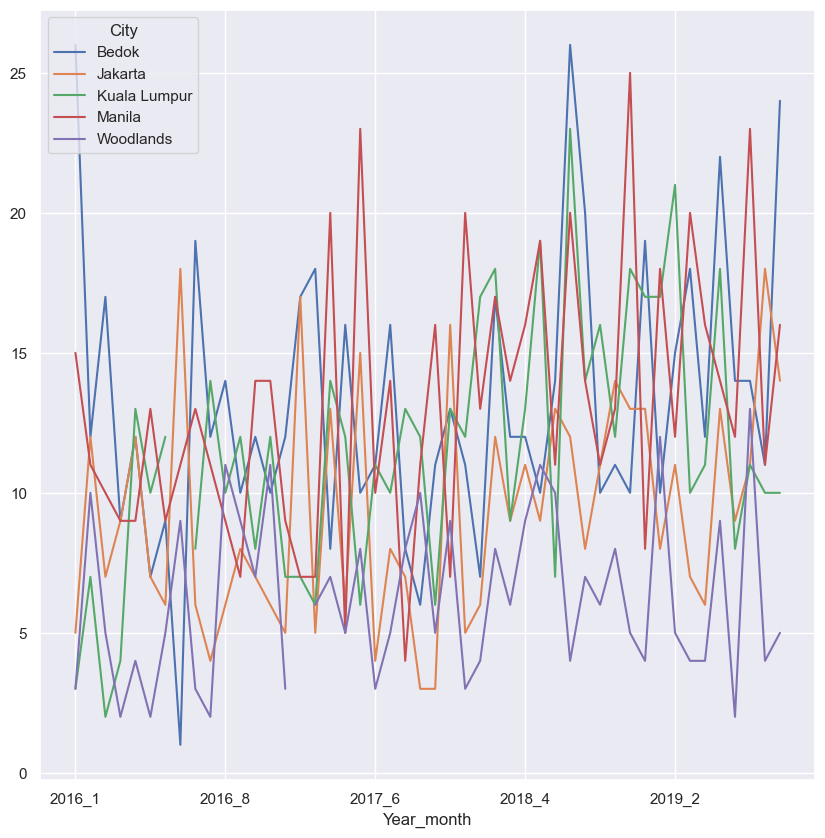

In [211]:
City_Date.plot(figsize=(10,10)); #not understandable

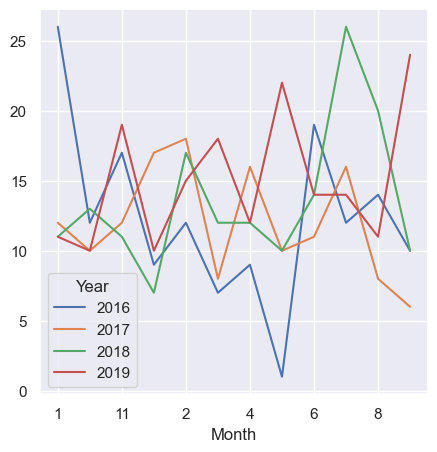

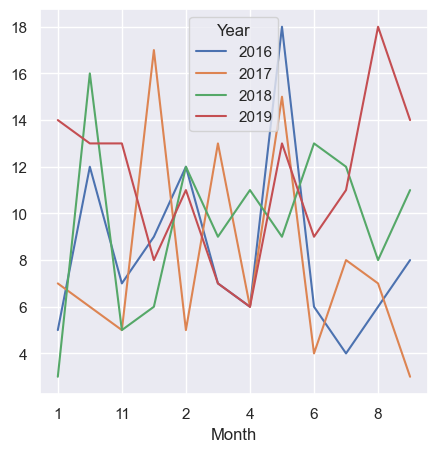

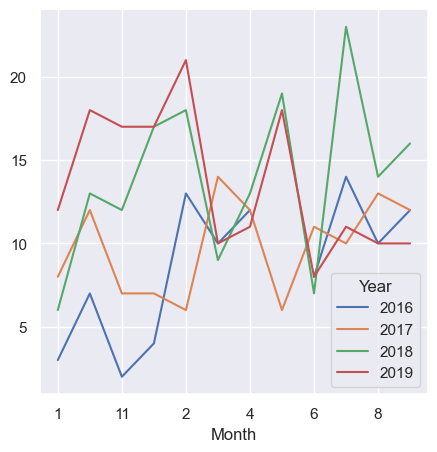

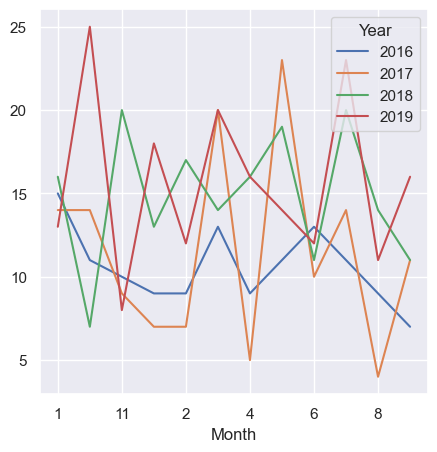

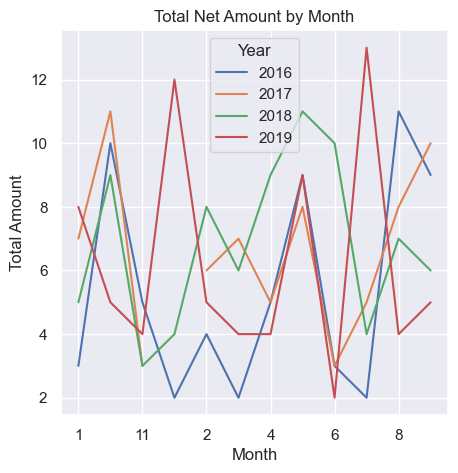

In [222]:
for city in ['Bedok', 'Jakarta', 'Kuala Lumpur', 'Manila', 'Woodlands']:
    pivot_year = df2[(df2.Sub_Category == 'BBQ Supplies') & (df2.City == city)].pivot_table(index=['Month'], columns=['Year'], values="Amount", aggfunc="count")
    pivot_year.plot(figsize=(5, 5))


# Adding labels and title
plt.ylabel('Total Amount')
plt.title('Total Net Amount by Month');

plt.show();

На цьому поки завершую дослідження даних по сегментах.
Зауваження, як можна було би поглибити зроблений аналіз за умов реального бізнесу, де був би відомий контекст даних і були пріорітетні бізнес задачі та час на їх вирішення.
1) Виміряти Frequency не кількістю покупок, а середньою кількістю днів між ними.
2) Виміряти Monetary середнім чеком покупця.
3) Описати сегменти і покіпців, коли востаннє були, скільки покупок роблять, на які суми.
4) Для аналізу пікових годин використати ще розбиття на міста і роки, щоб зрозуміти чи висновки актуальні на зараз і в кожному місті.
(п.с. Пишу це для перевіряючого аби отримати відгук чи я правильно думаю)

Далі ще хотіла дослідити прогрес по рокам, але робота і так вийшла об'ємна.

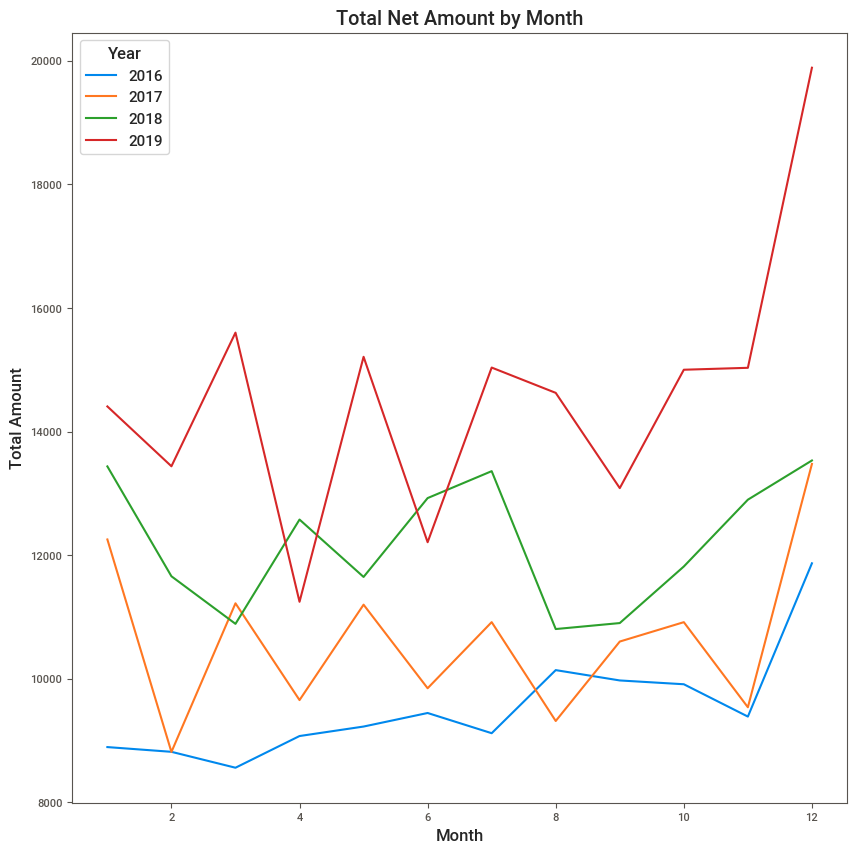

In [121]:
pivot_year = df.pivot_table(index =['Month'] , columns = ['Year'], values = "Amount", aggfunc = "sum")
pivot_year.plot(figsize=(10,10))

# Adding labels and title
plt.ylabel('Total Amount')
plt.title('Total Net Amount by Month');

Загалом для аналізу цих даних розглядала такі напрямки із залученням таких метрик.
Буду вдячна за відгук чи в тих напрямках я думаю.

**1. Загальна ефективність компанії**
- Оцінка діяльності компанії та чи є покращення(збільшення прибутку і покупців).

Store Metrics:

% Profit Margin
% Operating Cost
% Product Cost
Profit Margin
Operating Cost
Product Cost

**2. Аналіз динаміки**
- Розгляд змін у кількості покупців по рокам.
- Визначення зростання прибутку в грошовому вигляді, у відсотках, середніх.
- Сезонність по місяцям, дням тижня і годинам. По клькості покупок і по підкатегоріям товарів.

Store Metrics:
% Profit Margin
Profit Margin

Transaction Details:
Net Bill Amount
GST (Tax)
Gross Bill Amount

**3. Категорії та підкатегорії товарів**
- Вивчення змін прибутку та доходу у різних категоріях та підкатегоріях по містам і по рокам.
- Визначення найбільш та найменш популярних та прибуткових категорій по містам і по рокам.

Store Details:
City
Country

Product Information:
Category
Sub_Category
Items
Brand
Description
Price
QTY

Store Metrics:
% Profit Margin
Profit Margin

**4. Прибуткові вибори**
- Виявлення найкращих та найгірших виборів (за прибутком) серед банківських систем, способів оплати, міст, вікових груп.

Store Metrics:
% Profit Margin
Profit Margin

**5. Можливості та зв'язки**

Визначення зв'язків серед різних комбінацій змінних для подальшого аналізу. Наприклад,
- Які клієнти коли скільки витрачають. Покупці якого віку і статі приходять о котрій годині
- Портрет регулярного клієнта (сегментація)
- Розподіл нових і регулярних клієнтів по днямб місяцям, рокам. По кількості і по прибутку.
